# Predicting bankruptcy of companies

1. What are some important financial ratio determinants in predicting bankruptcy of companies in 1999 to 2009?
2. Are there any non-bankrupt companies heading for bankruptcy? 

Assumptions:
- Data is normalised and relvance of timestamp is ignored 
-  Datapoints of 6819 is sufficient to reflect the entirety of companies in Taiwan.
- A stand-alone snapshot of financial ratio at given point of bankruptcy reflects its path to bankruptcy
- Other factors like political and social factors were ignored. 

Determining the likelihood of a company going bankrupt, or unable to meet its debt obligation, is important to banks, investors and the government. Banks can determine the risk of lending money to companies. Similarly, an investment in stock on a business that is going bankrupt can be detrimental as the stock value will plummet to zero. On the other hand, the government can either intervene and or help companies that are going bankrupt. (Investopedia 2023) 

There are five aspects to bankruptcy financial variables: profitability, leverage, liquidity, activity and cash flow. The most popular ratios are the ROA (net income/total asset), Debt Ratio (total debt or total liabilities/total assets), Current Ratio (current assets/current liabilities), Total Asset Turnover (sales/total assets) and Cash Flow on Total liabilities (cash flow/total liabilities). These five ratios will be included in this study, but the importance of other ratios are explored. (Investopedia 2023)(Shetty, Mus and Bredart 2022) (Garcia 2022) (Emerling 2014)

Many studies have used simple models like the Logistic Regression Model to predict and as such, it will serve as a baseline model. I will be adopting newer techniques like Random Forest, Gradient boost and SVM to better predict the bankruptcy of companies. 

Dataset:
- source from Taiwan Economic Journal from 1999-2009 (over 10 years, timestamp? is it normalised over 10 yrs)
- company bankruptcy defined based on business regulations of Taiwan Stock Exchange (regulations: http://restructuring.bakermckenzie.com/wp-content/uploads/sites/23/2017/01/Global-Restructuring-Insolvency-Guide-New-Logo-Taiwan.pdf)
- The dataset consist of financial ratios of companies and is normalised in the range of 0 to 1.
- two criteria used in collecting the data samples
    - at least three years of complete public information before the occurrence of the financial crisis (IPO-ed for 3 years)
    - sufficient number of comparable companies of similar size in the same industry for comparison of the bankrupt and non-bankrupt cases.
- manufacturing industry composed of industrial and electronics companies (346), service industry composed of shipping, tourism, and retail companies(39), and others(93), but not financial companies. A total of 478 bankrupt companies. 
- no timestamp of data collected, hence, only using ratios for bankruptcy modelling and ignoring monetary values

There is no definite way of predicting the potential of a company going bankrupt. Hence, by examining financial ratios of previously classified companies, I attempt to predict whether companies will go bankrupt with models of Random Forest, Decision Trees, Support Vector Classifier, Extreme Gradient Boost.

Dataset is sourced from Kaggle 2023: https://www.kaggle.com/code/gcmadhan/bankruptcy-perdiction-96-accuracy/notebook

Article on credit risk modelling in python:
https://www.moodysanalytics.com/risk-perspectives-magazine/managing-disruption/spotlight/machine-learning-challenges-lessons-and-opportunities-in-credit-risk-modeling

Reseach articles: svm, XGBoost, random forest. US firms
https://www.aimspress.com/article/doi/10.3934/DSFE.2021010?viewType=HTML#:~:text=Bankruptcy%20prediction%20is%20an%20important,with%20financial%20ratios%20as%20predictors.

Bankruptcy prediction model: svm, rf, xgb, NN with 6 hidden layers
https://www.econstor.eu/bitstream/10419/258759/1/jrfm-15-00035.pdf

Emerling 2014, 'Key financial ratios to assess the risk of bankruptcy based on selected publicly traded companies', SGEM 2014 Scientific SubConference on Political Sciences, Law, Finance, Economics and Tourism, doi: 10.5593/sgemsocial2014/B22/S6.049

https://www.researchgate.net/publication/301441422_KEY_FINANCIAL_RATIOS_TO_ASSESS_THE_RISK_OF_BANKRUPTCY_BASED_ON_SELECTED_PUBLICLY_TRADED_COMPANIES

(Garcia 2022) https://www.sciencedirect.com/science/article/pii/S2666827022000494#b6

(Shetty, Mus and Bredart 2022) https://www.mdpi.com/1911-8074/15/1/35

The workflow of this project can be observed in the flowchart below and is an iterrative process.

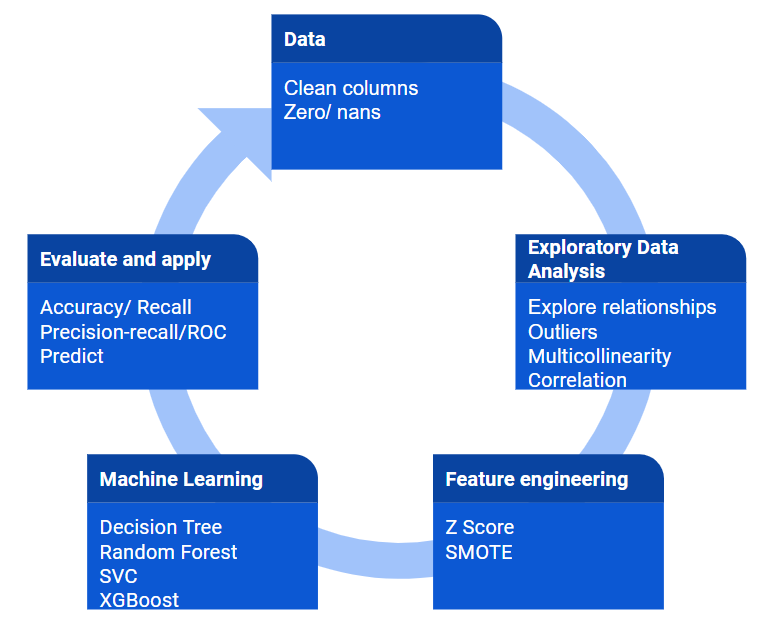

In [568]:
display.Image(r"C:\Users\katel\OneDrive\Desktop\Data Science IOD Course\flow.png")

## 1. Importing data 

In [569]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import imblearn

from IPython import display
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.metrics import specificity_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split, RepeatedKFold


#from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
#from sklearn.metrics import mean_absolute_percentage_error, median_absolute_error
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import recall_score, average_precision_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import confusion_matrix,classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier



import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
data = pd.read_csv('../projects/bankruptcydata.csv')

In [3]:
data.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   
2  ...                     0.774670                    0.040003   
3  ...                     0.739555                    0.003252   
4  ...                     0.795016                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                        

In [4]:
data.tail()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       After-tax net Interest Rate  \
6814                      0.809331   
6815                      0.809327   
6816                      0.809317   
6817                      0.809399   
6818                      0.813800   

       Non-industry income and expenditure/revenue  ...  \
6814                                      0.303510  ...   
6815                                      0.303520  ...   
6816                                      0.303512  ...   
6817                                      0.303498  ...   
6818                                      0.313415  ...   

       Net Income to Total Assets   Total assets to GNP price  \
6814                     0.799927                    0.000466   
6815                     0.799748                    0.001959   
6816                     0.797778                    0.002840   
6817                     0.811808                    0.002837   
6818                     0.815956                    0.000707   

       No-credit Interval   Gross Profit to Sales  \
6814             0.623620                0.604455   
6815             0.623931                0.598306   
6816             0.624156                0.610441   
6817             0.623957                0.607846   
6818             0.626680                0.627408   

       Net Income to Stockholder's Equity   Liability to Equity  \
6814                             0.840359              0.279606   
6815                             0.840306              0.278132   
6816                             0.840138              0.275789   
6817                             0.841084              0.277547   
6818                             0.841019              0.275114   

       Degree of Financial Leverage (DFL)  \
6814                             0.027064   
6815                             0.027009   
6816                             0.026791   
6817                             0.026822   
6818                             0.026793   

       Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
6814                                           0.566193                   1   
6815                 

## 2. EDA 

### 2a. Clean

Identify popular ratios in data columns (do not drop these)
-  ROA (net income/total asset): 'ROA(B)_before_interest_and_depreciation_after_tax'
- Solvency Ratio: (total debt or total liabilities/total assets): 'Debt_ratio_%'
- Current Ratio (current assets/current liabilities): 'Current_Ratio' dropped and current_liabilities_to_current assets
- Earning before income and taxes to total liabilities: 'Interest_Coverage_Ratio_(Interest_expense_to_EBIT)'
- Total Asset Turnover (sales/total assets): 'Total_Asset_Turnover' (sales to average assets)
- Cash Flow on Total liabilities: 'Cash_Flow_to_Liability','

In [5]:
data.shape

(6819, 96)

In [6]:
# no obvious duplicated columns in data 
data.duplicated().sum()

0

In [7]:
# check if any columns have any null value with sum().sum()
data.isnull().sum().sum()

0

In [8]:
# remove initial spaces in all column names 
data.columns = data.columns.str.strip()

In [9]:
def clean_column_name(column_names):
    clean_column_names = []
    for c in column_names:
        c = c.replace(' ', '_')
        c = c.replace('¥', '')
        c = c.replace('?', '')
        clean_column_names.append(c)
        
    return clean_column_names

data.columns = clean_column_name(data.columns)

In [10]:
# remove apostrophe that is present in column 
data.columns = data.columns.str.replace(r"[\"\',]", '')

In [11]:
# check all 96 columns 
data.columns
# bankrupt - 1(bankrupt), 0(not bankrupt)
# ROA - return on assets 
# EPS - earnings per share 
# CFO - Chief financial officer 
# GNP - gross national pdt 
# EBIT - earnings before interest and taxes 

Index(['Bankrupt', 'ROA(C)_before_interest_and_depreciation_before_interest',
       'ROA(A)_before_interest_and_%_after_tax',
       'ROA(B)_before_interest_and_depreciation_after_tax',
       'Operating_Gross_Margin', 'Realized_Sales_Gross_Margin',
       'Operating_Profit_Rate', 'Pre-tax_net_Interest_Rate',
       'After-tax_net_Interest_Rate',
       'Non-industry_income_and_expenditure/revenue',
       'Continuous_interest_rate_(after_tax)', 'Operating_Expense_Rate',
       'Research_and_development_expense_rate', 'Cash_flow_rate',
       'Interest-bearing_debt_interest_rate', 'Tax_rate_(A)',
       'Net_Value_Per_Share_(B)', 'Net_Value_Per_Share_(A)',
       'Net_Value_Per_Share_(C)', 'Persistent_EPS_in_the_Last_Four_Seasons',
       'Cash_Flow_Per_Share', 'Revenue_Per_Share_(Yuan_)',
       'Operating_Profit_Per_Share_(Yuan_)',
       'Per_Share_Net_profit_before_tax_(Yuan_)',
       'Realized_Sales_Gross_Profit_Growth_Rate',
       'Operating_Profit_Growth_Rate', 'After-tax_Net

In [12]:
for column in data.columns:
    description = data[column].describe()
    print(column, description)

Bankrupt count    6819.000000
mean        0.032263
std         0.176710
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Bankrupt, dtype: float64
ROA(C)_before_interest_and_depreciation_before_interest count    6819.000000
mean        0.505180
std         0.060686
min         0.000000
25%         0.476527
50%         0.502706
75%         0.535563
max         1.000000
Name: ROA(C)_before_interest_and_depreciation_before_interest, dtype: float64
ROA(A)_before_interest_and_%_after_tax count    6819.000000
mean        0.558625
std         0.065620
min         0.000000
25%         0.535543
50%         0.559802
75%         0.589157
max         1.000000
Name: ROA(A)_before_interest_and_%_after_tax, dtype: float64
ROA(B)_before_interest_and_depreciation_after_tax count    6819.000000
mean        0.553589
std         0.061595
min         0.000000
25%         0.527277
50%         0.552278
75%         0.584105
max         1.000000
Name

In [13]:
# any similar columns in terms of ratio values; drop columns 
data.drop(['ROA(A)_before_interest_and_%_after_tax', 
          'ROA(C)_before_interest_and_depreciation_before_interest', 
         'Operating_Gross_Margin', 
         'Pre-tax_net_Interest_Rate',
          'Net_Value_Per_Share_(C)',
          'Net_Value_Per_Share_(A)', 
          'Regular_Net_Profit_Growth_Rate', 
          'Total_debt/Total_net_worth'], axis=1, inplace=True)

In [14]:
# drop columns that are not ratios (values less than 1) and flags(?)
data.drop(['Research_and_development_expense_rate', 
          'Operating_Expense_Rate', 
           'Interest-bearing_debt_interest_rate', 'Revenue_Per_Share_(Yuan_)',
           'Total_Asset_Growth_Rate','Net_Value_Growth_Rate',
           'Current_Ratio', 'Quick_Ratio',
           'Accounts_Receivable_Turnover', 'Average_Collection_Days',
           'Inventory_Turnover_Rate_(times)', 'Fixed_Assets_Turnover_Frequency',           
           'Revenue_per_person', 'Allocation_rate_per_person',
           'Quick_Assets/Current_Liability','Cash/Current_Liability',
           'Inventory/Current_Liability',
           'Long-term_Liability_to_Current_Assets', 'Current_Asset_Turnover_Rate', 
           'Quick_Asset_Turnover_Rate', 'Cash_Turnover_Rate', 'Fixed_Assets_to_Assets',
           'Total_assets_to_GNP_price', 'Net_Income_Flag',
           'Liability-Assets_Flag'
           ],
          axis=1, inplace=True)

In [15]:
data.drop(['After-tax_net_Interest_Rate',
          
          ], axis=1, inplace=True)

In [16]:
# manually check for nan values in each column
for column in data.columns:
    nancount = data[column].isna().sum()
    print(column, nancount)

Bankrupt 0
ROA(B)_before_interest_and_depreciation_after_tax 0
Realized_Sales_Gross_Margin 0
Operating_Profit_Rate 0
Non-industry_income_and_expenditure/revenue 0
Continuous_interest_rate_(after_tax) 0
Cash_flow_rate 0
Tax_rate_(A) 0
Net_Value_Per_Share_(B) 0
Persistent_EPS_in_the_Last_Four_Seasons 0
Cash_Flow_Per_Share 0
Operating_Profit_Per_Share_(Yuan_) 0
Per_Share_Net_profit_before_tax_(Yuan_) 0
Realized_Sales_Gross_Profit_Growth_Rate 0
Operating_Profit_Growth_Rate 0
After-tax_Net_Profit_Growth_Rate 0
Continuous_Net_Profit_Growth_Rate 0
Total_Asset_Return_Growth_Rate_Ratio 0
Cash_Reinvestment_% 0
Interest_Expense_Ratio 0
Debt_ratio_% 0
Net_worth/Assets 0
Long-term_fund_suitability_ratio_(A) 0
Borrowing_dependency 0
Contingent_liabilities/Net_worth 0
Operating_profit/Paid-in_capital 0
Net_profit_before_tax/Paid-in_capital 0
Inventory_and_accounts_receivable/Net_value 0
Total_Asset_Turnover 0
Net_Worth_Turnover_Rate_(times) 0
Operating_profit_per_person 0
Working_Capital_to_Total_Ass

In [17]:
# updated data has 65 columns only
data

Bankrupt  ROA(B)_before_interest_and_depreciation_after_tax  \
0            1                                           0.405750   
1            1                                           0.516730   
2            1                                           0.472295   
3            1                                           0.457733   
4            1                                           0.522298   
...        ...                                                ...   
6814         0                                           0.543230   
6815         0                                           0.524172   
6816         0                                           0.520638   
6817         0                                           0.554045   
6818         0                                           0.549548   

      Realized_Sales_Gross_Margin  Operating_Profit_Rate  \
0                        0.601457               0.998969   
1                        0.610235               0.998946   
2                        0.601364               0.998857   
3                        0.583541               0.998700   
4                        0.598783               0.998973   
...                           ...                    ...   
6814                     0.604462               0.998992   
6815                     0.598308               0.998992   
6816                     0.610213               0.998984   
6817                     0.607850               0.999074   
6818                     0.627409               0.998080   

      Non-industry_income_and_expenditure/revenue  \
0                                        0.302646   
1                                        0.303556   
2                                        0.302035   
3                                        0.303350   
4                                        0.303475   
...                                           ...   
6814                                     0.303510   
6815                                     0.303520   
6816                                     0.303512   
6817                                     0.303498   
6818                                     0.313415   

      Continuous_interest_rate_(after_tax)  Cash_flow_rate  Tax_rate_(A)  \
0                                 0.780985        0.458143      0.000000   
1                                 0.781506        0.461867      0.000000   
2                                 0.780284        0.458521      0.000000   
3                                 0.781241        0.465705      0.000000   
4                                 0.781550        0.462746      0.000000   
...                                    ...             ...           ...   
6814                              0.781588        0.463734      0.113372   
6815                              0.781586        0.461978      0.371596   
6816                              0.781546        0.472189      0.490839   
6817                              0.781663        0.476123      0.181294   
6818                              0.786079        0.427721      0.000000   

      Net_Value_Per_Share_(B)  Persistent_EPS_in_the_Last_Four_Seasons  ...  \
0                    0.147950                                 0.169141  ...   
1                    0.182251                                 0.208944  ...   
2                    0.177911                                 0.180581  ...   
3                    0.154187                                 0.193722  ...   
4                    0.167502                                 0.212537  ...   
...                       ...                                      ...  ...   
6814                 0.175045                                 0.216602  ...   
6815                 0.181324                                 0.216697  ...   
6816                 0.269521                                 0.210929  ...   
6817                 0.213392                                 0.228326  ...   
6818                 0.220766        

### 2b. Feature engineering: Z score

ζ = 0.717A + 0.847B + 3.107C + 0.420D + 0.998E

- Zeta (ζ): Altman’s Z-score
- A : Working Capital/Total Assets ratio('Working_Capital_to_Total_Assets')
- B : the Retained Earnings/Total Assets ratio ('Retained_Earnings_to_Total_Assets')
- C : the Earnings Before Interest and Tax/Total Assets ratio (''Operating_profit/Paid-in_capital',') or EBIT/total assets
- D : the Market Value of Equity/Total Liabilities ratio ('Equity_to_Liability')
- E : the Total Sales/Total Assets ratio ('Total_Asset_Turnover',)

The interpretation of the Z Altman is:
Z2 Altman > 2.9 − Safe zone
1.23 < Z2 Altman < 2.9 − Grey zone
Z2 Altman < 1.23 − Distress zone

Barbuta-Misu and Madaleno 2020
https://www.mdpi.com/1911-8074/13/3/58

In [18]:
# new column called Z-altman scoring for bankruptcy prediction
def get_zscore(row):
    zscore = (float(row['Working_Capital_to_Total_Assets']*0.717) +
            float(row['Retained_Earnings_to_Total_Assets']*0.847) +
            float(row['Operating_profit/Paid-in_capital']*3.107) + 
            float(row['Equity_to_Liability']*0.420) +
            float(row['Total_Asset_Turnover']* 0.998))
    
    return zscore

In [19]:
data['zscore'] = data.apply(get_zscore, axis=1)

In [20]:
data['zscore'].value_counts

<bound method IndexOpsMixin.value_counts of 0       1.639025
1       1.691492
2       1.674156
3       1.629858
4       1.804208
          ...   
6814    1.791303
6815    1.784379
6816    1.868625
6817    1.867470
6818    1.809496
Name: zscore, Length: 6819, dtype: float64>

In [21]:
print('Mean Z-score bankrupt:', data[data.Bankrupt == 1]['zscore'].mean())
print('Max Z-score bankrupt:', data[data.Bankrupt == 1]['zscore'].max())
print('Min Z-score bankrupt:', data[data.Bankrupt == 1]['zscore'].min())
print('Mean Z-score non-bankrupt:',data[data.Bankrupt == 0]['zscore'].mean())
print('Max Z-score non-bankrupt:', data[data.Bankrupt == 0]['zscore'].max())
print('Min Z-score non-bankrupt:', data[data.Bankrupt == 0]['zscore'].min())

Mean Z-score bankrupt: 1.690943247616874
Max Z-score bankrupt: 2.4651125431645258
Min Z-score bankrupt: 1.2971307796255718
Mean Z-score non-bankrupt: 1.8814898184531965
Max Z-score non-bankrupt: 4.881836290538585
Min Z-score non-bankrupt: 0.8114294395895181


In [22]:
# drop columns that were used for zscore calculation; exclude Total asset turnover
data.drop(['Working_Capital_to_Total_Assets', 
               'Retained_Earnings_to_Total_Assets', 
               'Operating_profit/Paid-in_capital',
               'Equity_to_Liability',
               ], axis=1, inplace=True)

In [23]:
# More EDA and research, axis=1, inplace=True on columns that are overlapping
data.drop(['Current_Liabilities/Liability', 
          'Current_Liabilities/Equity',
          'Equity_to_Long-term_Liability',
          'Gross_Profit_to_Sales',
          'Operating_Profit_Growth_Rate', 
          'Realized_Sales_Gross_Profit_Growth_Rate',
          'Per_Share_Net_profit_before_tax_(Yuan_)',
          'Operating_Profit_Per_Share_(Yuan_)',
          'After-tax_Net_Profit_Growth_Rate'
          
          ], axis=1, inplace=True)

In [24]:
data[data.Bankrupt == 0]

Bankrupt  ROA(B)_before_interest_and_depreciation_after_tax  \
6            0                                           0.436158   
7            0                                           0.559077   
8            0                                           0.543284   
9            0                                           0.542963   
10           0                                           0.538198   
...        ...                                                ...   
6814         0                                           0.543230   
6815         0                                           0.524172   
6816         0                                           0.520638   
6817         0                                           0.554045   
6818         0                                           0.549548   

      Realized_Sales_Gross_Margin  Operating_Profit_Rate  \
6                        0.619950               0.998993   
7                        0.601717               0.999009   
8                        0.603612               0.998961   
9                        0.599209               0.999001   
10                       0.614026               0.998978   
...                           ...                    ...   
6814                     0.604462               0.998992   
6815                     0.598308               0.998992   
6816                     0.610213               0.998984   
6817                     0.607850               0.999074   
6818                     0.627409               0.998080   

      Non-industry_income_and_expenditure/revenue  \
6                                        0.302814   
7                                        0.303545   
8                                        0.303584   
9                                        0.303483   
10                                       0.303759   
...                                           ...   
6814                                     0.303510   
6815                                     0.303520   
6816                                     0.303512   
6817                                     0.303498   
6818                                     0.313415   

      Continuous_interest_rate_(after_tax)  Cash_flow_rate  Tax_rate_(A)  \
6                                 0.781180        0.461020      0.000000   
7                                 0.781621        0.467024      0.157607   
8                                 0.781598        0.463142      0.005871   
9                                 0.781574        0.470575      0.392449   
10                                0.781629        0.464818      0.000000   
...                                    ...             ...           ...   
6814                              0.781588        0.463734      0.113372   
6815                              0.781586        0.461978      0.371596   
6816                              0.781546        0.472189      0.490839   
6817                              0.781663        0.476123      0.181294   
6818                              0.786079        0.427721      0.000000   

      Net_Value_Per_Share_(B)  Persistent_EPS_in_the_Last_Four_Seasons  ...  \
6                    0.158822                                 0.161482  ...   
7                    0.176984                                 0.225206  ...   
8                    0.184189                                 0.218398  ...   
9                    0.177447                                 0.217831  ...   
10                   0.182925                                 0.218966  ...   
...                       ...                                      ...  ...   
6814                 0.175045                                 0.216602  ...   
6815                 0.181324                                 0.216697  ...   
6816                 0.269521                                 0.210929  ...   
6817                 0.213392                                 0.228326  ...   
6818                 0.220766        

In [25]:
datacopy= data.copy()

In [26]:
datacopy.drop('Bankrupt', axis=1, inplace=True)

### 2c. More cleaning: check for rows with 0 in it 

In [28]:
# replace 0 with nan 
cols = datacopy.columns
datacopy[cols] = datacopy[cols].replace([0], np.nan)

In [29]:
# manually check for nan values in each column
for column in datacopy.columns:
    nancount = datacopy[column].isna().sum()
    print(column, nancount)

ROA(B)_before_interest_and_depreciation_after_tax 1
Realized_Sales_Gross_Margin 1
Operating_Profit_Rate 1
Non-industry_income_and_expenditure/revenue 1
Continuous_interest_rate_(after_tax) 1
Cash_flow_rate 1
Tax_rate_(A) 2568
Net_Value_Per_Share_(B) 1
Persistent_EPS_in_the_Last_Four_Seasons 1
Cash_Flow_Per_Share 1
Continuous_Net_Profit_Growth_Rate 1
Total_Asset_Return_Growth_Rate_Ratio 1
Cash_Reinvestment_% 1
Interest_Expense_Ratio 1
Debt_ratio_% 1
Net_worth/Assets 1
Long-term_fund_suitability_ratio_(A) 1
Borrowing_dependency 1
Contingent_liabilities/Net_worth 1
Net_profit_before_tax/Paid-in_capital 1
Inventory_and_accounts_receivable/Net_value 1
Total_Asset_Turnover 8
Net_Worth_Turnover_Rate_(times) 1
Operating_profit_per_person 1
Quick_Assets/Total_Assets 1
Current_Assets/Total_Assets 1
Cash/Total_Assets 1
Current_Liability_to_Assets 1
Operating_Funds_to_Liability 1
Inventory/Working_Capital 1
Working_Capital/Equity 1
Total_income/Total_expense 1
Total_expense/Assets 1
Working_capitc

In [30]:
# Taiwan corporate tax rate is at 20%. Half of dataset has nans, drop 
datacopy.drop(['Tax_rate_(A)'], axis=1, inplace=True)

In [32]:
# combine bankrupt column back into datacopy (both have same rows of data)
datacopy = pd.concat([datacopy, data[['Bankrupt']]], axis = 1)

In [33]:
# shift column of interest to first column
first_column = datacopy.pop('Bankrupt')
datacopy.insert(0, 'Bankrupt', first_column)

In [34]:
# check first col with na
datacopy[datacopy['ROA(B)_before_interest_and_depreciation_after_tax'].isna()]

Bankrupt  ROA(B)_before_interest_and_depreciation_after_tax  \
1035         0                                                NaN   

      Realized_Sales_Gross_Margin  Operating_Profit_Rate  \
1035                     0.593551               0.998775   

      Non-industry_income_and_expenditure/revenue  \
1035                                     0.300687   

      Continuous_interest_rate_(after_tax)  Cash_flow_rate  \
1035                              0.779669        0.441099   

      Net_Value_Per_Share_(B)  Persistent_EPS_in_the_Last_Four_Seasons  \
1035                  0.12983                                 0.166966   

      Cash_Flow_Per_Share  ...  CFO_to_Assets  Cash_Flow_to_Equity  \
1035             0.310073  ...       0.205248             0.337834   

      Current_Liability_to_Current_Assets  Net_Income_to_Total_Assets  \
1035                             0.042357                    0.224792   

      No-credit_Interval  Net_Income_to_Stockholders_Equity  \
1035            0.623797                           0.770902   

      Liability_to_Equity  Degree_of_Financial_Leverage_(DFL)  \
1035             0.285511                             0.02679   

      Interest_Coverage_Ratio_(Interest_expense_to_EBIT)    zscore  
1035                                           0.565152   1.453626  

[1 rows x 49 columns]

In [35]:
# impute nan with mean of copmanies that went bankrupt 
datacopy.loc[1035, 'ROA(B)_before_interest_and_depreciation_after_tax'] = datacopy[datacopy['Bankrupt'] == 0]['ROA(B)_before_interest_and_depreciation_after_tax'].mean()

In [36]:
# check next col with na
datacopy[datacopy['Realized_Sales_Gross_Margin'].isna()]

Bankrupt  ROA(B)_before_interest_and_depreciation_after_tax  \
2490         0                                           0.457733   

      Realized_Sales_Gross_Margin  Operating_Profit_Rate  \
2490                          NaN               0.988045   

      Non-industry_income_and_expenditure/revenue  \
2490                                     0.303526   

      Continuous_interest_rate_(after_tax)  Cash_flow_rate  \
2490                              0.767874             NaN   

      Net_Value_Per_Share_(B)  Persistent_EPS_in_the_Last_Four_Seasons  \
2490                 0.199444                                 0.198733   

      Cash_Flow_Per_Share  ...  CFO_to_Assets  Cash_Flow_to_Equity  \
2490               0.3146  ...        0.54418             0.312115   

      Current_Liability_to_Current_Assets  Net_Income_to_Total_Assets  \
2490                                  NaN                    0.766285   

      No-credit_Interval  Net_Income_to_Stockholders_Equity  \
2490            0.626786                           0.838652   

      Liability_to_Equity  Degree_of_Financial_Leverage_(DFL)  \
2490             0.274813                            0.026789   

      Interest_Coverage_Ratio_(Interest_expense_to_EBIT)    zscore  
2490                                           0.565148   1.944775  

[1 rows x 49 columns]

In [37]:
# impute nan with mean of copmanies that went bankrupt/ did not go bankrupt 
datacopy.loc[2490, 'Realized_Sales_Gross_Margin'] = datacopy[datacopy['Bankrupt'] == 0]['Realized_Sales_Gross_Margin'].mean()
datacopy.loc[2490, 'Current_Liability_to_Current_Assets'] = datacopy[datacopy['Bankrupt'] == 0]['Current_Liability_to_Current_Assets'].mean()

In [38]:
datacopy.loc[2605, 'Non-industry_income_and_expenditure/revenue'] = datacopy[datacopy['Bankrupt'] == 0]['Non-industry_income_and_expenditure/revenue'].mean()

In [39]:
# check col with na
datacopy[datacopy['Net_Value_Per_Share_(B)'].isna()]

Bankrupt  ROA(B)_before_interest_and_depreciation_after_tax  \
6613         0                                           0.303014   

      Realized_Sales_Gross_Margin  Operating_Profit_Rate  \
6613                      0.63752               0.998785   

      Non-industry_income_and_expenditure/revenue  \
6613                                     0.303325   

      Continuous_interest_rate_(after_tax)  Cash_flow_rate  \
6613                              0.781234        0.461433   

      Net_Value_Per_Share_(B)  Persistent_EPS_in_the_Last_Four_Seasons  \
6613                      NaN                                 0.180297   

      Cash_Flow_Per_Share  ...  CFO_to_Assets  Cash_Flow_to_Equity  \
6613             0.317995  ...       0.569253             0.312856   

      Current_Liability_to_Current_Assets  Net_Income_to_Total_Assets  \
6613                             0.305792                    0.705559   

      No-credit_Interval  Net_Income_to_Stockholders_Equity  \
6613            0.623292                           0.841826   

      Liability_to_Equity  Degree_of_Financial_Leverage_(DFL)  \
6613              0.26522                            0.026791   

      Interest_Coverage_Ratio_(Interest_expense_to_EBIT)   zscore  
6613                                           0.565158   1.02717  

[1 rows x 49 columns]

In [40]:
datacopy.loc[6613, 'Net_Value_Per_Share_(B)'] = datacopy[datacopy['Bankrupt'] == 0]['Net_Value_Per_Share_(B)'].mean()

In [41]:
# check col with na
datacopy[datacopy['Persistent_EPS_in_the_Last_Four_Seasons'].isna()]

Bankrupt  ROA(B)_before_interest_and_depreciation_after_tax  \
1870         1                                           0.307351   

      Realized_Sales_Gross_Margin  Operating_Profit_Rate  \
1870                      0.59665               0.998976   

      Non-industry_income_and_expenditure/revenue  \
1870                                     0.303138   

      Continuous_interest_rate_(after_tax)  Cash_flow_rate  \
1870                               0.78136        0.452861   

      Net_Value_Per_Share_(B)  Persistent_EPS_in_the_Last_Four_Seasons  \
1870                 0.102398                                      NaN   

      Cash_Flow_Per_Share  ...  CFO_to_Assets  Cash_Flow_to_Equity  \
1870              0.20846  ...       0.299383             0.322466   

      Current_Liability_to_Current_Assets  Net_Income_to_Total_Assets  \
1870                             0.055966                    0.664814   

      No-credit_Interval  Net_Income_to_Stockholders_Equity  \
1870             0.62327                           0.902744   

      Liability_to_Equity  Degree_of_Financial_Leverage_(DFL)  \
1870             0.199162                            0.026755   

      Interest_Coverage_Ratio_(Interest_expense_to_EBIT)    zscore  
1870                                           0.564978   2.021118  

[1 rows x 49 columns]

In [42]:
datacopy.loc[1870, 'Persistent_EPS_in_the_Last_Four_Seasons'] = datacopy[datacopy['Bankrupt'] == 1]['Persistent_EPS_in_the_Last_Four_Seasons'].mean()

In [43]:
# check col with na
datacopy[datacopy['Cash_Reinvestment_%'].isna()]

Bankrupt  ROA(B)_before_interest_and_depreciation_after_tax  \
3695         0                                           0.245142   

      Realized_Sales_Gross_Margin  Operating_Profit_Rate  \
3695                     0.599201                0.99618   

      Non-industry_income_and_expenditure/revenue  \
3695                                     0.303351   

      Continuous_interest_rate_(after_tax)  Cash_flow_rate  \
3695                              0.778083        0.455451   

      Net_Value_Per_Share_(B)  Persistent_EPS_in_the_Last_Four_Seasons  \
3695                 0.127723                                 0.138697   

      Cash_Flow_Per_Share  ...  CFO_to_Assets  Cash_Flow_to_Equity  \
3695             0.270956  ...       0.401985                  1.0   

      Current_Liability_to_Current_Assets  Net_Income_to_Total_Assets  \
3695                             0.070746                    0.619553   

      No-credit_Interval  Net_Income_to_Stockholders_Equity  \
3695            0.623628                           0.634587   

      Liability_to_Equity  Degree_of_Financial_Leverage_(DFL)  \
3695             0.435907                            0.026752   

      Interest_Coverage_Ratio_(Interest_expense_to_EBIT)    zscore  
3695                                           0.564962   1.389474  

[1 rows x 49 columns]

In [44]:
datacopy.loc[3695, 'Cash_Reinvestment_%'] = datacopy[datacopy['Bankrupt'] == 0]['Cash_Reinvestment_%'].mean()

In [45]:
# check col with na
datacopy[datacopy['Debt_ratio_%'].isna()]

Bankrupt  ROA(B)_before_interest_and_depreciation_after_tax  \
2393         0                                           0.503935   

      Realized_Sales_Gross_Margin  Operating_Profit_Rate  \
2393                     0.634414               0.986163   

      Non-industry_income_and_expenditure/revenue  \
2393                                     0.297521   

      Continuous_interest_rate_(after_tax)  Cash_flow_rate  \
2393                              0.755716        0.743251   

      Net_Value_Per_Share_(B)  Persistent_EPS_in_the_Last_Four_Seasons  \
2393                 0.171801                                 0.211024   

      Cash_Flow_Per_Share  ...  CFO_to_Assets  Cash_Flow_to_Equity  \
2393             0.321674  ...        0.61547             0.320135   

      Current_Liability_to_Current_Assets  Net_Income_to_Total_Assets  \
2393                             0.000122                    0.787824   

      No-credit_Interval  Net_Income_to_Stockholders_Equity  \
2393            0.662277                           0.839662   

      Liability_to_Equity  Degree_of_Financial_Leverage_(DFL)  \
2393             0.274779                            0.026789   

      Interest_Coverage_Ratio_(Interest_expense_to_EBIT)    zscore  
2393                                           0.565148   2.175734  

[1 rows x 49 columns]

In [46]:
datacopy.loc[2393, 'Debt_ratio_%'] = datacopy[datacopy['Bankrupt'] == 0]['Debt_ratio_%'].mean()

In [47]:
datacopy.loc[6613, 'Net_Worth_Turnover_Rate_(times)'] = datacopy[datacopy['Bankrupt'] == 0]['Net_Worth_Turnover_Rate_(times)'].mean()

In [48]:
# check col with na
datacopy[datacopy['Contingent_liabilities/Net_worth'].isna()]

Bankrupt  ROA(B)_before_interest_and_depreciation_after_tax  \
6640         1                                           0.221425   

      Realized_Sales_Gross_Margin  Operating_Profit_Rate  \
6640                     0.598056               0.998933   

      Non-industry_income_and_expenditure/revenue  \
6640                                     0.301423   

      Continuous_interest_rate_(after_tax)  Cash_flow_rate  \
6640                              0.780388        0.472751   

      Net_Value_Per_Share_(B)  Persistent_EPS_in_the_Last_Four_Seasons  \
6640                 0.069656                                 0.079512   

      Cash_Flow_Per_Share  ...  CFO_to_Assets  Cash_Flow_to_Equity  \
6640             0.340348  ...        0.73886             0.314685   

      Current_Liability_to_Current_Assets  Net_Income_to_Total_Assets  \
6640                             0.059374                    0.519388   

      No-credit_Interval  Net_Income_to_Stockholders_Equity  \
6640            0.623465                           0.856906   

      Liability_to_Equity  Degree_of_Financial_Leverage_(DFL)  \
6640              0.25928                            0.026769   

      Interest_Coverage_Ratio_(Interest_expense_to_EBIT)    zscore  
6640                                           0.565052   1.564951  

[1 rows x 49 columns]

In [49]:
datacopy.loc[6640, 'Contingent_liabilities/Net_worth'] = datacopy[datacopy['Bankrupt'] == 1]['Contingent_liabilities/Net_worth'].mean()

In [50]:
# check col with na
datacopy[datacopy['Operating_profit_per_person'].isna()]

Bankrupt  ROA(B)_before_interest_and_depreciation_after_tax  \
2209         0                                           0.486322   

      Realized_Sales_Gross_Margin  Operating_Profit_Rate  \
2209                     0.568738               0.998356   

      Non-industry_income_and_expenditure/revenue  \
2209                                     0.303319   

      Continuous_interest_rate_(after_tax)  Cash_flow_rate  \
2209                              0.780711        0.463174   

      Net_Value_Per_Share_(B)  Persistent_EPS_in_the_Last_Four_Seasons  \
2209                 0.166828                                 0.204311   

      Cash_Flow_Per_Share  ...  CFO_to_Assets  Cash_Flow_to_Equity  \
2209             0.320117  ...       0.585424             0.316496   

      Current_Liability_to_Current_Assets  Net_Income_to_Total_Assets  \
2209                             0.039379                    0.775512   

      No-credit_Interval  Net_Income_to_Stockholders_Equity  \
2209            0.620711                           0.838443   

      Liability_to_Equity  Degree_of_Financial_Leverage_(DFL)  \
2209             0.279334                            0.026564   

      Interest_Coverage_Ratio_(Interest_expense_to_EBIT)    zscore  
2209                                           0.563775   1.636378  

[1 rows x 49 columns]

In [51]:
datacopy.loc[2209, 'Operating_profit_per_person'] = datacopy[datacopy['Bankrupt'] == 0]['Operating_profit_per_person'].mean()

In [52]:
# check col with na
datacopy[datacopy['Current_Assets/Total_Assets'].isna()]

Bankrupt  ROA(B)_before_interest_and_depreciation_after_tax  \
2499         0                                           0.619573   

      Realized_Sales_Gross_Margin  Operating_Profit_Rate  \
2499                     0.642824                0.99965   

      Non-industry_income_and_expenditure/revenue  \
2499                                     0.307626   

      Continuous_interest_rate_(after_tax)  Cash_flow_rate  \
2499                              0.784404        0.470606   

      Net_Value_Per_Share_(B)  Persistent_EPS_in_the_Last_Four_Seasons  \
2499                 0.219502                                 0.259809   

      Cash_Flow_Per_Share  ...  CFO_to_Assets  Cash_Flow_to_Equity  \
2499             0.324326  ...       0.599193             0.312472   

      Current_Liability_to_Current_Assets  Net_Income_to_Total_Assets  \
2499                             0.916814                    0.857531   

      No-credit_Interval  Net_Income_to_Stockholders_Equity  \
2499            0.632213                           0.843386   

      Liability_to_Equity  Degree_of_Financial_Leverage_(DFL)  \
2499             0.275898                            0.026799   

      Interest_Coverage_Ratio_(Interest_expense_to_EBIT)   zscore  
2499                                           0.565194   1.71541  

[1 rows x 49 columns]

In [53]:
datacopy.loc[2499, 'Current_Assets/Total_Assets'] = datacopy[datacopy['Bankrupt'] == 0]['Current_Assets/Total_Assets'].mean()

In [54]:
# check col with na
datacopy[datacopy['Current_Liability_to_Assets'].isna()]

Bankrupt  ROA(B)_before_interest_and_depreciation_after_tax  \
2490         0                                           0.457733   

      Realized_Sales_Gross_Margin  Operating_Profit_Rate  \
2490                     0.608329               0.988045   

      Non-industry_income_and_expenditure/revenue  \
2490                                     0.303526   

      Continuous_interest_rate_(after_tax)  Cash_flow_rate  \
2490                              0.767874             NaN   

      Net_Value_Per_Share_(B)  Persistent_EPS_in_the_Last_Four_Seasons  \
2490                 0.199444                                 0.198733   

      Cash_Flow_Per_Share  ...  CFO_to_Assets  Cash_Flow_to_Equity  \
2490               0.3146  ...        0.54418             0.312115   

      Current_Liability_to_Current_Assets  Net_Income_to_Total_Assets  \
2490                             0.030546                    0.766285   

      No-credit_Interval  Net_Income_to_Stockholders_Equity  \
2490            0.626786                           0.838652   

      Liability_to_Equity  Degree_of_Financial_Leverage_(DFL)  \
2490             0.274813                            0.026789   

      Interest_Coverage_Ratio_(Interest_expense_to_EBIT)    zscore  
2490                                           0.565148   1.944775  

[1 rows x 49 columns]

In [55]:
datacopy.loc[2490, 'Current_Liability_to_Assets'] = datacopy[datacopy['Bankrupt'] == 0]['Current_Liability_to_Assets'].mean()

In [56]:
# check col with na
datacopy[datacopy['Operating_Funds_to_Liability'].isna()]

Bankrupt  ROA(B)_before_interest_and_depreciation_after_tax  \
3223         0                                            0.35291   

      Realized_Sales_Gross_Margin  Operating_Profit_Rate  \
3223                     0.619366               0.997875   

      Non-industry_income_and_expenditure/revenue  \
3223                                     0.302952   

      Continuous_interest_rate_(after_tax)  Cash_flow_rate  \
3223                                0.7799        0.346623   

      Net_Value_Per_Share_(B)  Persistent_EPS_in_the_Last_Four_Seasons  \
3223                 0.153639                                 0.196275   

      Cash_Flow_Per_Share  ...  CFO_to_Assets  Cash_Flow_to_Equity  \
3223             0.296881  ...       0.254224             0.306593   

      Current_Liability_to_Current_Assets  Net_Income_to_Total_Assets  \
3223                             0.008021                    0.713786   

      No-credit_Interval  Net_Income_to_Stockholders_Equity  \
3223            0.623901                            0.83587   

      Liability_to_Equity  Degree_of_Financial_Leverage_(DFL)  \
3223             0.275382                            0.026774   

      Interest_Coverage_Ratio_(Interest_expense_to_EBIT)    zscore  
3223                                           0.565073   1.719423  

[1 rows x 49 columns]

In [57]:
datacopy.loc[3223, 'Operating_Funds_to_Liability'] = datacopy[datacopy['Bankrupt'] == 0]['Operating_Funds_to_Liability'].mean()

In [58]:
# check col with na
datacopy[datacopy['Total_income/Total_expense'].isna()]

Bankrupt  ROA(B)_before_interest_and_depreciation_after_tax  \
2490         0                                           0.457733   

      Realized_Sales_Gross_Margin  Operating_Profit_Rate  \
2490                     0.608329               0.988045   

      Non-industry_income_and_expenditure/revenue  \
2490                                     0.303526   

      Continuous_interest_rate_(after_tax)  Cash_flow_rate  \
2490                              0.767874             NaN   

      Net_Value_Per_Share_(B)  Persistent_EPS_in_the_Last_Four_Seasons  \
2490                 0.199444                                 0.198733   

      Cash_Flow_Per_Share  ...  CFO_to_Assets  Cash_Flow_to_Equity  \
2490               0.3146  ...        0.54418             0.312115   

      Current_Liability_to_Current_Assets  Net_Income_to_Total_Assets  \
2490                             0.030546                    0.766285   

      No-credit_Interval  Net_Income_to_Stockholders_Equity  \
2490            0.626786                           0.838652   

      Liability_to_Equity  Degree_of_Financial_Leverage_(DFL)  \
2490             0.274813                            0.026789   

      Interest_Coverage_Ratio_(Interest_expense_to_EBIT)    zscore  
2490                                           0.565148   1.944775  

[1 rows x 49 columns]

In [59]:
datacopy.loc[2490, 'Total_income/Total_expense'] = datacopy[datacopy['Bankrupt'] == 0]['Total_income/Total_expense'].mean()

In [60]:
# check col with na
datacopy[datacopy['Total_expense/Assets'].isna()]

Bankrupt  ROA(B)_before_interest_and_depreciation_after_tax  \
6391         0                                           0.577708   

      Realized_Sales_Gross_Margin  Operating_Profit_Rate  \
6391                     0.657915                    1.0   

      Non-industry_income_and_expenditure/revenue  \
6391                                     0.303537   

      Continuous_interest_rate_(after_tax)  Cash_flow_rate  \
6391                              0.782755        0.494222   

      Net_Value_Per_Share_(B)  Persistent_EPS_in_the_Last_Four_Seasons  \
6391                 0.205048                                 0.236929   

      Cash_Flow_Per_Share  ...  CFO_to_Assets  Cash_Flow_to_Equity  \
6391             0.330622  ...       0.648197              0.31403   

      Current_Liability_to_Current_Assets  Net_Income_to_Total_Assets  \
6391                             0.334265                    0.832557   

      No-credit_Interval  Net_Income_to_Stockholders_Equity  \
6391             0.64212                           0.841886   

      Liability_to_Equity  Degree_of_Financial_Leverage_(DFL)  \
6391             0.275334                            0.026791   

      Interest_Coverage_Ratio_(Interest_expense_to_EBIT)    zscore  
6391                                            0.56516   1.772934  

[1 rows x 49 columns]

In [61]:
datacopy.loc[6391, 'Total_expense/Assets'] = datacopy[datacopy['Bankrupt'] == 0]['Total_expense/Assets'].mean()

In [62]:
datacopy[datacopy['Cash_Flow_to_Total_Assets'].isna()]

Bankrupt  ROA(B)_before_interest_and_depreciation_after_tax  \
1684         0                                           0.088388   

      Realized_Sales_Gross_Margin  Operating_Profit_Rate  \
1684                     0.646846               0.997083   

      Non-industry_income_and_expenditure/revenue  \
1684                                     0.304684   

      Continuous_interest_rate_(after_tax)  Cash_flow_rate  \
1684                              0.779956        0.427991   

      Net_Value_Per_Share_(B)  Persistent_EPS_in_the_Last_Four_Seasons  \
1684                  0.12726                                 0.187199   

      Cash_Flow_Per_Share  ...  CFO_to_Assets  Cash_Flow_to_Equity  \
1684             0.312725  ...            NaN             0.165342   

      Current_Liability_to_Current_Assets  Net_Income_to_Total_Assets  \
1684                             0.072007                         NaN   

      No-credit_Interval  Net_Income_to_Stockholders_Equity  \
1684             0.62373                           0.748252   

      Liability_to_Equity  Degree_of_Financial_Leverage_(DFL)  \
1684             0.284685                            0.026791   

      Interest_Coverage_Ratio_(Interest_expense_to_EBIT)    zscore  
1684                                           0.565158   0.811429  

[1 rows x 49 columns]

In [63]:
datacopy.loc[1684, 'Cash_Flow_to_Total_Assets'] = datacopy[datacopy['Bankrupt'] == 0]['Cash_Flow_to_Total_Assets'].mean()

In [64]:
datacopy[datacopy['Cash_Flow_to_Liability'].isna()]

Bankrupt  ROA(B)_before_interest_and_depreciation_after_tax  \
3146         0                                            0.48161   

      Realized_Sales_Gross_Margin  Operating_Profit_Rate  \
3146                     0.600585               0.993133   

      Non-industry_income_and_expenditure/revenue  \
3146                                     0.304187   

      Continuous_interest_rate_(after_tax)  Cash_flow_rate  \
3146                              0.775856        0.389009   

      Net_Value_Per_Share_(B)  Persistent_EPS_in_the_Last_Four_Seasons  \
3146                 0.170326                                 0.205824   

      Cash_Flow_Per_Share  ...  CFO_to_Assets  Cash_Flow_to_Equity  \
3146             0.313716  ...       0.517533             0.300361   

      Current_Liability_to_Current_Assets  Net_Income_to_Total_Assets  \
3146                             0.002008                    0.764576   

      No-credit_Interval  Net_Income_to_Stockholders_Equity  \
3146            0.624606                           0.838558   

      Liability_to_Equity  Degree_of_Financial_Leverage_(DFL)  \
3146             0.274874                            0.026791   

      Interest_Coverage_Ratio_(Interest_expense_to_EBIT)    zscore  
3146                                           0.565158   1.853767  

[1 rows x 49 columns]

In [65]:
datacopy.loc[3146, 'Cash_Flow_to_Liability'] = datacopy[datacopy['Bankrupt'] == 0]['Cash_Flow_to_Liability'].mean()

In [66]:
datacopy[datacopy['CFO_to_Assets'].isna()]

Bankrupt  ROA(B)_before_interest_and_depreciation_after_tax  \
1684         0                                           0.088388   

      Realized_Sales_Gross_Margin  Operating_Profit_Rate  \
1684                     0.646846               0.997083   

      Non-industry_income_and_expenditure/revenue  \
1684                                     0.304684   

      Continuous_interest_rate_(after_tax)  Cash_flow_rate  \
1684                              0.779956        0.427991   

      Net_Value_Per_Share_(B)  Persistent_EPS_in_the_Last_Four_Seasons  \
1684                  0.12726                                 0.187199   

      Cash_Flow_Per_Share  ...  CFO_to_Assets  Cash_Flow_to_Equity  \
1684             0.312725  ...            NaN             0.165342   

      Current_Liability_to_Current_Assets  Net_Income_to_Total_Assets  \
1684                             0.072007                         NaN   

      No-credit_Interval  Net_Income_to_Stockholders_Equity  \
1684             0.62373                           0.748252   

      Liability_to_Equity  Degree_of_Financial_Leverage_(DFL)  \
1684             0.284685                            0.026791   

      Interest_Coverage_Ratio_(Interest_expense_to_EBIT)    zscore  
1684                                           0.565158   0.811429  

[1 rows x 49 columns]

In [67]:
datacopy.loc[1684, 'CFO_to_Assets'] = datacopy[datacopy['Bankrupt'] == 0]['CFO_to_Assets'].mean()

In [68]:
datacopy[datacopy['Cash_Flow_to_Equity'].isna()]

Bankrupt  ROA(B)_before_interest_and_depreciation_after_tax  \
2440         1                                           0.450131   

      Realized_Sales_Gross_Margin  Operating_Profit_Rate  \
2440                     0.587354               0.998837   

      Non-industry_income_and_expenditure/revenue  \
2440                                     0.303528   

      Continuous_interest_rate_(after_tax)  Cash_flow_rate  \
2440                              0.781426        0.461025   

      Net_Value_Per_Share_(B)  Persistent_EPS_in_the_Last_Four_Seasons  \
2440                 0.126965                                 0.112319   

      Cash_Flow_Per_Share  ...  CFO_to_Assets  Cash_Flow_to_Equity  \
2440             0.315095  ...       0.556863                  NaN   

      Current_Liability_to_Current_Assets  Net_Income_to_Total_Assets  \
2440                             0.218206                    0.717614   

      No-credit_Interval  Net_Income_to_Stockholders_Equity  \
2440            0.625328                           0.442176   

      Liability_to_Equity  Degree_of_Financial_Leverage_(DFL)  \
2440                  1.0                             0.02662   

      Interest_Coverage_Ratio_(Interest_expense_to_EBIT)    zscore  
2440                                           0.564182   1.545041  

[1 rows x 49 columns]

In [69]:
datacopy.loc[2440, 'Cash_Flow_to_Equity'] = datacopy[datacopy['Bankrupt'] == 1]['Cash_Flow_to_Equity'].mean()

In [70]:
datacopy[datacopy['Net_Income_to_Total_Assets'].isna()]

Bankrupt  ROA(B)_before_interest_and_depreciation_after_tax  \
1684         0                                           0.088388   

      Realized_Sales_Gross_Margin  Operating_Profit_Rate  \
1684                     0.646846               0.997083   

      Non-industry_income_and_expenditure/revenue  \
1684                                     0.304684   

      Continuous_interest_rate_(after_tax)  Cash_flow_rate  \
1684                              0.779956        0.427991   

      Net_Value_Per_Share_(B)  Persistent_EPS_in_the_Last_Four_Seasons  \
1684                  0.12726                                 0.187199   

      Cash_Flow_Per_Share  ...  CFO_to_Assets  Cash_Flow_to_Equity  \
1684             0.312725  ...       0.594739             0.165342   

      Current_Liability_to_Current_Assets  Net_Income_to_Total_Assets  \
1684                             0.072007                         NaN   

      No-credit_Interval  Net_Income_to_Stockholders_Equity  \
1684             0.62373                           0.748252   

      Liability_to_Equity  Degree_of_Financial_Leverage_(DFL)  \
1684             0.284685                            0.026791   

      Interest_Coverage_Ratio_(Interest_expense_to_EBIT)    zscore  
1684                                           0.565158   0.811429  

[1 rows x 49 columns]

In [71]:
datacopy.loc[1684, 'Net_Income_to_Total_Assets'] = datacopy[datacopy['Bankrupt'] == 0]['Net_Income_to_Total_Assets'].mean()

In [72]:
datacopy[datacopy['No-credit_Interval'].isna()]

Bankrupt  ROA(B)_before_interest_and_depreciation_after_tax  \
5218         0                                           0.548798   

      Realized_Sales_Gross_Margin  Operating_Profit_Rate  \
5218                     0.600989                0.99904   

      Non-industry_income_and_expenditure/revenue  \
5218                                     0.303423   

      Continuous_interest_rate_(after_tax)  Cash_flow_rate  \
5218                               0.78161        0.461362   

      Net_Value_Per_Share_(B)  Persistent_EPS_in_the_Last_Four_Seasons  \
5218                 0.163541                                 0.220289   

      Cash_Flow_Per_Share  ...  CFO_to_Assets  Cash_Flow_to_Equity  \
5218               0.3175  ...       0.564231             0.315145   

      Current_Liability_to_Current_Assets  Net_Income_to_Total_Assets  \
5218                             0.052412                    0.799775   

      No-credit_Interval  Net_Income_to_Stockholders_Equity  \
5218                 NaN                           0.840501   

      Liability_to_Equity  Degree_of_Financial_Leverage_(DFL)  \
5218             0.285384                            0.027824   

      Interest_Coverage_Ratio_(Interest_expense_to_EBIT)    zscore  
5218                                            0.56765   1.772675  

[1 rows x 49 columns]

In [73]:
datacopy.loc[5218, 'No-credit_Interval'] = datacopy[datacopy['Bankrupt'] == 0]['No-credit_Interval'].mean()

In [74]:
datacopy[datacopy['Degree_of_Financial_Leverage_(DFL)'].isna()]

Bankrupt  ROA(B)_before_interest_and_depreciation_after_tax  \
6304         0                                            0.53006   

      Realized_Sales_Gross_Margin  Operating_Profit_Rate  \
6304                     0.600419                0.99894   

      Non-industry_income_and_expenditure/revenue  \
6304                                     0.303567   

      Continuous_interest_rate_(after_tax)  Cash_flow_rate  \
6304                              0.781586        0.461621   

      Net_Value_Per_Share_(B)  Persistent_EPS_in_the_Last_Four_Seasons  \
6304                 0.190552                                 0.216129   

      Cash_Flow_Per_Share  ...  CFO_to_Assets  Cash_Flow_to_Equity  \
6304             0.317995  ...       0.566711             0.309677   

      Current_Liability_to_Current_Assets  Net_Income_to_Total_Assets  \
6304                             0.038474                    0.797812   

      No-credit_Interval  Net_Income_to_Stockholders_Equity  \
6304            0.623391                           0.840191   

      Liability_to_Equity  Degree_of_Financial_Leverage_(DFL)  \
6304             0.279744                                 NaN   

      Interest_Coverage_Ratio_(Interest_expense_to_EBIT)    zscore  
6304                                           0.570404   1.713895  

[1 rows x 49 columns]

In [75]:
datacopy.loc[6304, 'Degree_of_Financial_Leverage_(DFL)'] = datacopy[datacopy['Bankrupt'] == 0]['Degree_of_Financial_Leverage_(DFL)'].mean()

In [76]:
datacopy[datacopy['Interest_Coverage_Ratio_(Interest_expense_to_EBIT)'].isna()]

Bankrupt  ROA(B)_before_interest_and_depreciation_after_tax  \
316         0                                           0.518229   

     Realized_Sales_Gross_Margin  Operating_Profit_Rate  \
316                     0.603043               0.998975   

     Non-industry_income_and_expenditure/revenue  \
316                                     0.303451   

     Continuous_interest_rate_(after_tax)  Cash_flow_rate  \
316                               0.78152        0.465573   

     Net_Value_Per_Share_(B)  Persistent_EPS_in_the_Last_Four_Seasons  \
316                 0.192912                                 0.212442   

     Cash_Flow_Per_Share  ...  CFO_to_Assets  Cash_Flow_to_Equity  \
316             0.320719  ...       0.586429             0.310076   

     Current_Liability_to_Current_Assets  Net_Income_to_Total_Assets  \
316                             0.041281                    0.794234   

     No-credit_Interval  Net_Income_to_Stockholders_Equity  \
316            0.622948                           0.839943   

     Liability_to_Equity  Degree_of_Financial_Leverage_(DFL)  \
316             0.276205                            0.025744   

     Interest_Coverage_Ratio_(Interest_expense_to_EBIT)    zscore  
316                                                NaN   1.716378  

[1 rows x 49 columns]

In [77]:
datacopy.loc[316, 'Interest_Coverage_Ratio_(Interest_expense_to_EBIT)'] = datacopy[datacopy['Bankrupt'] == 0]['Interest_Coverage_Ratio_(Interest_expense_to_EBIT)'].mean()

In [78]:
datacopy[datacopy['Total_Asset_Turnover'].isna()]

Bankrupt  ROA(B)_before_interest_and_depreciation_after_tax  \
379          1                                           0.501740   
2345         0                                           0.516569   
2363         0                                           0.566037   
2393         0                                           0.503935   
2411         0                                           0.524225   
2605         0                                           0.472991   
5015         0                                           0.498153   
5025         0                                           0.500348   

      Realized_Sales_Gross_Margin  Operating_Profit_Rate  \
379                      0.665151               0.996295   
2345                     0.628324               0.982790   
2363                     0.617046               0.964194   
2393                     0.634414               0.986163   
2411                     1.000000               0.975215   
2605                     0.617586               0.612132   
5015                     0.609774                    NaN   
5025                     0.596232               0.962961   

      Non-industry_income_and_expenditure/revenue  \
379                                      0.272989   
2345                                     0.295983   
2363                                     0.730252   
2393                                     0.297521   
2411                                     0.446321   
2605                                     0.303703   
5015                                     1.000000   
5025                                     0.062507   

      Continuous_interest_rate_(after_tax)  Cash_flow_rate  \
379                               0.759283        0.461745   
2345                              0.788085        0.741889   
2363                              1.000000        0.462241   
2393                              0.755716        0.743251   
2411                              0.829203        0.460351   
2605                              0.133479        0.459918   
5015                                   NaN        0.450378   
5025                              0.712333        0.455738   

      Net_Value_Per_Share_(B)  Persistent_EPS_in_the_Last_Four_Seasons  \
379                  0.144073                                 0.203839   
2345                 0.172601                                 0.214995   
2363                 0.202141                                 0.233715   
2393                 0.171801                                 0.211024   
2411                 0.196325                                 0.218209   
2605                 0.155071                                 0.203555   
5015                 0.172011                                 0.211591   
5025                 0.165101                                 0.208660   

      Cash_Flow_Per_Share  ...  CFO_to_Assets  Cash_Flow_to_Equity  \
379              0.318915  ...       0.571582             0.314155   
2345             0.322487  ...       0.623428             0.321275   
2363             0.319162  ...       0.572006             0.331556   
2393             0.321674  ...       0.615470             0.320135   
2411             0.315449  ...       0.554277             0.301132   
2605             0.314954  ...       0.541900             0.275254   
5015             0.315131  ...       0.546185             0.317182   
5025             0.311735  ...       0.549399             0.310338   

      Current_Liability_to_Current_Assets  Net_Income_to_Total_Assets  \
379                              0.085299                    0.764289   
2345                             0.000214                    0.790799   
2363                             0.030329                    0.818658   
2393                             0.000122                    0.787824   
2411                             0.034697                    0.801639   
2605                             0.611724                    0.763700 

In [79]:
datacopy.loc[379, 'Total_Asset_Turnover'] = datacopy[datacopy['Bankrupt'] == 1]['Total_Asset_Turnover'].mean()
datacopy['Total_Asset_Turnover'].fillna(datacopy[datacopy['Bankrupt'] == 0]['Total_Asset_Turnover'].mean(), inplace=True)

In [80]:
datacopy[datacopy['Interest_Expense_Ratio'].isna()]

Bankrupt  ROA(B)_before_interest_and_depreciation_after_tax  \
6790         0                                           0.524653   

      Realized_Sales_Gross_Margin  Operating_Profit_Rate  \
6790                     0.599353               0.998958   

      Non-industry_income_and_expenditure/revenue  \
6790                                     0.303489   

      Continuous_interest_rate_(after_tax)  Cash_flow_rate  \
6790                              0.781538         0.46119   

      Net_Value_Per_Share_(B)  Persistent_EPS_in_the_Last_Four_Seasons  \
6790                 0.167545                                 0.209889   

      Cash_Flow_Per_Share  ...  CFO_to_Assets  Cash_Flow_to_Equity  \
6790             0.316864  ...       0.561378             0.318324   

      Current_Liability_to_Current_Assets  Net_Income_to_Total_Assets  \
6790                             0.057956                    0.791776   

      No-credit_Interval  Net_Income_to_Stockholders_Equity  \
6790            0.622525                           0.839482   

      Liability_to_Equity  Degree_of_Financial_Leverage_(DFL)  \
6790             0.287351                            0.025696   

      Interest_Coverage_Ratio_(Interest_expense_to_EBIT)    zscore  
6790                                           0.707735   1.740899  

[1 rows x 49 columns]

In [81]:
datacopy.loc[6790, 'Interest_Expense_Ratio'] = datacopy[datacopy['Bankrupt'] == 0]['Interest_Expense_Ratio'].mean()

In [82]:
datacopy[datacopy['Long-term_fund_suitability_ratio_(A)'].isna()]

Bankrupt  ROA(B)_before_interest_and_depreciation_after_tax  \
6613         0                                           0.303014   

      Realized_Sales_Gross_Margin  Operating_Profit_Rate  \
6613                      0.63752               0.998785   

      Non-industry_income_and_expenditure/revenue  \
6613                                     0.303325   

      Continuous_interest_rate_(after_tax)  Cash_flow_rate  \
6613                              0.781234        0.461433   

      Net_Value_Per_Share_(B)  Persistent_EPS_in_the_Last_Four_Seasons  \
6613                 0.191698                                 0.180297   

      Cash_Flow_Per_Share  ...  CFO_to_Assets  Cash_Flow_to_Equity  \
6613             0.317995  ...       0.569253             0.312856   

      Current_Liability_to_Current_Assets  Net_Income_to_Total_Assets  \
6613                             0.305792                    0.705559   

      No-credit_Interval  Net_Income_to_Stockholders_Equity  \
6613            0.623292                           0.841826   

      Liability_to_Equity  Degree_of_Financial_Leverage_(DFL)  \
6613              0.26522                            0.026791   

      Interest_Coverage_Ratio_(Interest_expense_to_EBIT)   zscore  
6613                                           0.565158   1.02717  

[1 rows x 49 columns]

In [83]:
datacopy.loc[6613, 'Long-term_fund_suitability_ratio_(A)'] = datacopy[datacopy['Bankrupt'] == 0]['Long-term_fund_suitability_ratio_(A)'].mean()

In [84]:
datacopy[datacopy['Borrowing_dependency'].isna()]

Bankrupt  ROA(B)_before_interest_and_depreciation_after_tax  \
1869         1                                           0.432946   

      Realized_Sales_Gross_Margin  Operating_Profit_Rate  \
1869                     0.586921               0.998776   

      Non-industry_income_and_expenditure/revenue  \
1869                                      0.30347   

      Continuous_interest_rate_(after_tax)  Cash_flow_rate  \
1869                              0.781325        0.461523   

      Net_Value_Per_Share_(B)  Persistent_EPS_in_the_Last_Four_Seasons  \
1869                  0.12018                                 0.115061   

      Cash_Flow_Per_Share  ...  CFO_to_Assets  Cash_Flow_to_Equity  \
1869             0.319021  ...       0.568591             0.569231   

      Current_Liability_to_Current_Assets  Net_Income_to_Total_Assets  \
1869                             0.054445                    0.722761   

      No-credit_Interval  Net_Income_to_Stockholders_Equity  \
1869            0.622734                            0.97618   

      Liability_to_Equity  Degree_of_Financial_Leverage_(DFL)  \
1869                  NaN                            0.026703   

      Interest_Coverage_Ratio_(Interest_expense_to_EBIT)   zscore  
1869                                           0.564698   1.49183  

[1 rows x 49 columns]

In [85]:
datacopy.loc[1869, 'Borrowing_dependency'] = datacopy[datacopy['Bankrupt'] == 1]['Borrowing_dependency'].mean()

In [86]:
datacopy[datacopy['Net_profit_before_tax/Paid-in_capital'].isna()]

Bankrupt  ROA(B)_before_interest_and_depreciation_after_tax  \
1870         1                                           0.307351   

      Realized_Sales_Gross_Margin  Operating_Profit_Rate  \
1870                      0.59665               0.998976   

      Non-industry_income_and_expenditure/revenue  \
1870                                     0.303138   

      Continuous_interest_rate_(after_tax)  Cash_flow_rate  \
1870                               0.78136        0.452861   

      Net_Value_Per_Share_(B)  Persistent_EPS_in_the_Last_Four_Seasons  \
1870                 0.102398                                  0.18968   

      Cash_Flow_Per_Share  ...  CFO_to_Assets  Cash_Flow_to_Equity  \
1870              0.20846  ...       0.299383             0.322466   

      Current_Liability_to_Current_Assets  Net_Income_to_Total_Assets  \
1870                             0.055966                    0.664814   

      No-credit_Interval  Net_Income_to_Stockholders_Equity  \
1870             0.62327                           0.902744   

      Liability_to_Equity  Degree_of_Financial_Leverage_(DFL)  \
1870             0.199162                            0.026755   

      Interest_Coverage_Ratio_(Interest_expense_to_EBIT)    zscore  
1870                                           0.564978   2.021118  

[1 rows x 49 columns]

In [87]:
datacopy.loc[1870, 'Net_profit_before_tax/Paid-in_capital'] = datacopy[datacopy['Bankrupt'] == 1]['Net_profit_before_tax/Paid-in_capital'].mean()

In [88]:
datacopy[datacopy['Inventory_and_accounts_receivable/Net_value'].isna()]

Bankrupt  ROA(B)_before_interest_and_depreciation_after_tax  \
1869         1                                           0.432946   

      Realized_Sales_Gross_Margin  Operating_Profit_Rate  \
1869                     0.586921               0.998776   

      Non-industry_income_and_expenditure/revenue  \
1869                                      0.30347   

      Continuous_interest_rate_(after_tax)  Cash_flow_rate  \
1869                              0.781325        0.461523   

      Net_Value_Per_Share_(B)  Persistent_EPS_in_the_Last_Four_Seasons  \
1869                  0.12018                                 0.115061   

      Cash_Flow_Per_Share  ...  CFO_to_Assets  Cash_Flow_to_Equity  \
1869             0.319021  ...       0.568591             0.569231   

      Current_Liability_to_Current_Assets  Net_Income_to_Total_Assets  \
1869                             0.054445                    0.722761   

      No-credit_Interval  Net_Income_to_Stockholders_Equity  \
1869            0.622734                            0.97618   

      Liability_to_Equity  Degree_of_Financial_Leverage_(DFL)  \
1869                  NaN                            0.026703   

      Interest_Coverage_Ratio_(Interest_expense_to_EBIT)   zscore  
1869                                           0.564698   1.49183  

[1 rows x 49 columns]

In [89]:
datacopy.loc[1869, 'Inventory_and_accounts_receivable/Net_value'] = datacopy[datacopy['Bankrupt'] == 1]['Inventory_and_accounts_receivable/Net_value'].mean()

In [90]:
datacopy[datacopy['Quick_Assets/Total_Assets'].isna()]

Bankrupt  ROA(B)_before_interest_and_depreciation_after_tax  \
2499         0                                           0.619573   

      Realized_Sales_Gross_Margin  Operating_Profit_Rate  \
2499                     0.642824                0.99965   

      Non-industry_income_and_expenditure/revenue  \
2499                                     0.307626   

      Continuous_interest_rate_(after_tax)  Cash_flow_rate  \
2499                              0.784404        0.470606   

      Net_Value_Per_Share_(B)  Persistent_EPS_in_the_Last_Four_Seasons  \
2499                 0.219502                                 0.259809   

      Cash_Flow_Per_Share  ...  CFO_to_Assets  Cash_Flow_to_Equity  \
2499             0.324326  ...       0.599193             0.312472   

      Current_Liability_to_Current_Assets  Net_Income_to_Total_Assets  \
2499                             0.916814                    0.857531   

      No-credit_Interval  Net_Income_to_Stockholders_Equity  \
2499            0.632213                           0.843386   

      Liability_to_Equity  Degree_of_Financial_Leverage_(DFL)  \
2499             0.275898                            0.026799   

      Interest_Coverage_Ratio_(Interest_expense_to_EBIT)   zscore  
2499                                           0.565194   1.71541  

[1 rows x 49 columns]

In [91]:
datacopy.loc[2499, 'Quick_Assets/Total_Assets'] = datacopy[datacopy['Bankrupt'] == 0]['Quick_Assets/Total_Assets'].mean()

In [92]:
datacopy[datacopy['Cash/Total_Assets'].isna()]

Bankrupt  ROA(B)_before_interest_and_depreciation_after_tax  \
3378         0                                            0.60908   

      Realized_Sales_Gross_Margin  Operating_Profit_Rate  \
3378                     0.610949               0.999093   

      Non-industry_income_and_expenditure/revenue  \
3378                                     0.303536   

      Continuous_interest_rate_(after_tax)  Cash_flow_rate  \
3378                              0.781726        0.468485   

      Net_Value_Per_Share_(B)  Persistent_EPS_in_the_Last_Four_Seasons  \
3378                 0.192322                                  0.24922   

      Cash_Flow_Per_Share  ...  CFO_to_Assets  Cash_Flow_to_Equity  \
3378             0.330021  ...          0.633             0.314566   

      Current_Liability_to_Current_Assets  Net_Income_to_Total_Assets  \
3378                             0.016215                    0.843656   

      No-credit_Interval  Net_Income_to_Stockholders_Equity  \
3378            0.623922                           0.843441   

      Liability_to_Equity  Degree_of_Financial_Leverage_(DFL)  \
3378              0.27834                            0.026791   

      Interest_Coverage_Ratio_(Interest_expense_to_EBIT)    zscore  
3378                                           0.565158   2.105752  

[1 rows x 49 columns]

In [93]:
datacopy.loc[3378, 'Cash/Total_Assets'] = datacopy[datacopy['Bankrupt'] == 0]['Cash/Total_Assets'].mean()

In [94]:
datacopy[datacopy['Inventory/Working_Capital'].isna()]

Bankrupt  ROA(B)_before_interest_and_depreciation_after_tax  \
1935         0                                           0.471867   

      Realized_Sales_Gross_Margin  Operating_Profit_Rate  \
1935                     0.593537               0.998896   

      Non-industry_income_and_expenditure/revenue  \
1935                                     0.303566   

      Continuous_interest_rate_(after_tax)  Cash_flow_rate  \
1935                              0.781489        0.460599   

      Net_Value_Per_Share_(B)  Persistent_EPS_in_the_Last_Four_Seasons  \
1935                 0.154102                                 0.183133   

      Cash_Flow_Per_Share  ...  CFO_to_Assets  Cash_Flow_to_Equity  \
1935             0.314282  ...       0.549039             0.281496   

      Current_Liability_to_Current_Assets  Net_Income_to_Total_Assets  \
1935                             0.048429                    0.763357   

      No-credit_Interval  Net_Income_to_Stockholders_Equity  \
1935            0.623392                           0.834688   

      Liability_to_Equity  Degree_of_Financial_Leverage_(DFL)  \
1935             0.291734                            0.026548   

      Interest_Coverage_Ratio_(Interest_expense_to_EBIT)    zscore  
1935                                           0.563656   1.839788  

[1 rows x 49 columns]

In [95]:
datacopy.loc[1935, 'Inventory/Working_Capital'] = datacopy[datacopy['Bankrupt'] == 0]['Inventory/Working_Capital'].mean()

In [96]:
datacopy[datacopy['Working_Capital/Equity'].isna()]

Bankrupt  ROA(B)_before_interest_and_depreciation_after_tax  \
2440         1                                           0.450131   

      Realized_Sales_Gross_Margin  Operating_Profit_Rate  \
2440                     0.587354               0.998837   

      Non-industry_income_and_expenditure/revenue  \
2440                                     0.303528   

      Continuous_interest_rate_(after_tax)  Cash_flow_rate  \
2440                              0.781426        0.461025   

      Net_Value_Per_Share_(B)  Persistent_EPS_in_the_Last_Four_Seasons  \
2440                 0.126965                                 0.112319   

      Cash_Flow_Per_Share  ...  CFO_to_Assets  Cash_Flow_to_Equity  \
2440             0.315095  ...       0.556863             0.312848   

      Current_Liability_to_Current_Assets  Net_Income_to_Total_Assets  \
2440                             0.218206                    0.717614   

      No-credit_Interval  Net_Income_to_Stockholders_Equity  \
2440            0.625328                           0.442176   

      Liability_to_Equity  Degree_of_Financial_Leverage_(DFL)  \
2440                  1.0                             0.02662   

      Interest_Coverage_Ratio_(Interest_expense_to_EBIT)    zscore  
2440                                           0.564182   1.545041  

[1 rows x 49 columns]

In [97]:
datacopy.loc[2440, 'Working_Capital/Equity'] = datacopy[datacopy['Bankrupt'] == 1]['Working_Capital/Equity'].mean()

In [98]:
datacopy[datacopy['Current_Liability_to_Liability'].isna()]

Bankrupt  ROA(B)_before_interest_and_depreciation_after_tax  \
2487         0                                           0.519246   

      Realized_Sales_Gross_Margin  Operating_Profit_Rate  \
2487                     0.639343               0.999373   

      Non-industry_income_and_expenditure/revenue  \
2487                                     0.303773   

      Continuous_interest_rate_(after_tax)  Cash_flow_rate  \
2487                               0.78197        0.512389   

      Net_Value_Per_Share_(B)  Persistent_EPS_in_the_Last_Four_Seasons  \
2487                 0.208672                                 0.216791   

      Cash_Flow_Per_Share  ...  CFO_to_Assets  Cash_Flow_to_Equity  \
2487             0.318703  ...       0.570459             0.314977   

      Current_Liability_to_Current_Assets  Net_Income_to_Total_Assets  \
2487                              0.00487                    0.799726   

      No-credit_Interval  Net_Income_to_Stockholders_Equity  \
2487            0.624475                           0.840272   

      Liability_to_Equity  Degree_of_Financial_Leverage_(DFL)  \
2487             0.276913                            0.026802   

      Interest_Coverage_Ratio_(Interest_expense_to_EBIT)    zscore  
2487                                           0.565209   1.665235  

[1 rows x 49 columns]

In [99]:
datacopy.loc[2487, 'Current_Liability_to_Liability'] = datacopy[datacopy['Bankrupt'] == 0]['Current_Liability_to_Liability'].mean()

In [100]:
datacopy[datacopy['Current_Liability_to_Equity'].isna()]

Bankrupt  ROA(B)_before_interest_and_depreciation_after_tax  \
1869         1                                           0.432946   

      Realized_Sales_Gross_Margin  Operating_Profit_Rate  \
1869                     0.586921               0.998776   

      Non-industry_income_and_expenditure/revenue  \
1869                                      0.30347   

      Continuous_interest_rate_(after_tax)  Cash_flow_rate  \
1869                              0.781325        0.461523   

      Net_Value_Per_Share_(B)  Persistent_EPS_in_the_Last_Four_Seasons  \
1869                  0.12018                                 0.115061   

      Cash_Flow_Per_Share  ...  CFO_to_Assets  Cash_Flow_to_Equity  \
1869             0.319021  ...       0.568591             0.569231   

      Current_Liability_to_Current_Assets  Net_Income_to_Total_Assets  \
1869                             0.054445                    0.722761   

      No-credit_Interval  Net_Income_to_Stockholders_Equity  \
1869            0.622734                            0.97618   

      Liability_to_Equity  Degree_of_Financial_Leverage_(DFL)  \
1869                  NaN                            0.026703   

      Interest_Coverage_Ratio_(Interest_expense_to_EBIT)   zscore  
1869                                           0.564698   1.49183  

[1 rows x 49 columns]

In [101]:
datacopy.loc[1869, 'Current_Liability_to_Equity'] = datacopy[datacopy['Bankrupt'] == 1]['Current_Liability_to_Equity'].mean()

In [102]:
datacopy[datacopy['Operating_Profit_Rate'].isna()]

Bankrupt  ROA(B)_before_interest_and_depreciation_after_tax  \
5015         0                                           0.498153   

      Realized_Sales_Gross_Margin  Operating_Profit_Rate  \
5015                     0.609774                    NaN   

      Non-industry_income_and_expenditure/revenue  \
5015                                          1.0   

      Continuous_interest_rate_(after_tax)  Cash_flow_rate  \
5015                                   NaN        0.450378   

      Net_Value_Per_Share_(B)  Persistent_EPS_in_the_Last_Four_Seasons  \
5015                 0.172011                                 0.211591   

      Cash_Flow_Per_Share  ...  CFO_to_Assets  Cash_Flow_to_Equity  \
5015             0.315131  ...       0.546185             0.317182   

      Current_Liability_to_Current_Assets  Net_Income_to_Total_Assets  \
5015                             0.019614                    0.788795   

      No-credit_Interval  Net_Income_to_Stockholders_Equity  \
5015            0.624062                           0.839646   

      Liability_to_Equity  Degree_of_Financial_Leverage_(DFL)  \
5015             0.276017                            0.026791   

      Interest_Coverage_Ratio_(Interest_expense_to_EBIT)    zscore  
5015                                           0.565158   1.661634  

[1 rows x 49 columns]

In [103]:
datacopy.loc[5015, 'Operating_Profit_Rate'] = datacopy[datacopy['Bankrupt'] == 0]['Operating_Profit_Rate'].mean()
datacopy.loc[5015, 'Continuous_interest_rate_(after_tax)'] = datacopy[datacopy['Bankrupt'] == 0]['Continuous_interest_rate_(after_tax)'].mean()

In [104]:
datacopy[datacopy['Cash_flow_rate'].isna()]

Bankrupt  ROA(B)_before_interest_and_depreciation_after_tax  \
2490         0                                           0.457733   

      Realized_Sales_Gross_Margin  Operating_Profit_Rate  \
2490                     0.608329               0.988045   

      Non-industry_income_and_expenditure/revenue  \
2490                                     0.303526   

      Continuous_interest_rate_(after_tax)  Cash_flow_rate  \
2490                              0.767874             NaN   

      Net_Value_Per_Share_(B)  Persistent_EPS_in_the_Last_Four_Seasons  \
2490                 0.199444                                 0.198733   

      Cash_Flow_Per_Share  ...  CFO_to_Assets  Cash_Flow_to_Equity  \
2490               0.3146  ...        0.54418             0.312115   

      Current_Liability_to_Current_Assets  Net_Income_to_Total_Assets  \
2490                             0.030546                    0.766285   

      No-credit_Interval  Net_Income_to_Stockholders_Equity  \
2490            0.626786                           0.838652   

      Liability_to_Equity  Degree_of_Financial_Leverage_(DFL)  \
2490             0.274813                            0.026789   

      Interest_Coverage_Ratio_(Interest_expense_to_EBIT)    zscore  
2490                                           0.565148   1.944775  

[1 rows x 49 columns]

In [105]:
datacopy.loc[2490, 'Cash_flow_rate'] = datacopy[datacopy['Bankrupt'] == 0]['Cash_flow_rate'].mean()

In [106]:
datacopy[datacopy['Cash_Flow_Per_Share'].isna()]

Bankrupt  ROA(B)_before_interest_and_depreciation_after_tax  \
3241         0                                           0.610579   

      Realized_Sales_Gross_Margin  Operating_Profit_Rate  \
3241                     0.608304               0.999093   

      Non-industry_income_and_expenditure/revenue  \
3241                                     0.303514   

      Continuous_interest_rate_(after_tax)  Cash_flow_rate  \
3241                              0.781698        0.450656   

      Net_Value_Per_Share_(B)  Persistent_EPS_in_the_Last_Four_Seasons  \
3241                  0.29885                                  0.29706   

      Cash_Flow_Per_Share  ...  CFO_to_Assets  Cash_Flow_to_Equity  \
3241                  NaN  ...        0.38526             0.325358   

      Current_Liability_to_Current_Assets  Net_Income_to_Total_Assets  \
3241                             0.029918                    0.823836   

      No-credit_Interval  Net_Income_to_Stockholders_Equity  \
3241             0.62365                           0.843161   

      Liability_to_Equity  Degree_of_Financial_Leverage_(DFL)  \
3241             0.284192                            0.026808   

      Interest_Coverage_Ratio_(Interest_expense_to_EBIT)    zscore  
3241                                           0.565236   2.063154  

[1 rows x 49 columns]

In [107]:
datacopy.loc[3241, 'Cash_Flow_Per_Share'] = datacopy[datacopy['Bankrupt'] == 0]['Cash_Flow_Per_Share'].mean()

In [108]:
datacopy[datacopy['Continuous_Net_Profit_Growth_Rate'].isna()]

Bankrupt  ROA(B)_before_interest_and_depreciation_after_tax  \
2547         0                                           0.460089   

      Realized_Sales_Gross_Margin  Operating_Profit_Rate  \
2547                     0.603871               0.998976   

      Non-industry_income_and_expenditure/revenue  \
2547                                     0.302885   

      Continuous_interest_rate_(after_tax)  Cash_flow_rate  \
2547                              0.781181        0.459772   

      Net_Value_Per_Share_(B)  Persistent_EPS_in_the_Last_Four_Seasons  \
2547                 0.165901                                 0.182282   

      Cash_Flow_Per_Share  ...  CFO_to_Assets  Cash_Flow_to_Equity  \
2547             0.315449  ...       0.553643             0.308935   

      Current_Liability_to_Current_Assets  Net_Income_to_Total_Assets  \
2547                             0.048475                    0.757735   

      No-credit_Interval  Net_Income_to_Stockholders_Equity  \
2547            0.623254                           0.835288   

      Liability_to_Equity  Degree_of_Financial_Leverage_(DFL)  \
2547             0.285991                            0.026569   

      Interest_Coverage_Ratio_(Interest_expense_to_EBIT)    zscore  
2547                                           0.563819   1.699327  

[1 rows x 49 columns]

In [109]:
datacopy.loc[2547, 'Continuous_Net_Profit_Growth_Rate'] = datacopy[datacopy['Bankrupt'] == 0]['Continuous_Net_Profit_Growth_Rate'].mean()

In [110]:
datacopy[datacopy['Total_Asset_Return_Growth_Rate_Ratio'].isna()]

Bankrupt  ROA(B)_before_interest_and_depreciation_after_tax  \
4447         0                                           0.510199   

      Realized_Sales_Gross_Margin  Operating_Profit_Rate  \
4447                     0.597789               0.994709   

      Non-industry_income_and_expenditure/revenue  \
4447                                     0.308561   

      Continuous_interest_rate_(after_tax)  Cash_flow_rate  \
4447                              0.779913        0.462067   

      Net_Value_Per_Share_(B)  Persistent_EPS_in_the_Last_Four_Seasons  \
4447                 0.168682                                  0.21282   

      Cash_Flow_Per_Share  ...  CFO_to_Assets  Cash_Flow_to_Equity  \
4447             0.323477  ...       0.572166             0.323895   

      Current_Liability_to_Current_Assets  Net_Income_to_Total_Assets  \
4447                             0.037901                    0.794232   

      No-credit_Interval  Net_Income_to_Stockholders_Equity  \
4447            0.624182                           0.839797   

      Liability_to_Equity  Degree_of_Financial_Leverage_(DFL)  \
4447             0.288581                            0.026285   

      Interest_Coverage_Ratio_(Interest_expense_to_EBIT)    zscore  
4447                                           0.560527   1.638522  

[1 rows x 49 columns]

In [111]:
datacopy.loc[4447, 'Total_Asset_Return_Growth_Rate_Ratio'] = datacopy[datacopy['Bankrupt'] == 0]['Total_Asset_Return_Growth_Rate_Ratio'].mean()

In [112]:
datacopy[datacopy['Net_worth/Assets'].isna()]

Bankrupt  ROA(B)_before_interest_and_depreciation_after_tax  \
6613         0                                           0.303014   

      Realized_Sales_Gross_Margin  Operating_Profit_Rate  \
6613                      0.63752               0.998785   

      Non-industry_income_and_expenditure/revenue  \
6613                                     0.303325   

      Continuous_interest_rate_(after_tax)  Cash_flow_rate  \
6613                              0.781234        0.461433   

      Net_Value_Per_Share_(B)  Persistent_EPS_in_the_Last_Four_Seasons  \
6613                 0.191698                                 0.180297   

      Cash_Flow_Per_Share  ...  CFO_to_Assets  Cash_Flow_to_Equity  \
6613             0.317995  ...       0.569253             0.312856   

      Current_Liability_to_Current_Assets  Net_Income_to_Total_Assets  \
6613                             0.305792                    0.705559   

      No-credit_Interval  Net_Income_to_Stockholders_Equity  \
6613            0.623292                           0.841826   

      Liability_to_Equity  Degree_of_Financial_Leverage_(DFL)  \
6613              0.26522                            0.026791   

      Interest_Coverage_Ratio_(Interest_expense_to_EBIT)   zscore  
6613                                           0.565158   1.02717  

[1 rows x 49 columns]

In [113]:
datacopy.loc[6613, 'Net_worth/Assets'] = datacopy[datacopy['Bankrupt'] == 0]['Net_worth/Assets'].mean()

In [114]:
datacopy[datacopy['Working_capitcal_Turnover_Rate'].isna()]

Bankrupt  ROA(B)_before_interest_and_depreciation_after_tax  \
2605         0                                           0.472991   

      Realized_Sales_Gross_Margin  Operating_Profit_Rate  \
2605                     0.617586               0.612132   

      Non-industry_income_and_expenditure/revenue  \
2605                                     0.303703   

      Continuous_interest_rate_(after_tax)  Cash_flow_rate  \
2605                              0.133479        0.459918   

      Net_Value_Per_Share_(B)  Persistent_EPS_in_the_Last_Four_Seasons  \
2605                 0.155071                                 0.203555   

      Cash_Flow_Per_Share  ...  CFO_to_Assets  Cash_Flow_to_Equity  \
2605             0.314954  ...         0.5419             0.275254   

      Current_Liability_to_Current_Assets  Net_Income_to_Total_Assets  \
2605                             0.611724                      0.7637   

      No-credit_Interval  Net_Income_to_Stockholders_Equity  \
2605             0.62164                           0.836805   

      Liability_to_Equity  Degree_of_Financial_Leverage_(DFL)  \
2605             0.282526                            0.026791   

      Interest_Coverage_Ratio_(Interest_expense_to_EBIT)    zscore  
2605                                           0.565158   1.494985  

[1 rows x 49 columns]

In [115]:
datacopy.loc[2605, 'Working_capitcal_Turnover_Rate'] = datacopy[datacopy['Bankrupt'] == 0]['Working_capitcal_Turnover_Rate'].mean()

In [116]:
datacopy[datacopy['Cash_Flow_to_Sales'].isna()]

Bankrupt  ROA(B)_before_interest_and_depreciation_after_tax  \
2605         0                                           0.472991   

      Realized_Sales_Gross_Margin  Operating_Profit_Rate  \
2605                     0.617586               0.612132   

      Non-industry_income_and_expenditure/revenue  \
2605                                     0.303703   

      Continuous_interest_rate_(after_tax)  Cash_flow_rate  \
2605                              0.133479        0.459918   

      Net_Value_Per_Share_(B)  Persistent_EPS_in_the_Last_Four_Seasons  \
2605                 0.155071                                 0.203555   

      Cash_Flow_Per_Share  ...  CFO_to_Assets  Cash_Flow_to_Equity  \
2605             0.314954  ...         0.5419             0.275254   

      Current_Liability_to_Current_Assets  Net_Income_to_Total_Assets  \
2605                             0.611724                      0.7637   

      No-credit_Interval  Net_Income_to_Stockholders_Equity  \
2605             0.62164                           0.836805   

      Liability_to_Equity  Degree_of_Financial_Leverage_(DFL)  \
2605             0.282526                            0.026791   

      Interest_Coverage_Ratio_(Interest_expense_to_EBIT)    zscore  
2605                                           0.565158   1.494985  

[1 rows x 49 columns]

In [117]:
datacopy.loc[2605, 'Cash_Flow_to_Sales'] = datacopy[datacopy['Bankrupt'] == 0]['Cash_Flow_to_Sales'].mean()

In [118]:
datacopy[datacopy['Net_Income_to_Stockholders_Equity'].isna()]

Bankrupt  ROA(B)_before_interest_and_depreciation_after_tax  \
427         1                                           0.360887   

     Realized_Sales_Gross_Margin  Operating_Profit_Rate  \
427                     0.598293               0.998511   

     Non-industry_income_and_expenditure/revenue  \
427                                     0.302381   

     Continuous_interest_rate_(after_tax)  Cash_flow_rate  \
427                              0.780718        0.465179   

     Net_Value_Per_Share_(B)  Persistent_EPS_in_the_Last_Four_Seasons  \
427                  0.12608                                 0.143708   

     Cash_Flow_Per_Share  ...  CFO_to_Assets  Cash_Flow_to_Equity  \
427             0.322876  ...         0.6206             0.202312   

     Current_Liability_to_Current_Assets  Net_Income_to_Total_Assets  \
427                             0.098747                    0.542326   

     No-credit_Interval  Net_Income_to_Stockholders_Equity  \
427            0.623593                                NaN   

     Liability_to_Equity  Degree_of_Financial_Leverage_(DFL)  \
427             0.745352                            0.026749   

     Interest_Coverage_Ratio_(Interest_expense_to_EBIT)    zscore  
427                                           0.564949   1.467824  

[1 rows x 49 columns]

In [119]:
datacopy.loc[427, 'Net_Income_to_Stockholders_Equity'] = datacopy[datacopy['Bankrupt'] == 0]['Net_Income_to_Stockholders_Equity'].mean()

In [120]:
datacopy[datacopy['Liability_to_Equity'].isna()]

Bankrupt  ROA(B)_before_interest_and_depreciation_after_tax  \
1869         1                                           0.432946   

      Realized_Sales_Gross_Margin  Operating_Profit_Rate  \
1869                     0.586921               0.998776   

      Non-industry_income_and_expenditure/revenue  \
1869                                      0.30347   

      Continuous_interest_rate_(after_tax)  Cash_flow_rate  \
1869                              0.781325        0.461523   

      Net_Value_Per_Share_(B)  Persistent_EPS_in_the_Last_Four_Seasons  \
1869                  0.12018                                 0.115061   

      Cash_Flow_Per_Share  ...  CFO_to_Assets  Cash_Flow_to_Equity  \
1869             0.319021  ...       0.568591             0.569231   

      Current_Liability_to_Current_Assets  Net_Income_to_Total_Assets  \
1869                             0.054445                    0.722761   

      No-credit_Interval  Net_Income_to_Stockholders_Equity  \
1869            0.622734                            0.97618   

      Liability_to_Equity  Degree_of_Financial_Leverage_(DFL)  \
1869                  NaN                            0.026703   

      Interest_Coverage_Ratio_(Interest_expense_to_EBIT)   zscore  
1869                                           0.564698   1.49183  

[1 rows x 49 columns]

In [121]:
datacopy.loc[1869, 'Liability_to_Equity'] = datacopy[datacopy['Bankrupt'] == 1]['Liability_to_Equity'].mean()

In [122]:
# check whether all imputed correctly
datacopy.isnull().sum()

Bankrupt                                              0
ROA(B)_before_interest_and_depreciation_after_tax     0
Realized_Sales_Gross_Margin                           0
Operating_Profit_Rate                                 0
Non-industry_income_and_expenditure/revenue           0
Continuous_interest_rate_(after_tax)                  0
Cash_flow_rate                                        0
Net_Value_Per_Share_(B)                               0
Persistent_EPS_in_the_Last_Four_Seasons               0
Cash_Flow_Per_Share                                   0
Continuous_Net_Profit_Growth_Rate                     0
Total_Asset_Return_Growth_Rate_Ratio                  0
Cash_Reinvestment_%                                   0
Interest_Expense_Ratio                                0
Debt_ratio_%                                          0
Net_worth/Assets                                      0
Long-term_fund_suitability_ratio_(A)                  0
Borrowing_dependency                            

### 2d. Explore multicollinearity between variables
Guidelines: VIF=1 (not correlated), VIF:1-5(mod corr), VIF:5-10(highly corr)


In [123]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [124]:
# https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/
# check for multi-collinearity first then impute later
def calc_vif(A):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = A.columns
    vif["VIF"] = [variance_inflation_factor(A.values, i) for i in range(A.shape[1])]

    return(vif)

In [125]:
A = datacopy.iloc[:,:]
calc_vif(A)

variables            VIF
0                                            Bankrupt       1.256729
1   ROA(B)_before_interest_and_depreciation_after_tax     730.914588
2                         Realized_Sales_Gross_Margin    3301.388747
3                               Operating_Profit_Rate  389126.174335
4         Non-industry_income_and_expenditure/revenue    7640.413554
5                Continuous_interest_rate_(after_tax)   90623.740868
6                                      Cash_flow_rate    6919.335438
7                             Net_Value_Per_Share_(B)      97.671813
8             Persistent_EPS_in_the_Last_Four_Seasons    1000.338342
9                                 Cash_Flow_Per_Share    1299.113375
10                  Continuous_Net_Profit_Growth_Rate     505.129067
11               Total_Asset_Return_Growth_Rate_Ratio     867.658464
12                                Cash_Reinvestment_%    1247.631515
13                             Interest_Expense_Ratio    5887.833348
14                                       Debt_ratio_%     318.188761
15                                   Net_worth/Assets    7989.224586
16               Long-term_fund_suitability_ratio_(A)       1.179058
17                               Borrowing_dependency   18571.697369
18                   Contingent_liabilities/Net_worth      14.097118
19              Net_profit_before_tax/Paid-in_capital     585.560898
20        Inventory_and_accounts_receivable/Net_value   15610.492319
21                               Total_Asset_Turnover      35.510673
22                    Net_Worth_Turnover_Rate_(times)      12.562697
23                        Operating_profit_per_person     229.073316
24                          Quick_Assets/Total_Assets      18.984014
25                        Current_Assets/Total_Assets      52.443385
26                                  Cash/Total_Assets       4.992234
27                        Current_Liability_to_Assets     144.127964
28                       Operating_Funds_to_Liability     964.381438
29                          Inventory/Working_Capital     791.904263
30                             Working_Capital/Equity   71785.339045
31                         Total_income/Total_expense       1.096952
32                               Total_expense/Assets       4.817029
33                     Working_capitcal_Turnover_Rate   81201.718585
34                                 Cash_Flow_to_Sales  109570.991603
35                     Current_Liability_to_Liability     126.858211
36                        Current_Liability_to_Equity   44496.761418
37                          Cash_Flow_to_Total_Assets     793.042684
38                             Cash_Flow_to_Liability     666.511535
39                                      CFO_to_Assets     735.609157
40                                Cash_Flow_to_Equity    1635.028665
41                Current_Liability_to_Current_Assets       4.220616
42                         Net_Income_to_Total_Assets    3257.043325
43                                 No-credit_Interval    4177.742508
44                  Net_Income_to_Stockholders_Equity   26800.812901
45                                Liability_to_Equity   41952.328356
46                 Degree_of_Financial_Leverage_(DFL)       4.107276
47  Interest_Coverage_Ratio_(Interest_expense_to_E...    2517.444333
48                                             zscore    2309.999554

In [126]:
# check iteratively, dropped highly multi-collinearated features and do not remove ones mentioned above
A = datacopy.drop(['Operating_Profit_Rate', 'Cash_Flow_to_Sales',
                   'Working_Capital/Equity', 'Working_capitcal_Turnover_Rate',
                   'Liability_to_Equity', 'Net_Income_to_Stockholders_Equity',
                   'Current_Liability_to_Equity',
                   'Continuous_interest_rate_(after_tax)','Cash_flow_rate',
                   'Net_worth/Assets', 
                   'Inventory_and_accounts_receivable/Net_value',
                   'Interest_Expense_Ratio', 'No-credit_Interval',
                   'Net_Income_to_Total_Assets',
                   'Cash_Flow_Per_Share',
                   'Cash_Flow_to_Equity',
                   'Realized_Sales_Gross_Margin',
                   'Inventory/Working_Capital',
                   'Persistent_EPS_in_the_Last_Four_Seasons',
                   'Cash_Reinvestment_%',
                   'Borrowing_dependency',
                   'Total_Asset_Return_Growth_Rate_Ratio',
                   'Non-industry_income_and_expenditure/revenue',
                   'Continuous_Net_Profit_Growth_Rate',
                   'Current_Liability_to_Liability',
                   'Cash_Flow_to_Total_Assets',
                   'Current_Liability_to_Assets'
                  ], axis=1, inplace=True)

In [127]:
B= datacopy.iloc[:,:]
calc_vif(B)

variables          VIF
0                                            Bankrupt     1.204510
1   ROA(B)_before_interest_and_depreciation_after_tax   261.708414
2                             Net_Value_Per_Share_(B)    73.714921
3                                        Debt_ratio_%    13.408427
4                Long-term_fund_suitability_ratio_(A)     1.156793
5                    Contingent_liabilities/Net_worth     1.270981
6               Net_profit_before_tax/Paid-in_capital   194.285640
7                                Total_Asset_Turnover    21.726641
8                     Net_Worth_Turnover_Rate_(times)     6.265624
9                         Operating_profit_per_person   215.544298
10                          Quick_Assets/Total_Assets    17.347635
11                        Current_Assets/Total_Assets    27.226973
12                                  Cash/Total_Assets     3.897659
13                       Operating_Funds_to_Liability   249.919619
14                         Total_income/Total_expense     1.089882
15                               Total_expense/Assets     2.908773
16                             Cash_Flow_to_Liability   306.687510
17                                      CFO_to_Assets   246.814333
18                Current_Liability_to_Current_Assets     3.310183
19                 Degree_of_Financial_Leverage_(DFL)     4.101786
20  Interest_Coverage_Ratio_(Interest_expense_to_E...   765.244605
21                                             zscore  1528.660769

In [128]:
datacopy.to_csv(r'C:\Users\katel\OneDrive\Desktop\Data Science IOD Course\Projects\project3datacopy.csv', index=False, header=True)

### 2e. Examine reduced data and relationship with its features

In [392]:
datacopy = pd.read_csv('../projects/project3datacopy.csv')

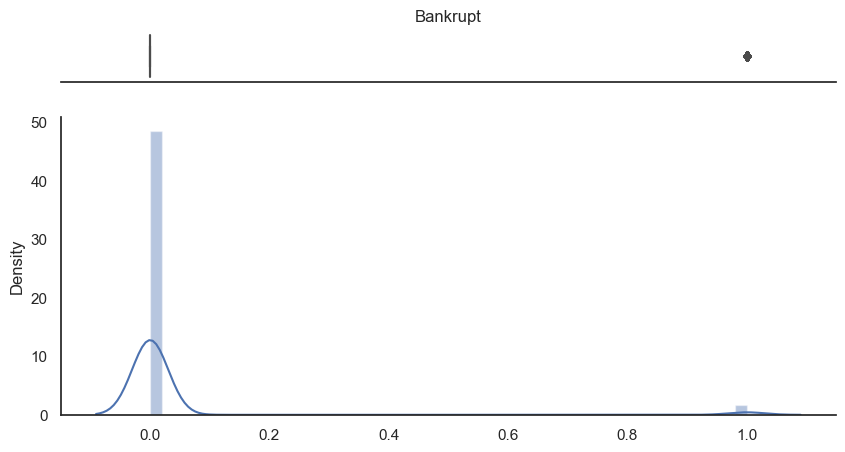

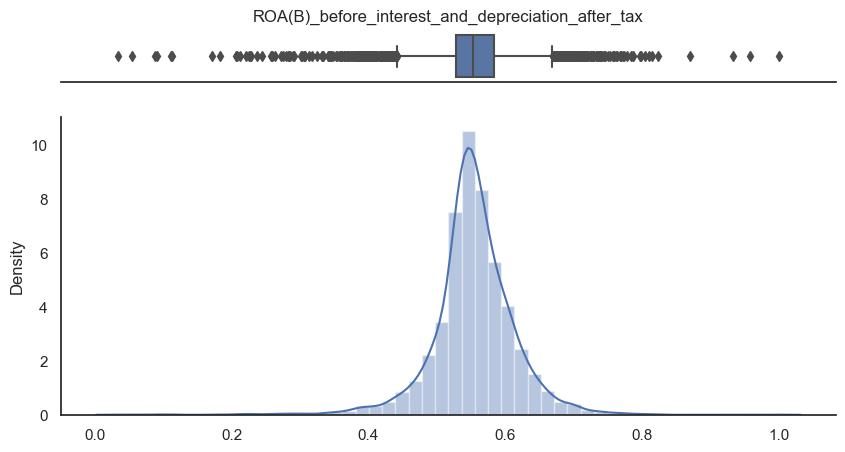

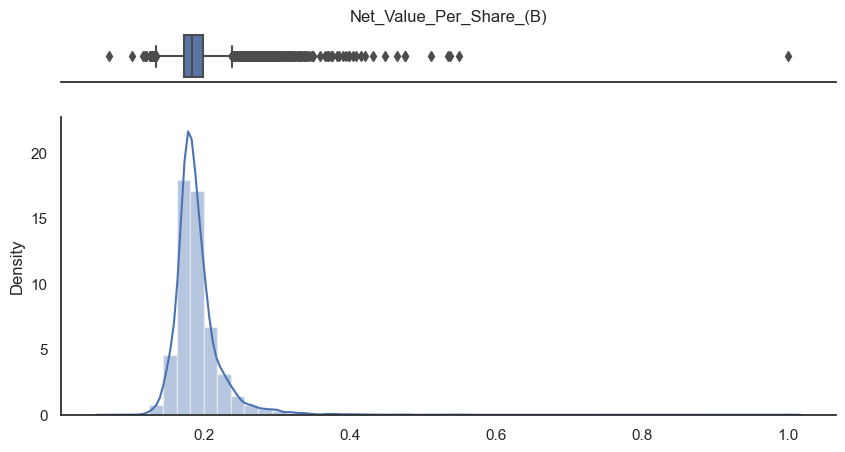

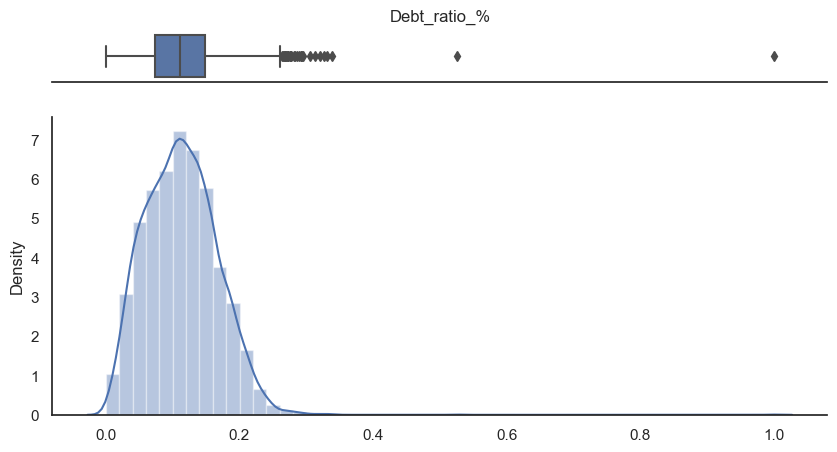

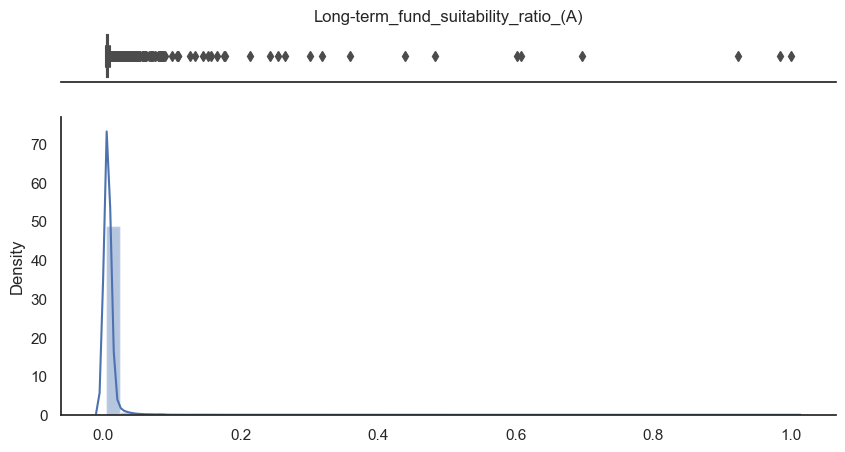

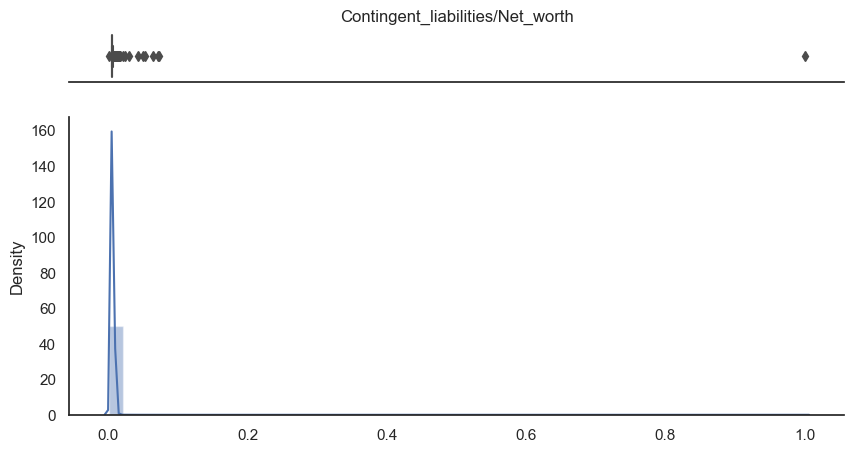

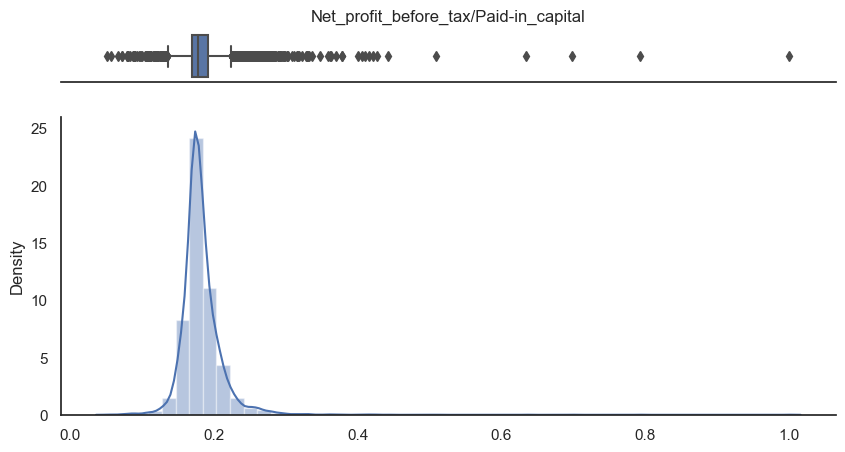

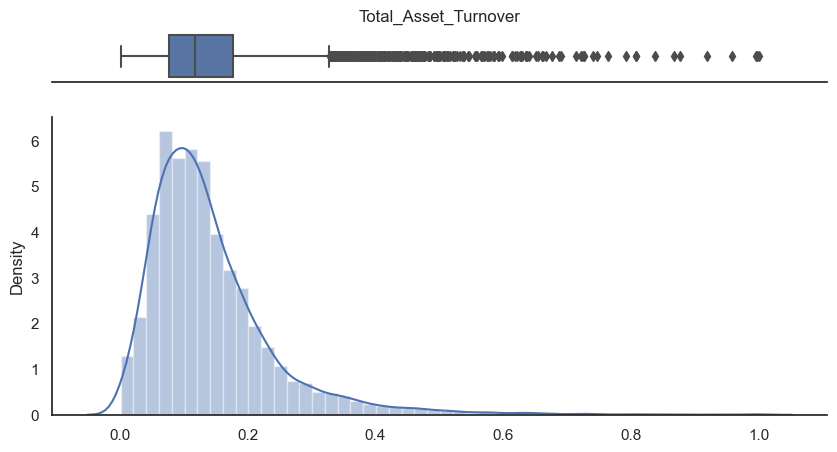

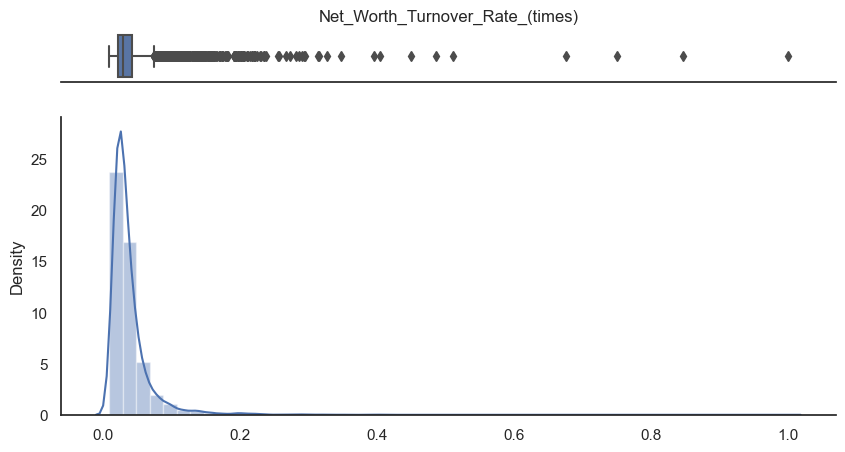

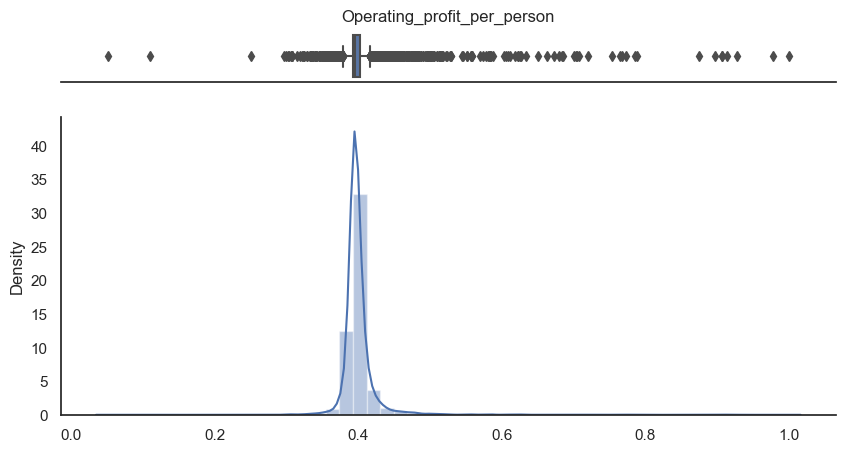

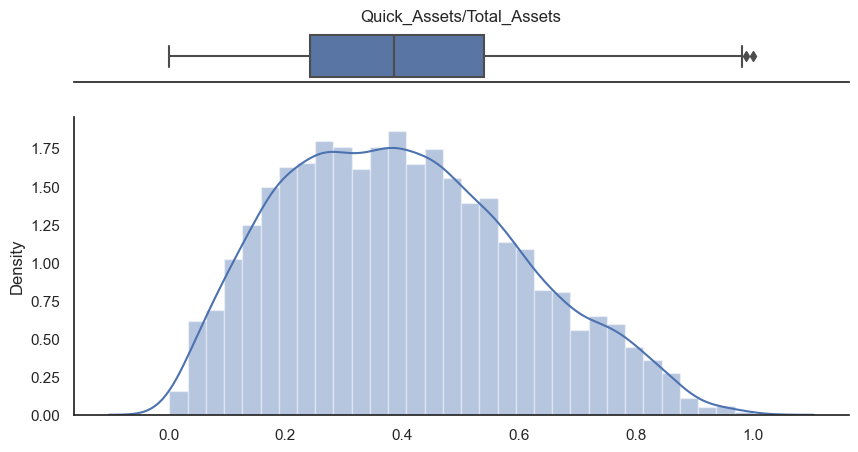

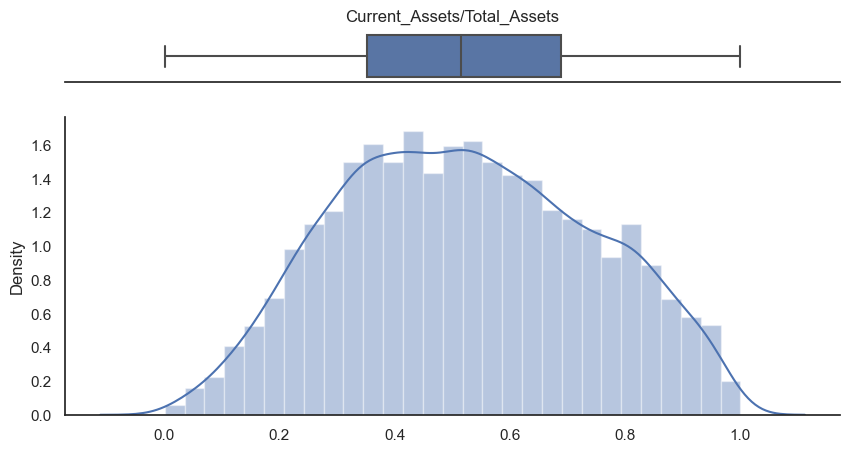

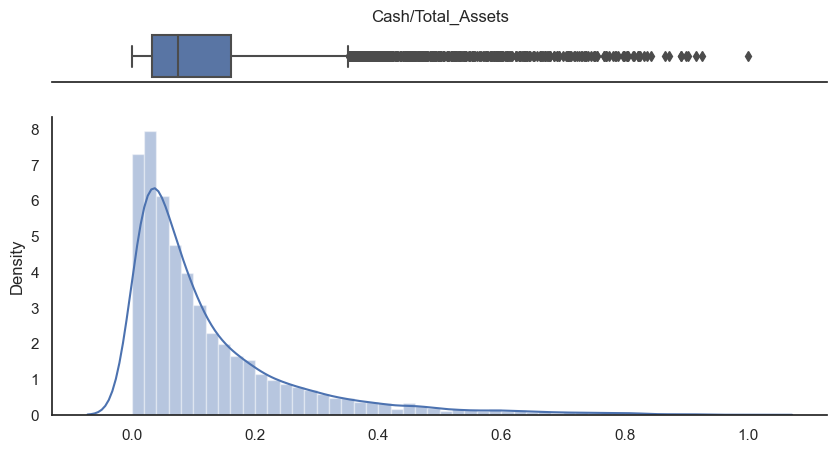

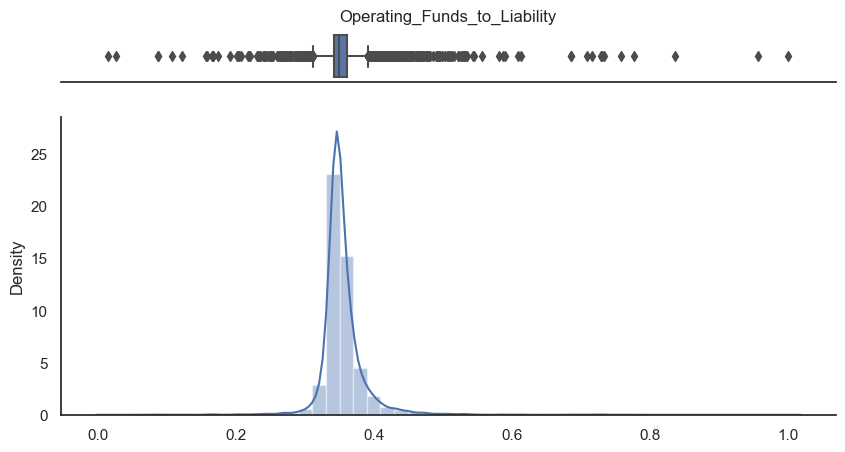

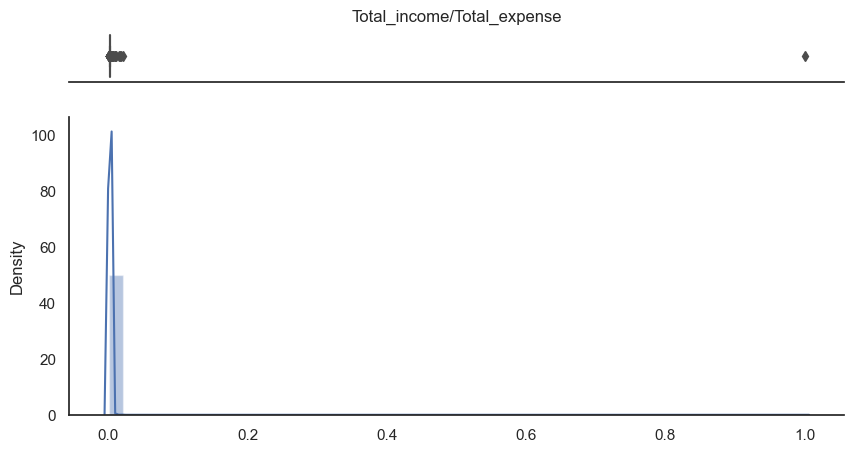

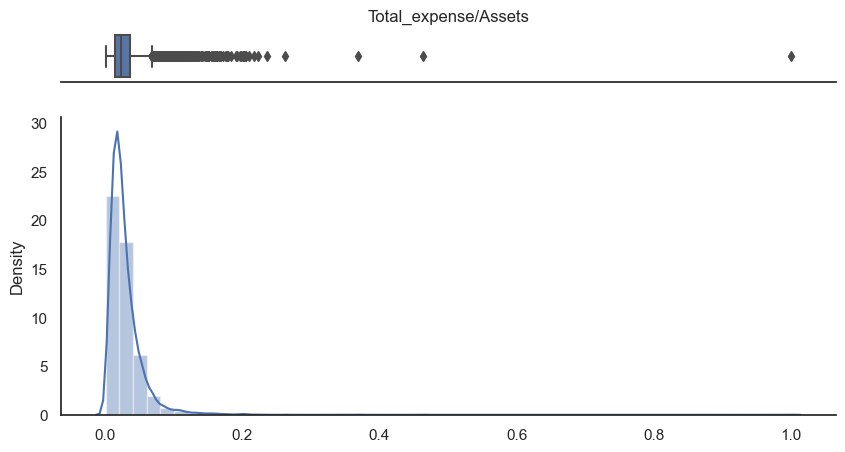

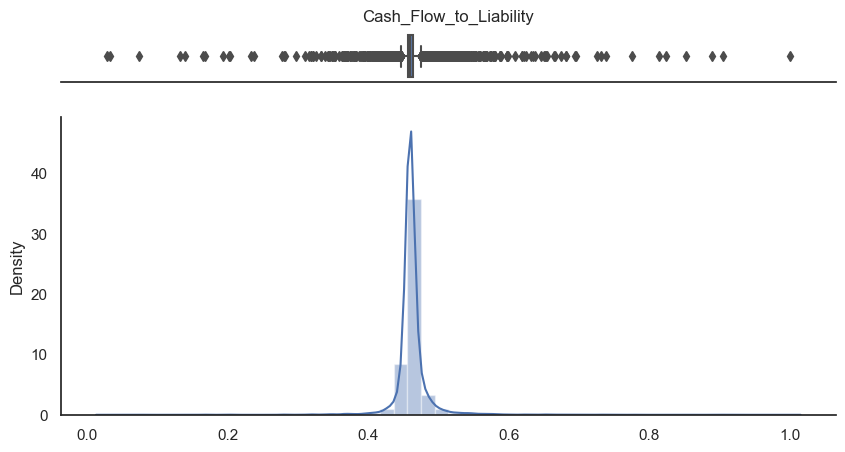

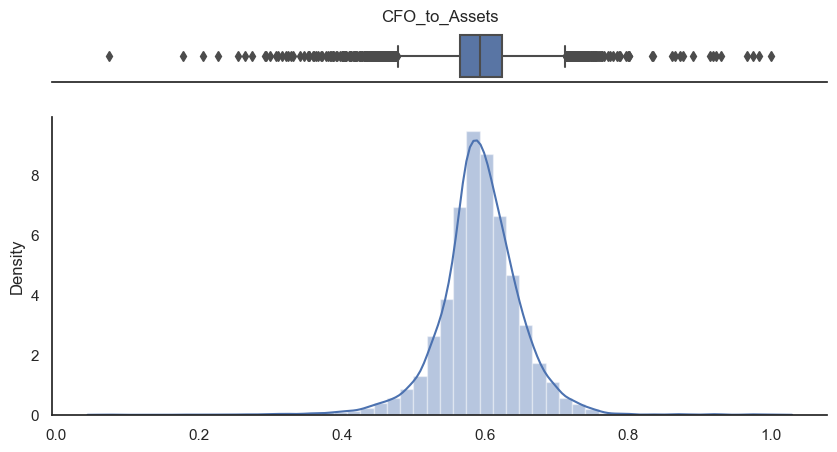

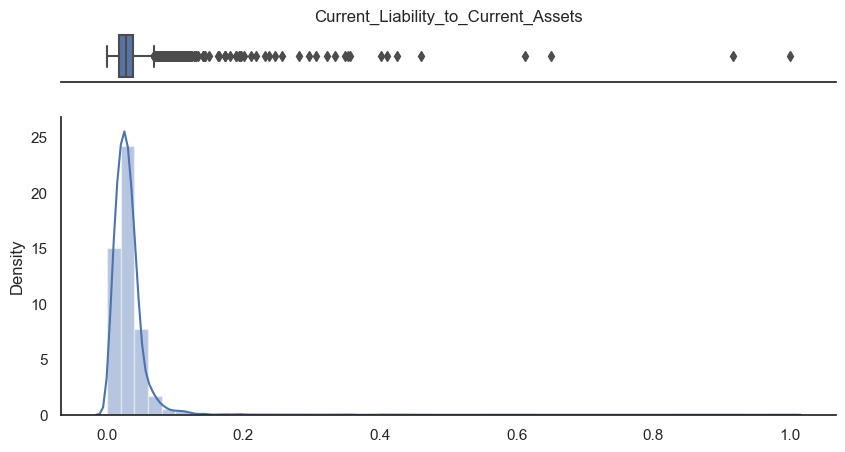

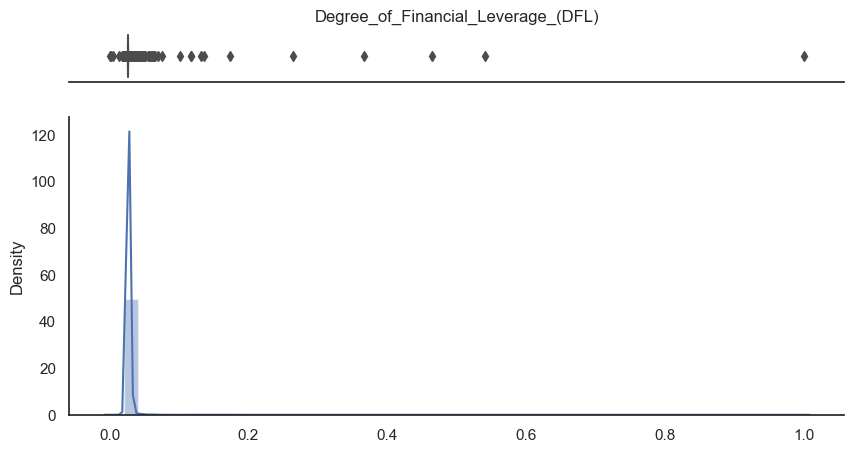

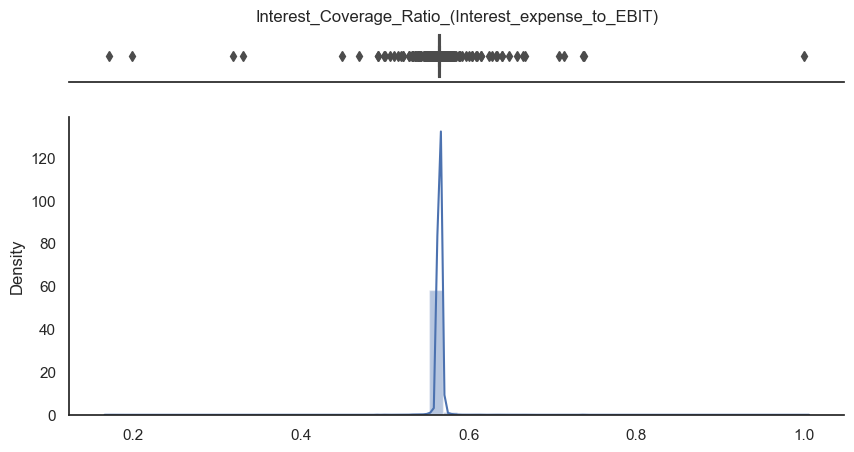

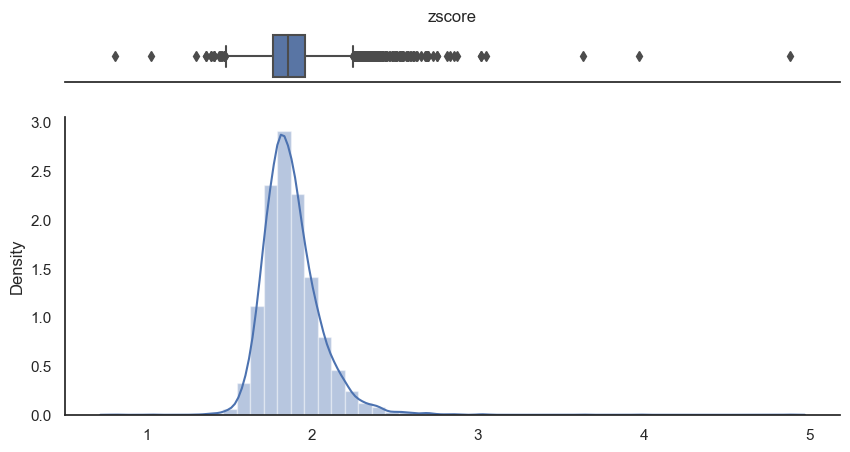

In [394]:
# check for outliers
# more outliers due to small dataset of bankruptcy 
for c in datacopy.columns:
    fig, ax = plt.subplots(2, figsize=(10,5),   # set subplots
                          sharex=True, 
                          gridspec_kw={'height_ratios': (0.15, 0.85)})
    
    ax_box = ax[0]
    ax_box = sns.boxplot(datacopy[c], ax=ax_box, orient='h')
    ax_box.set(title=c, yticks=[], xlabel='')
    sns.despine(ax=ax_box, left=True)
    
    ax_hist = ax[1]
    ax_hist = sns.distplot(datacopy[c], ax=ax_hist)
    ax_hist.set(xlabel='')
    sns.despine(ax=ax_hist)

plt.show()

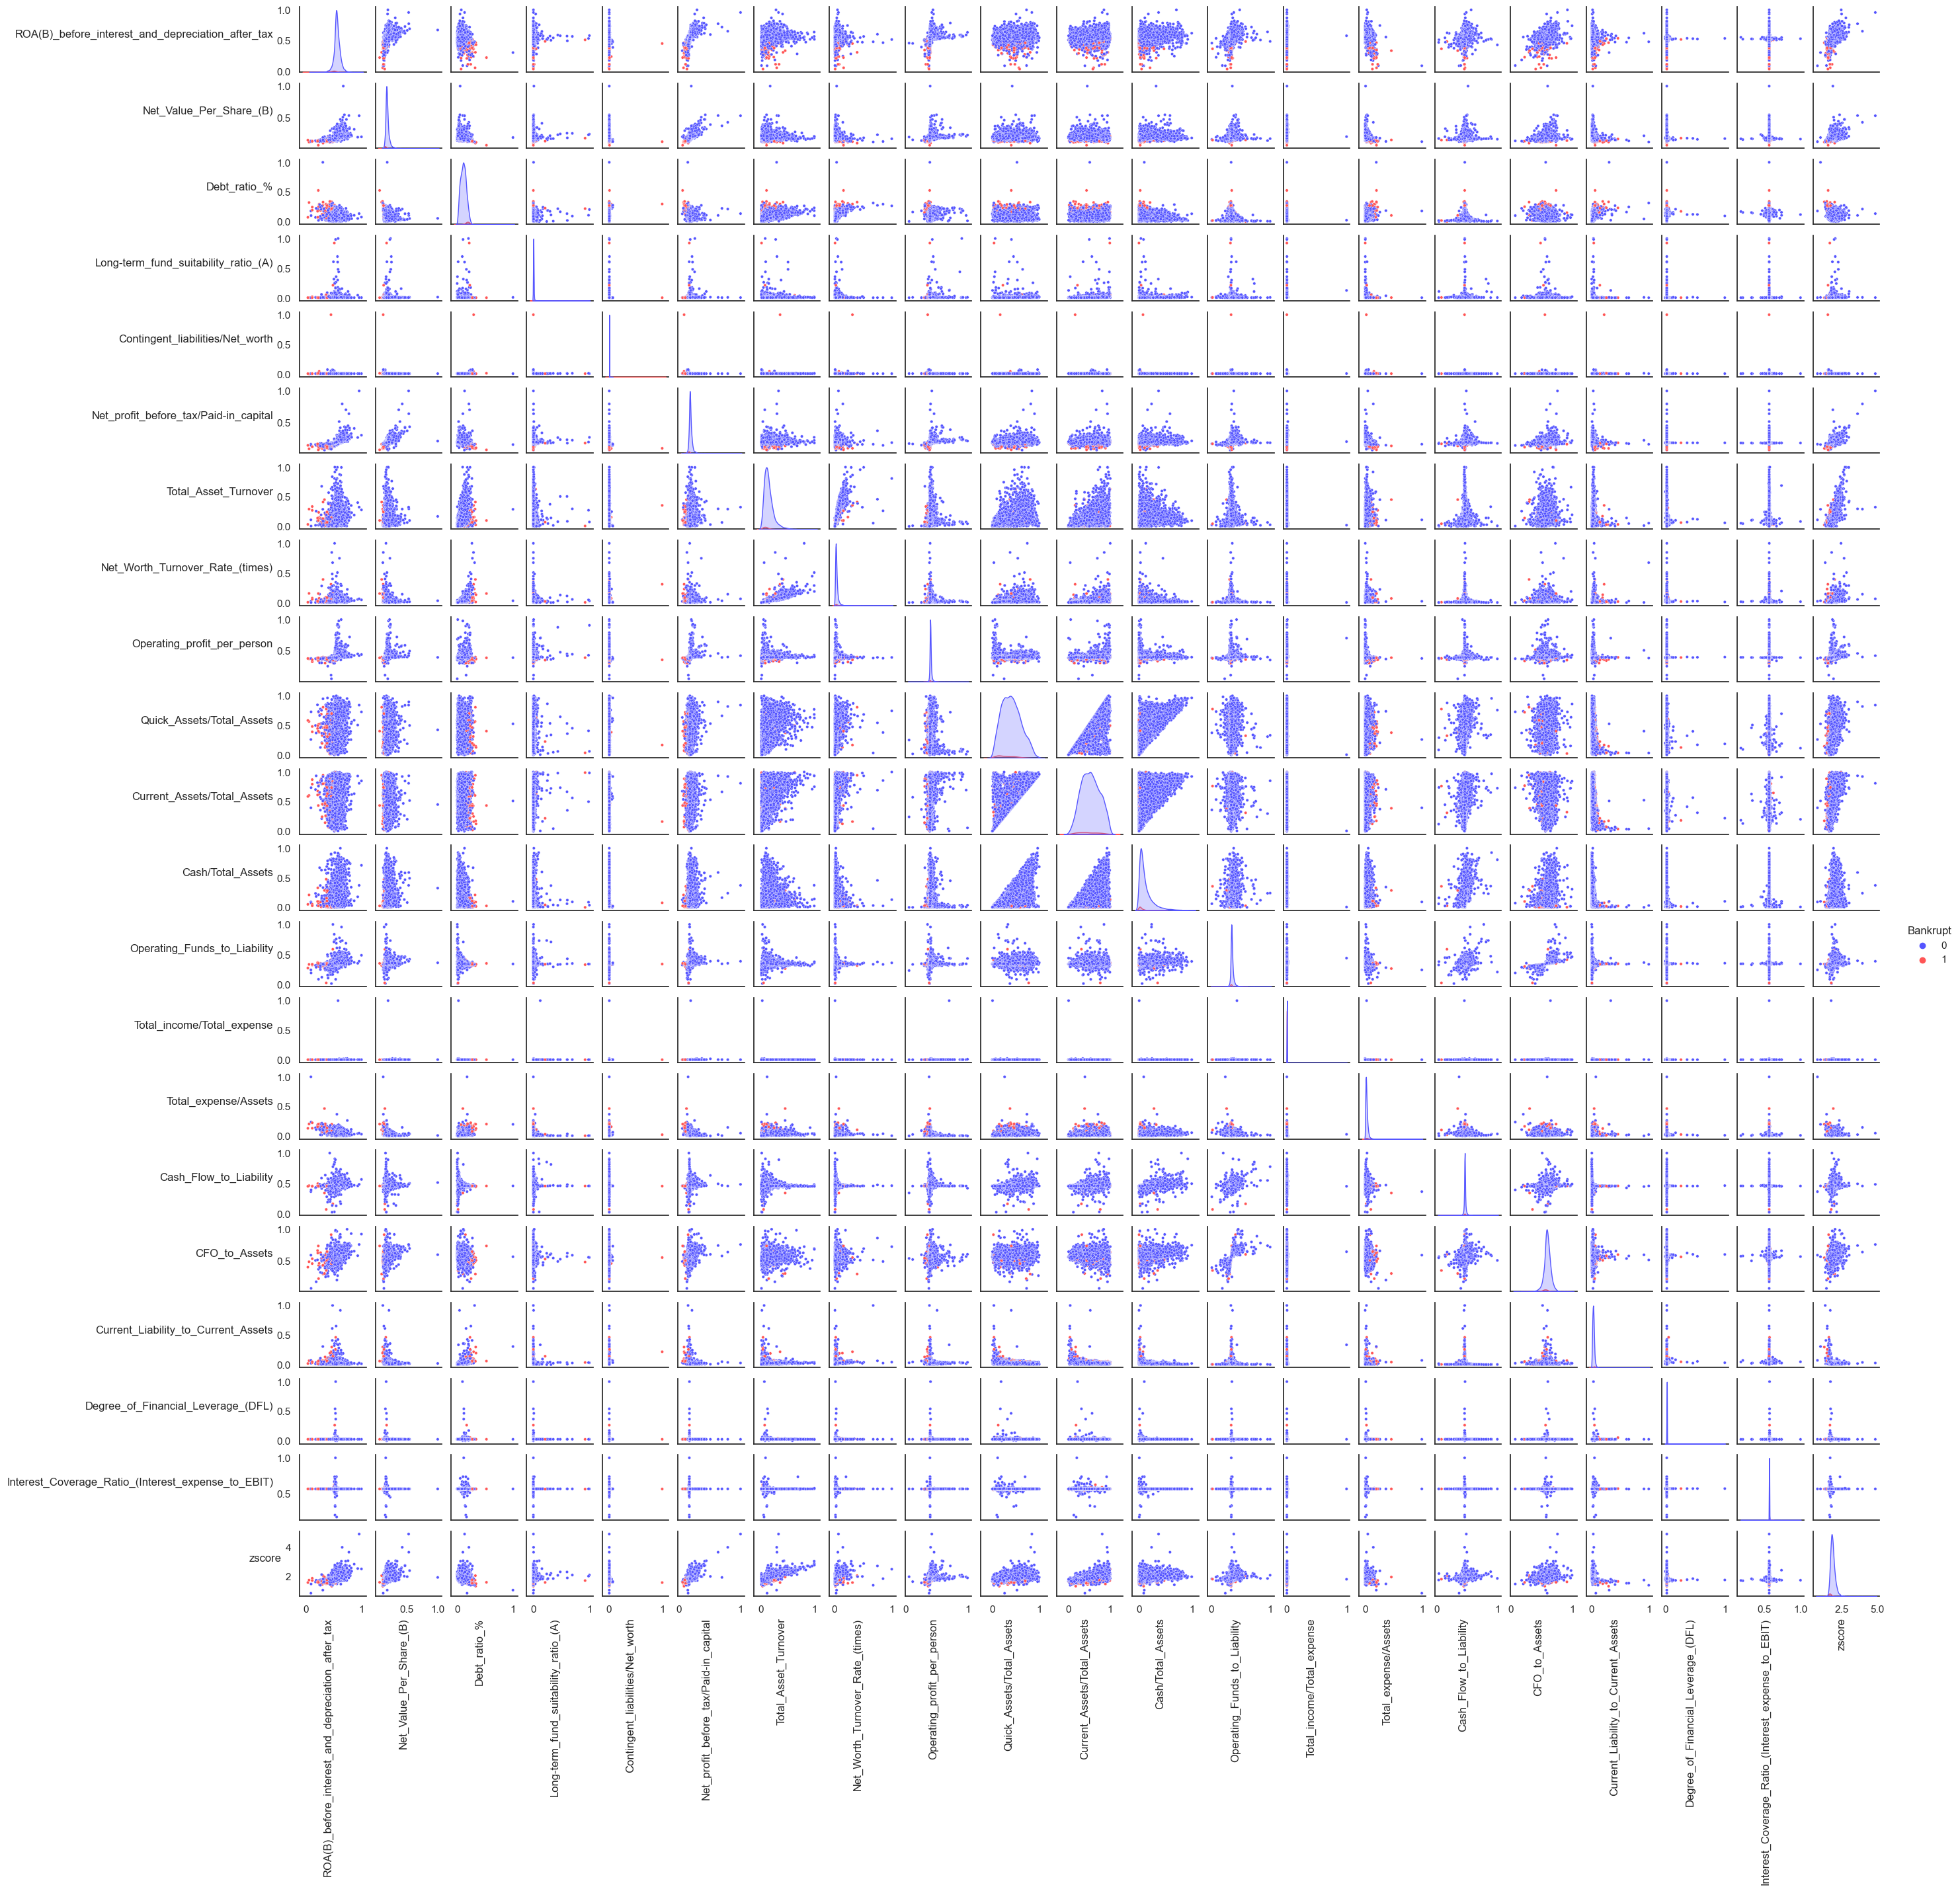

In [416]:
features = datacopy.columns
g = sns.pairplot(
    datacopy[features],
    hue = 'Bankrupt',
    palette = 'seismic',
    size = 1.2,
    diag_kind = 'kde',
    diag_kws = dict(shade = True),
    plot_kws = dict(s = 10))

for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 90)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')
    # set x labels alignment
    ax.xaxis.get_label().set_horizontalalignment('right')

plt.show()

In [400]:
datacopy.columns

Index(['Bankrupt', 'ROA(B)_before_interest_and_depreciation_after_tax',
       'Net_Value_Per_Share_(B)', 'Debt_ratio_%',
       'Long-term_fund_suitability_ratio_(A)',
       'Contingent_liabilities/Net_worth',
       'Net_profit_before_tax/Paid-in_capital', 'Total_Asset_Turnover',
       'Net_Worth_Turnover_Rate_(times)', 'Operating_profit_per_person',
       'Quick_Assets/Total_Assets', 'Current_Assets/Total_Assets',
       'Cash/Total_Assets', 'Operating_Funds_to_Liability',
       'Total_income/Total_expense', 'Total_expense/Assets',
       'Cash_Flow_to_Liability', 'CFO_to_Assets',
       'Current_Liability_to_Current_Assets',
       'Degree_of_Financial_Leverage_(DFL)',
       'Interest_Coverage_Ratio_(Interest_expense_to_EBIT)', 'zscore'],
      dtype='object')

Text(0.5, 1.0, 'Scatterplot of ROA against Total income/Total expense')

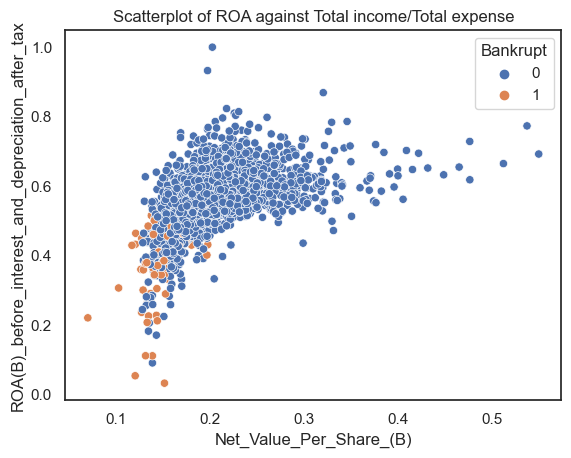

In [421]:
# plot interesting relationships observed above
sns.scatterplot(data=datacopy, x='Net_Value_Per_Share_(B)', y='ROA(B)_before_interest_and_depreciation_after_tax', hue='Bankrupt')
plt.title('Scatterplot of ROA against Total income/Total expense')

Text(0.5, 1.0, 'Scatterplot of Debt ratio against z score')

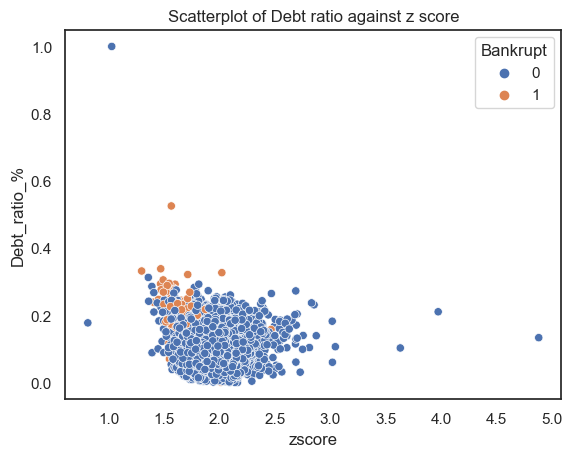

In [408]:
# plot interesting relationships observed above
sns.scatterplot(data=datacopy, x='zscore', y='Debt_ratio_%', hue='Bankrupt')
plt.title('Scatterplot of Debt ratio against z score')

Text(0.5, 1.0, 'Scatterplot of Current liability to current assets against Net profit before tax/ Paid-in capital')

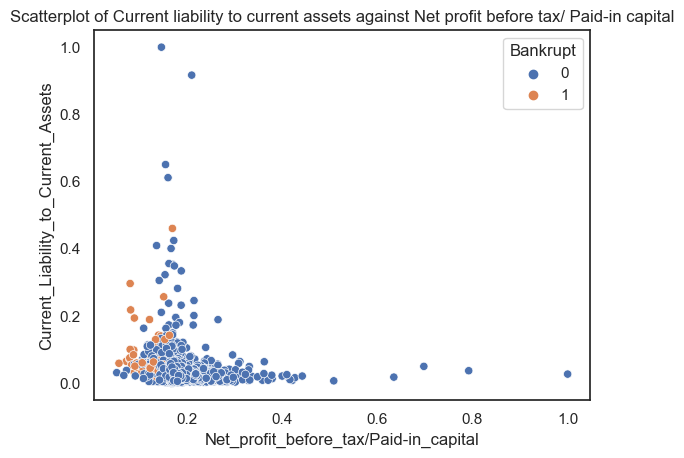

In [412]:
sns.scatterplot(data=datacopy, x='Net_profit_before_tax/Paid-in_capital', y='Current_Liability_to_Current_Assets', hue='Bankrupt')
plt.title('Scatterplot of Current liability to current assets against Net profit before tax/ Paid-in capital')

Text(0.5, 1.0, 'Scatterplot of DFL against Total expense/ Assets')

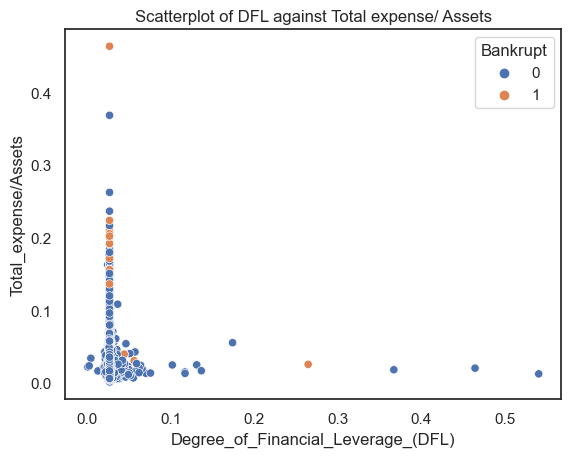

In [580]:
sns.scatterplot(data=datacopy, x='Degree_of_Financial_Leverage_(DFL)', y='Total_expense/Assets', hue='Bankrupt')
plt.title('Scatterplot of DFL against Total expense/ Assets')

In [417]:
# remove outliers seen in pairplots above
# bankrupt data pt: datacopy[datacopy['Contingent_liabilities/Net_worth'] <= 0.9]

# non-bankrupt data point
datacopy = datacopy[datacopy['Net_Value_Per_Share_(B)'] <= 0.9]
datacopy = datacopy[datacopy['Debt_ratio_%'] <= 0.9]
datacopy = datacopy[datacopy['Net_profit_before_tax/Paid-in_capital'] <= 0.95]
datacopy = datacopy[datacopy['Current_Liability_to_Current_Assets'] <= 0.9]
datacopy = datacopy[datacopy['Total_expense/Assets'] <= 0.9]
datacopy = datacopy[datacopy['Degree_of_Financial_Leverage_(DFL)'] <= 0.9]
datacopy = datacopy[datacopy['zscore'] <= 4]
datacopy = datacopy[datacopy['Total_income/Total_expense'] <= 0.9]
datacopy = datacopy[datacopy['Interest_Coverage_Ratio_(Interest_expense_to_EBIT)'] <= 0.9]

# check individually to verify features and row 
# datacopy[datacopy['Net_Value_Per_Share_(B)'] > 0.9]
# datacopy[datacopy['Debt_ratio_%'] > 0.6]
# datacopy[datacopy['Net_profit_before_tax/Paid-in_capital'] > 0.95]
# datacopy[datacopy['Current_Liability_to_Current_Assets'] > 0.9]
# datacopy[datacopy['Total_expense/Assets'] > 0.9]
# datacopy[datacopy['Degree_of_Financial_Leverage_(DFL)'] > 0.9]
# datacopy[datacopy['zscore'] > 4]
# datacopy[datacopy['Total_income/Total_expense'] > 0.9]
# datacopy[datacopy['Interest_Coverage_Ratio_(Interest_expense_to_EBIT)'] > 0.9]

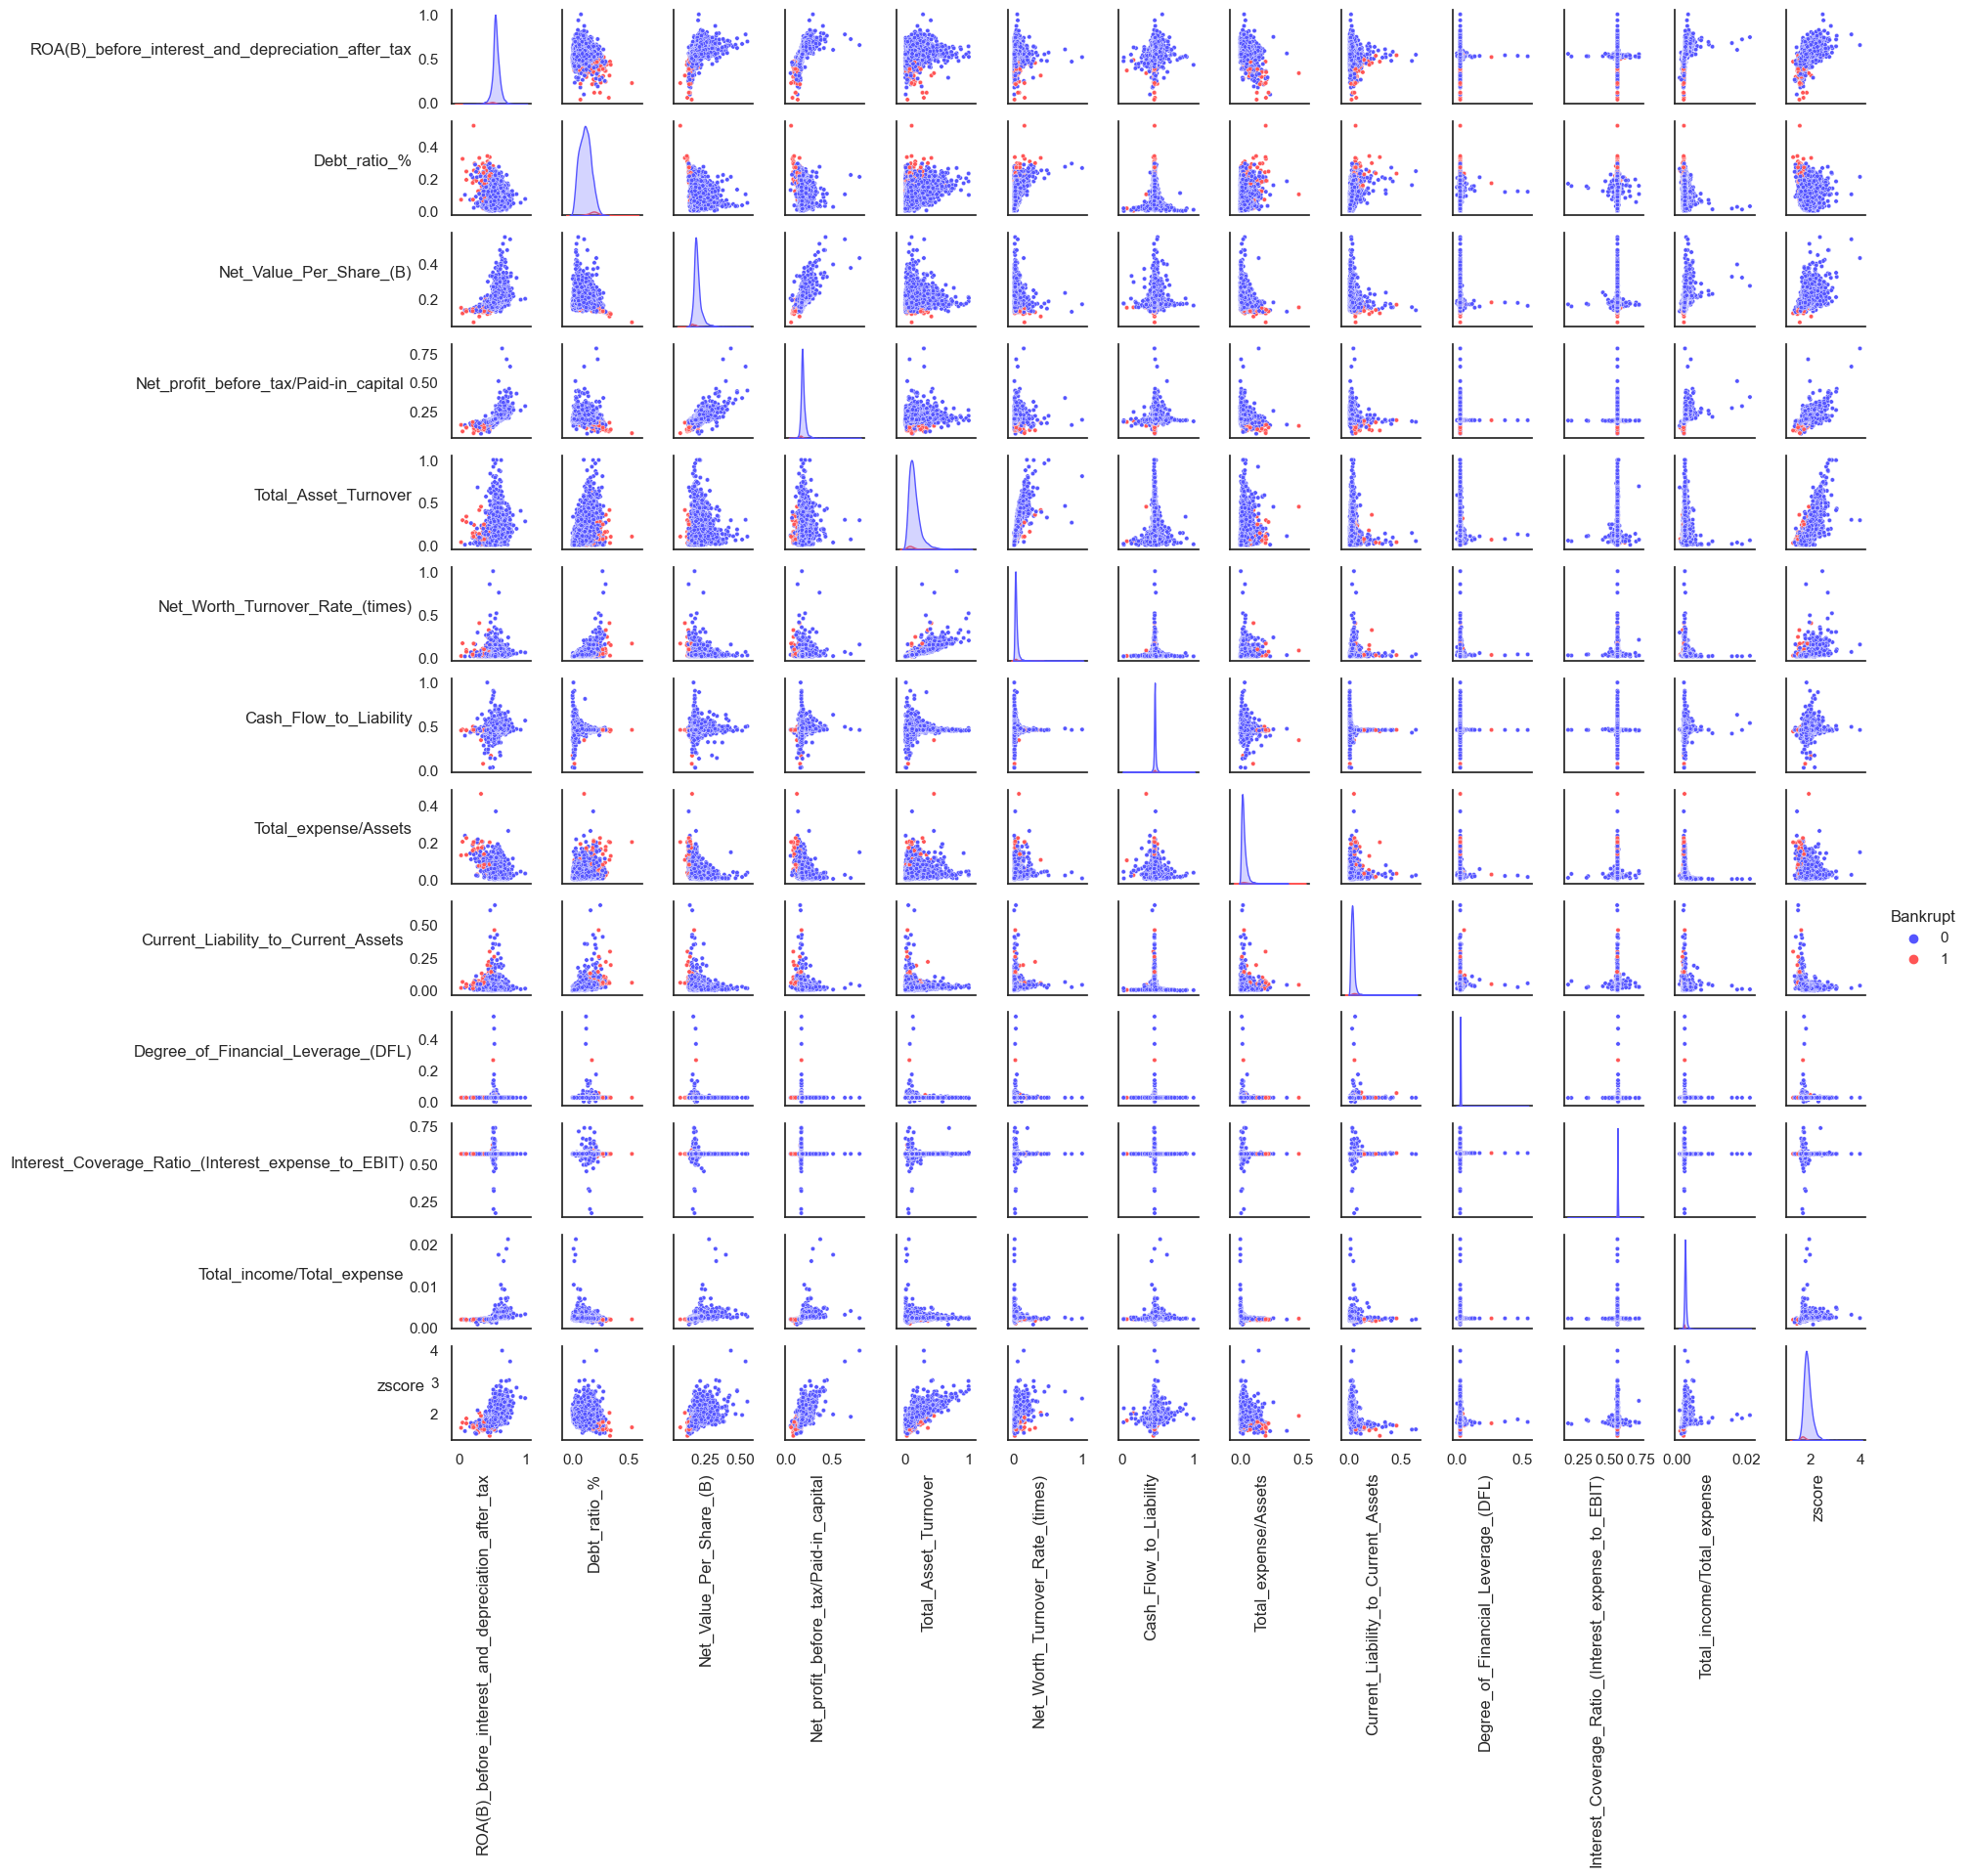

In [418]:
# zoom into some features of interest
pairplotfeatures = datacopy[[
                        'Bankrupt',
                        'ROA(B)_before_interest_and_depreciation_after_tax',
                        'Debt_ratio_%',
                        'Net_Value_Per_Share_(B)',
                        'Net_profit_before_tax/Paid-in_capital',
                        'Total_Asset_Turnover',
                        'Net_Worth_Turnover_Rate_(times)',
                        'Cash_Flow_to_Liability',
                        'Total_expense/Assets',
                        'Current_Liability_to_Current_Assets',
                        'Degree_of_Financial_Leverage_(DFL)',
                        'Interest_Coverage_Ratio_(Interest_expense_to_EBIT)',
                        'Total_income/Total_expense',
                        'zscore']]

features = pairplotfeatures.columns
g = sns.pairplot(
    pairplotfeatures[features],
    hue = 'Bankrupt',
    palette = 'seismic',
    size = 1.2,
    diag_kind = 'kde',
    diag_kws = dict(shade = True),
    plot_kws = dict(s = 10))

for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 90)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')
    # set x labels alignment
    ax.xaxis.get_label().set_horizontalalignment('right')

plt.show()

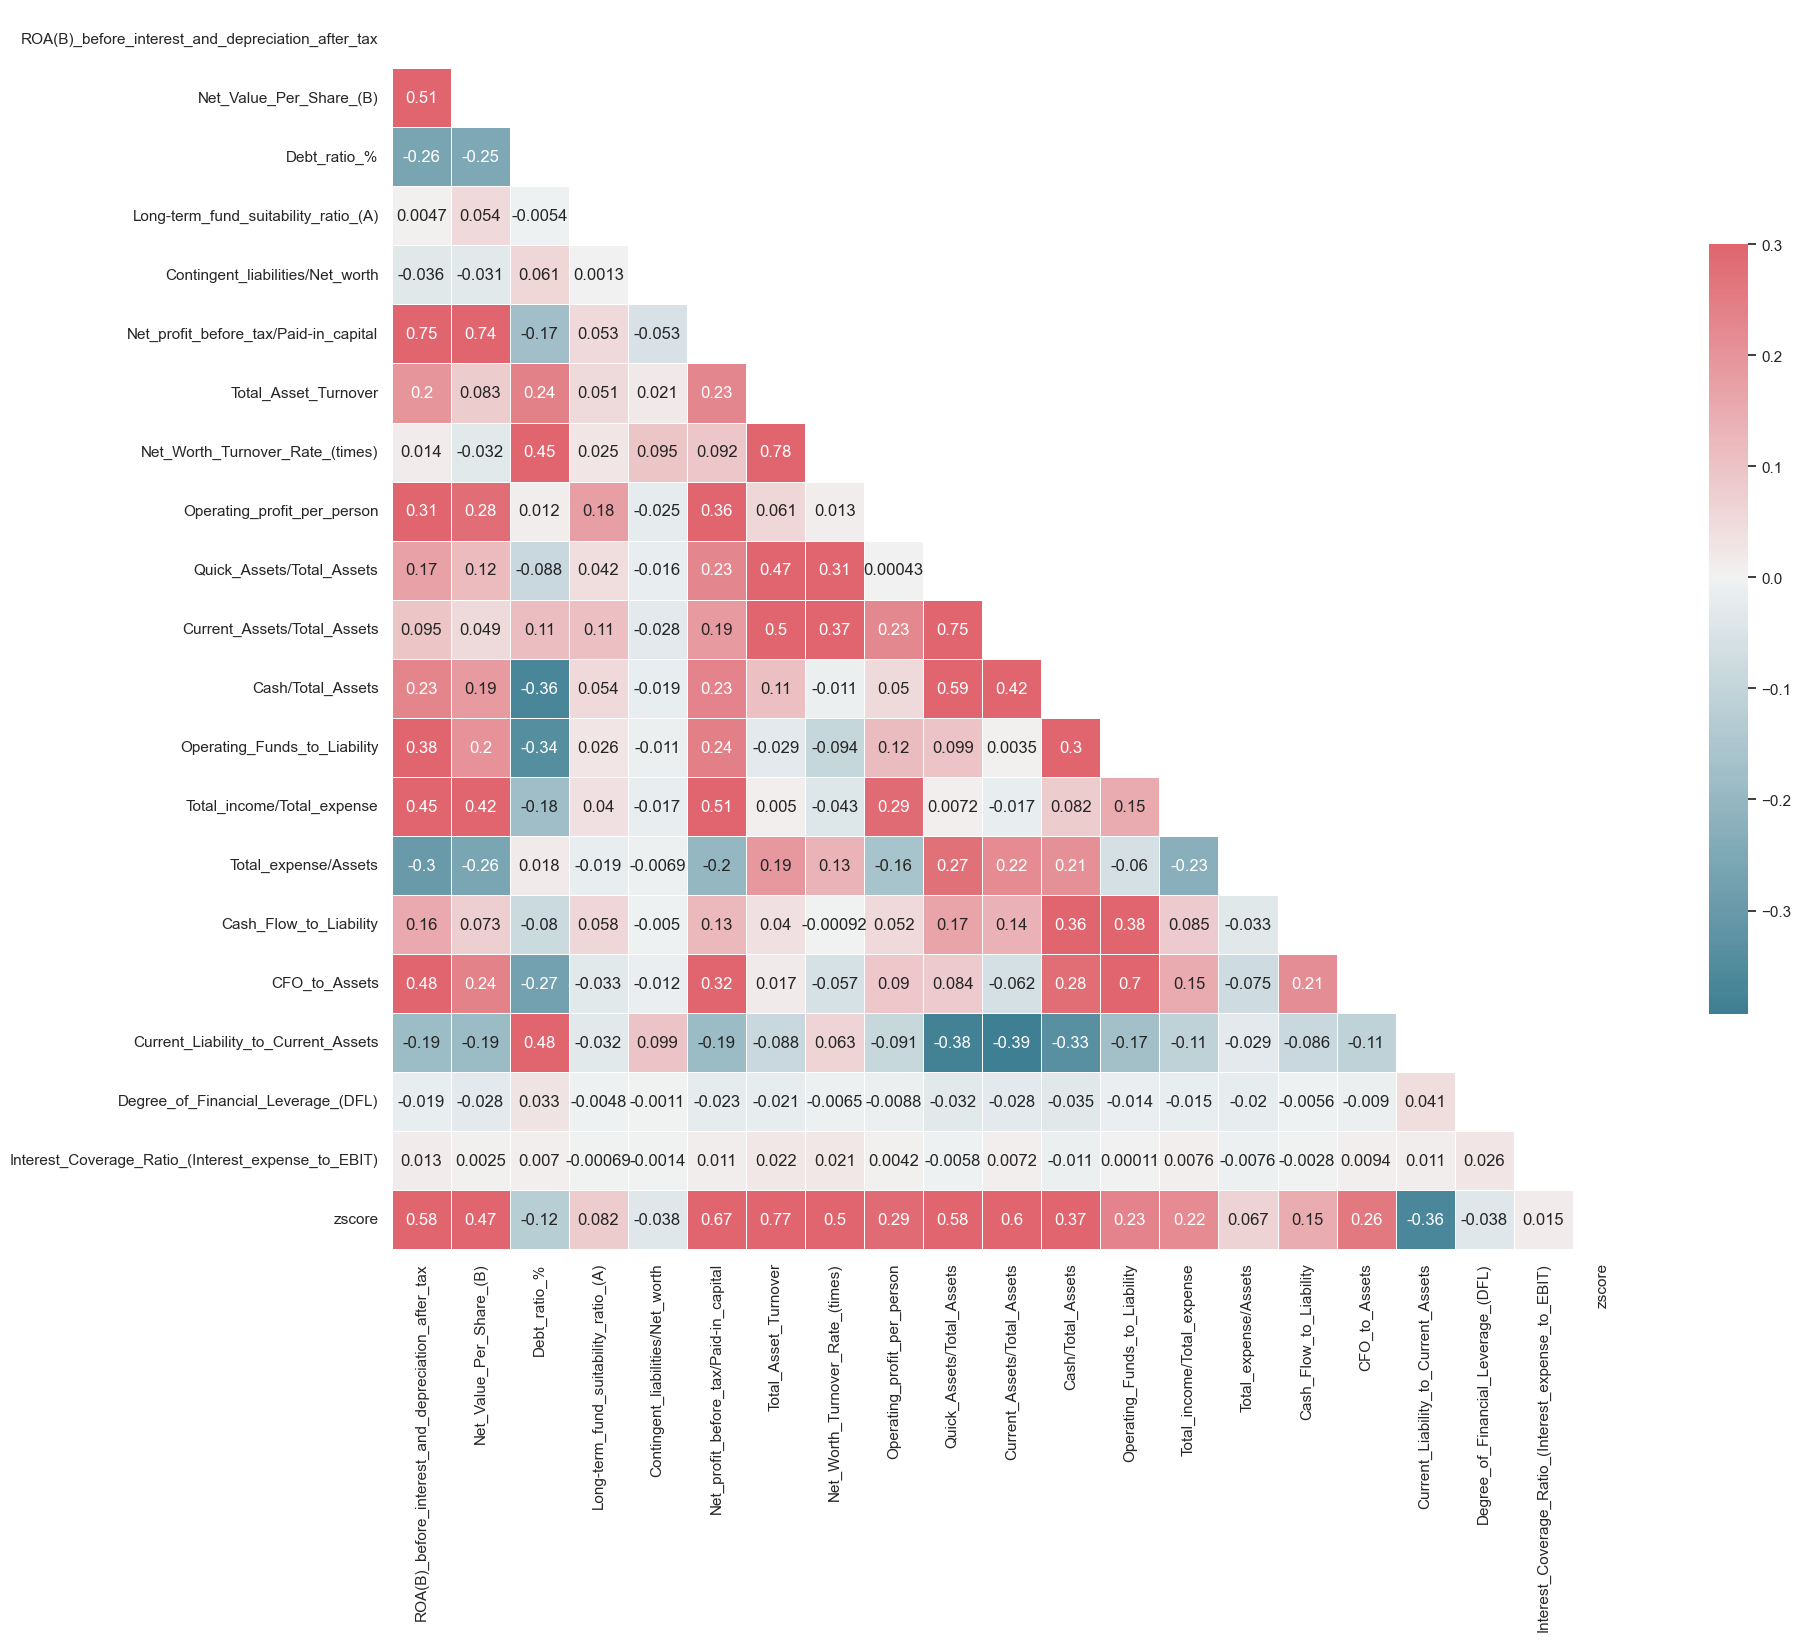

In [532]:
# set style color
sns.set(style='white')

# generate a custom divering colormap
cmap = sns.diverging_palette(220,10, as_cmap=True)

# generate a mask for upper triangle
mask = np.zeros_like(datacopy.loc[:, datacopy.columns != 'Bankrupt'].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# set up matplotlib fig
f, ax = plt.subplots(figsize=(20,20))

# draw heatmap with mask and correct aspect ratio
sns.heatmap(datacopy.loc[:, datacopy.columns != 'Bankrupt'].corr(), mask=mask, cmap=cmap, annot=True, vmax=0.3, center=0,
           square=True, linewidths=0.5, cbar_kws={'shrink':0.5})
plt.show()


<AxesSubplot: title={'center': 'Class'}, xlabel='Bankrupt', ylabel='Count'>

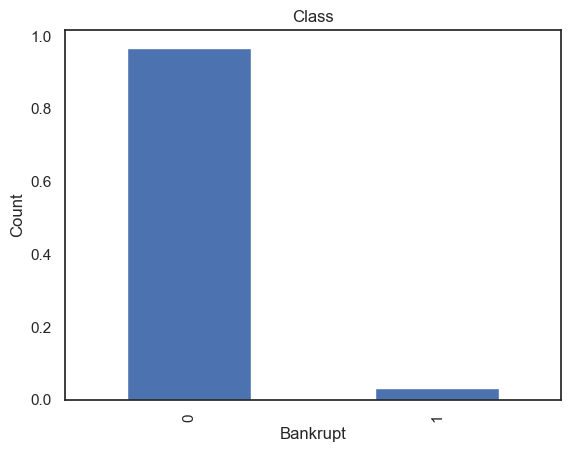

In [422]:
# look at labels; unbalanced dataset 
datacopy['Bankrupt'].value_counts(normalize=True).plot(kind='bar', 
                                     xlabel='Bankrupt', 
                                     ylabel='Count', 
                                     title='Class')

In [423]:
# If no models used, 3% accuracy by simple marking of companies 
datacopy['Bankrupt'].value_counts(normalize=True)

0    0.967695
1    0.032305
Name: Bankrupt, dtype: float64

Text(0.5, 1.0, 'Probability distribution of ROA in companies')

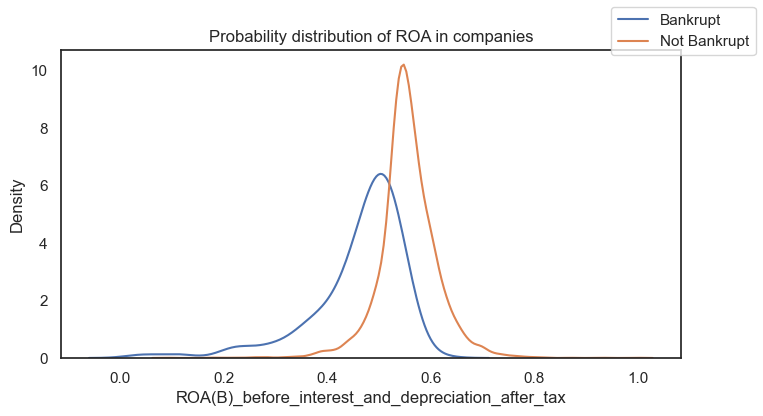

In [575]:
fig = plt.figure(figsize=(8,4))
sns.kdeplot(datacopy[datacopy['Bankrupt']==1]['ROA(B)_before_interest_and_depreciation_after_tax'])
sns.kdeplot(datacopy[datacopy['Bankrupt']==0]['ROA(B)_before_interest_and_depreciation_after_tax'])
fig.legend(labels=['Bankrupt', 'Not Bankrupt'])
plt.title('Probability distribution of ROA in companies')

Text(0.5, 1.0, 'Probability distribution of Debt ratio in companies')

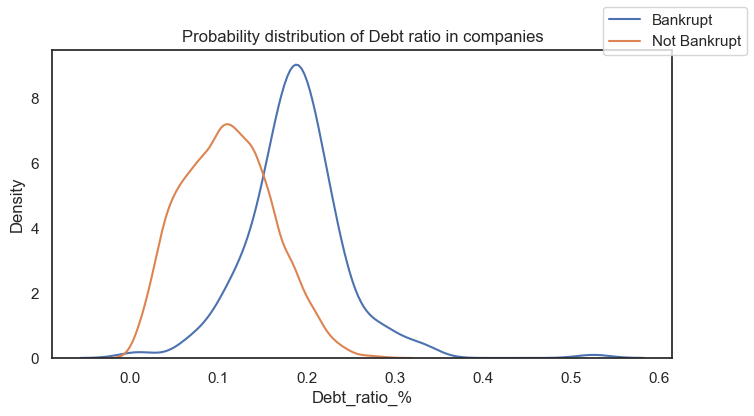

In [576]:
fig = plt.figure(figsize=(8,4))
sns.kdeplot(datacopy[datacopy['Bankrupt']==1]['Debt_ratio_%'])
sns.kdeplot(datacopy[datacopy['Bankrupt']==0]['Debt_ratio_%'])
fig.legend(labels=['Bankrupt', 'Not Bankrupt'])
plt.title('Probability distribution of Debt ratio in companies')

Text(0.5, 1.0, 'Probability distribution of Total asset turnover in companies ')

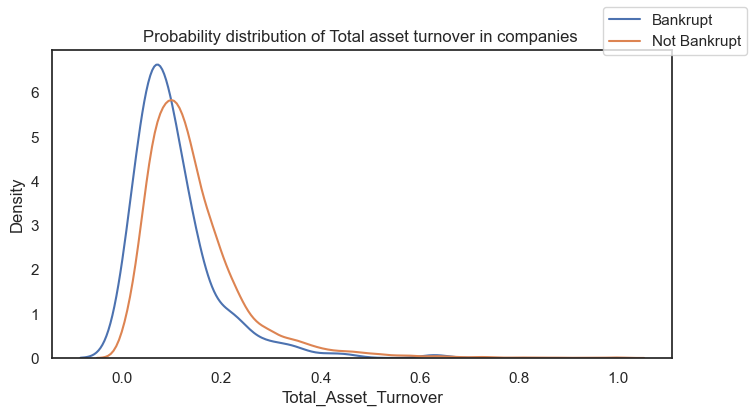

In [577]:
fig = plt.figure(figsize=(8,4))
sns.kdeplot(datacopy[datacopy['Bankrupt']==1]['Total_Asset_Turnover'])
sns.kdeplot(datacopy[datacopy['Bankrupt']==0]['Total_Asset_Turnover'])
fig.legend(labels=['Bankrupt', 'Not Bankrupt'])
plt.title('Probability distribution of Total asset turnover in companies ')

Text(0.5, 1.0, 'Probability distribution of Cash flow to liability in companies')

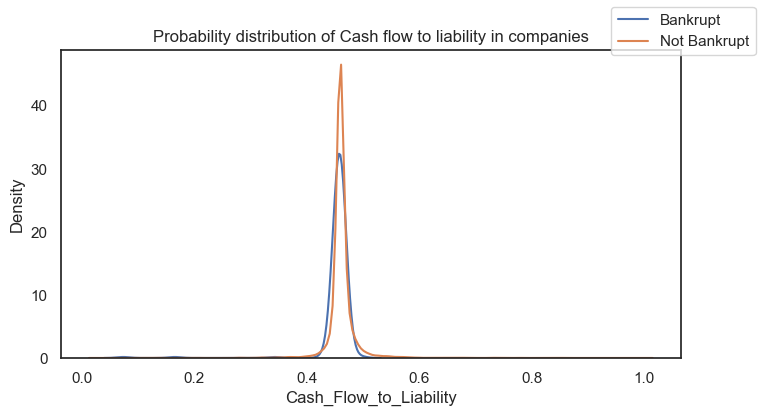

In [578]:
fig = plt.figure(figsize=(8,4))
sns.kdeplot(datacopy[datacopy['Bankrupt']==1]['Cash_Flow_to_Liability'])
sns.kdeplot(datacopy[datacopy['Bankrupt']==0]['Cash_Flow_to_Liability'])
fig.legend(labels=['Bankrupt', 'Not Bankrupt'])
plt.title('Probability distribution of Cash flow to liability in companies')

## 3. Preparing imbalanced dataset for modelling 

Use SMOTE for imbalanced dataset
Le et al. (2018) 'Oversampling Techniques for Bankruptcy Prediction: Novel Features from a Transaction Dataset', Symmetry, vol 10(3), 79, doi: https://doi.org/10.3390/sym10040079
https://www.mdpi.com/2073-8994/10/4/79

In [ ]:
# all data are scaled; use random forest to first find important features
# after determining impt features, SMOTE then PCA if necessary  
# selecting only relevevant col by conducting research 
# apply smote after splitting data later

In [139]:
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.metrics import specificity_score
from collections import Counter
print(imblearn.__version__)

from collections import Counter

0.10.1


In [140]:
X = datacopy.loc[:, datacopy.columns != 'Bankrupt']
y = datacopy.Bankrupt.astype('int')

In [141]:
# split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [142]:
# oversample with minority class by synthetically generating additional samples
smote = SMOTE()

In [143]:
X_train, y_train = smote.fit_resample(X_train, y_train)

In [144]:
# check counter
print("After oversampling of training data: ", Counter(y_train))
print("Check test data: ", Counter(y_test))

After oversampling of training data:  Counter({0: 5271, 1: 5271})
Check test data:  Counter({0: 1319, 1: 43})


## 4. Machine Learning models 

### 4a. Baseline model: Logistic Regression

In [145]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

In [146]:
from sklearn.metrics import r2_score

In [147]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
y_test_pred = logreg.predict(X_test)
print(classification_report(y_test, y_test_pred))
ac = accuracy_score(y_test, y_test_pred)
print('Logistic Regression accuracy: ', round(ac, 4))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92      1319
           1       0.16      0.88      0.27        43

    accuracy                           0.85      1362
   macro avg       0.58      0.87      0.59      1362
weighted avg       0.97      0.85      0.89      1362

Logistic Regression accuracy:  0.848


In [571]:
# check performance of other models
kfold=5 # similar for kfold=10
dtmodel = DecisionTreeClassifier(random_state=42)
rfmodel = RandomForestClassifier(random_state=42)
svcmodel = SVC(random_state=42)
xgbmodel = XGBClassifier(random_state=42)

# evaluate model
dt_scores = cross_val_score(dtmodel, X_train, y_train, scoring='accuracy', cv=kfold)
rf_scores = cross_val_score(rfmodel, X_train, y_train,  scoring='accuracy',cv=kfold)
svc_scores = cross_val_score(svcmodel, X_train, y_train, scoring='accuracy', cv=kfold)
xgb_scores = cross_val_score(xgbmodel, X_train, y_train, scoring='accuracy', cv=kfold)

# summarize performance
print('DT Mean Accuracy: %.4f' % dt_scores.mean())
print('RF Mean Accuracy: %.4f' % rf_scores.mean())
print('SVC Mean Accuracy: %.4f' % svc_scores.mean())
print('XGB Mean Accuracy: %.4f' % xgb_scores.mean())

DT Mean Accuracy: 0.9523
RF Mean Accuracy: 0.9788
SVC Mean Accuracy: 0.8829
XGB Mean Accuracy: 0.9803


In [148]:
# show summary report for classification report 
def show_summary_report(actual, prediction, probabilities):
    
    if isinstance(actual, pd.Series):
        actual = actual.values.astype(int)
    prediction = prediction.astype(int)
        
    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' 
          % accuracy_score(actual, prediction))
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' 
          % precision_score(actual, prediction))
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples. Best:1, Worst: 0' 
          % recall_score(actual, prediction))
    print('Specificity: %.4f [TN / (TN + FP)] Find all the negative samples. Best:1, Worst: 0'
         % specificity_score(actual, prediction))
    print('ROC AUC : %.4f      Best: 1, Worst: <0.5' 
          % roc_auc_score(actual, prediction))
    print('-' * 107)
        
    # confusion matrix
    mat = confusion_matrix(actual, prediction)
    
    # precision/recall
    precision, recall, _ = precision_recall_curve(actual, prediction)
    average_precision = average_precision_score(actual, prediction)
        
    # compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, prediction)
    roc_auc = auc(fpr, tpr)
        
    # plot
    fig, ax = plt.subplots(1, 3, figsize=(18,6))
    fig.subplots_adjust(left=0.02, right = 0.98, wspace=0.2)
        
    # confusion matrix
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', 
                cbar=False, cmap='Blues', ax=ax[0])
        
    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    
    # precision/recall
    step_kwargs= {'step': 'post'}
    ax[1].step(recall, precision, color='b', alpha=0.2, where='post')
    ax[1].fill_between(recall, precision, alpha=0.2, color = 'b', **step_kwargs)
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlabel(['Recall'])
    ax[1].set_ylabel(['Precision'])
    ax[1].set_title(['2-class Precision-Recall curve'])
        
    # ROC
    ax[2].plot(fpr, tpr, color='darkorange', lw=2,
                  label='ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel(['False Positive Rate'])
    ax[2].set_ylabel(['True Positive Rate'])
    ax[2].set_title(['Receiver Operating Characteristic'])
    ax[2].legend(loc='lower right')
    
    plt.show()

Accuracy : 0.8480 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.1583 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8837 [TP / (TP + FN)] Find all the positive samples. Best:1, Worst: 0
Specificity: 0.8469 [TN / (TN + FP)] Find all the negative samples. Best:1, Worst: 0
ROC AUC : 0.8653      Best: 1, Worst: <0.5
-----------------------------------------------------------------------------------------------------------


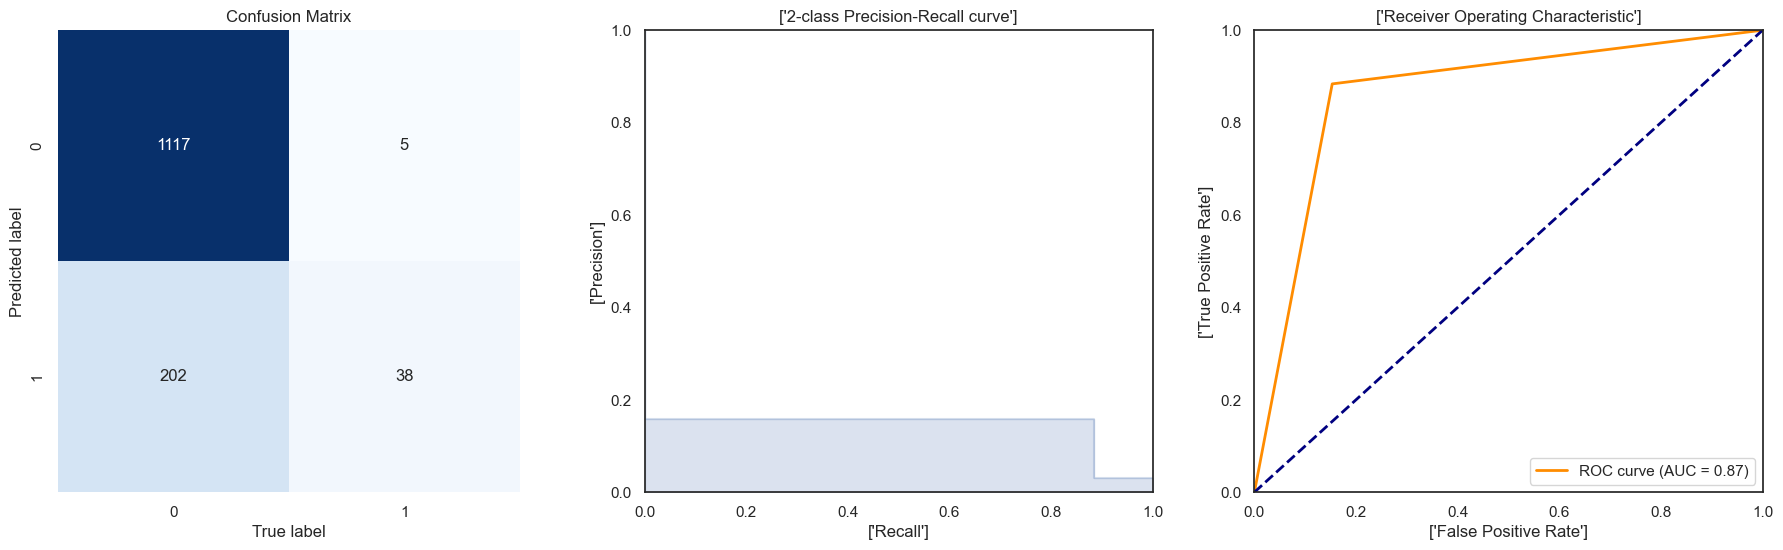

In [465]:
# baseline metrics
y_test_pred = logreg.predict(X_test)
y_test_prob = logreg.predict_proba(X_test)
show_summary_report(y_test, y_test_pred, y_test_prob)
ac = accuracy_score(y_test, y_test_pred)

### 4b. Decision  Tree

In [150]:
from sklearn.tree import DecisionTreeClassifier

In [151]:
dtmodel = DecisionTreeClassifier(random_state=42)
dtmodel.fit(X_train, y_train)
y_test_pred_dt = dtmodel.predict(X_test)
dtac = accuracy_score(y_test, y_test_pred_dt)
print(classification_report(y_test, y_test_pred_dt))
print('Decision Tree Accuracy: ', round(dtac, 4))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95      1319
           1       0.16      0.42      0.23        43

    accuracy                           0.91      1362
   macro avg       0.57      0.67      0.59      1362
weighted avg       0.95      0.91      0.93      1362

Decision Tree Accuracy:  0.9126


#### 4b(i). Find Best estimator for Decision Tree 

In [221]:
dt_params = {
    'criterion': ['gini'], 
    'max_depth': [ 10, 20, 30, 40], #30, 35, 50, 70
    'min_samples_split':[2], # 3, 4
    'min_samples_leaf': [2], # 1, 2 
    # 'max_leaf_nodes': [70, 90, 110, 130], 
    'random_state': [42]
}

In [222]:
dt_gs = GridSearchCV(DecisionTreeClassifier(class_weight='balanced'), dt_params, 
                     scoring='accuracy', cv=5)
dt_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini'], 'max_depth': [10, 20, 30, 40],
                         'min_samples_leaf': [2], 'min_samples_split': [2],
                         'random_state': [42]},
             scoring='accuracy')

In [223]:
# best params: 
print(dt_gs.best_estimator_)
print(dt_gs.best_params_)
print(dt_gs.best_score_)

DecisionTreeClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=2, random_state=42)
{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 42}
0.9440338370928604


In [225]:
dtmodel = DecisionTreeClassifier(criterion='gini', max_depth=20,
                                 min_samples_leaf = 2, min_samples_split=2,
                                 class_weight='balanced', random_state=42)
dtmodel.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=2, random_state=42)

Accuracy : 0.9903 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9965 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9841 [TP / (TP + FN)] Find all the positive samples. Best:1, Worst: 0
Specificity: 0.9966 [TN / (TN + FP)] Find all the negative samples. Best:1, Worst: 0
ROC AUC : 0.9903      Best: 1, Worst: <0.5
-----------------------------------------------------------------------------------------------------------


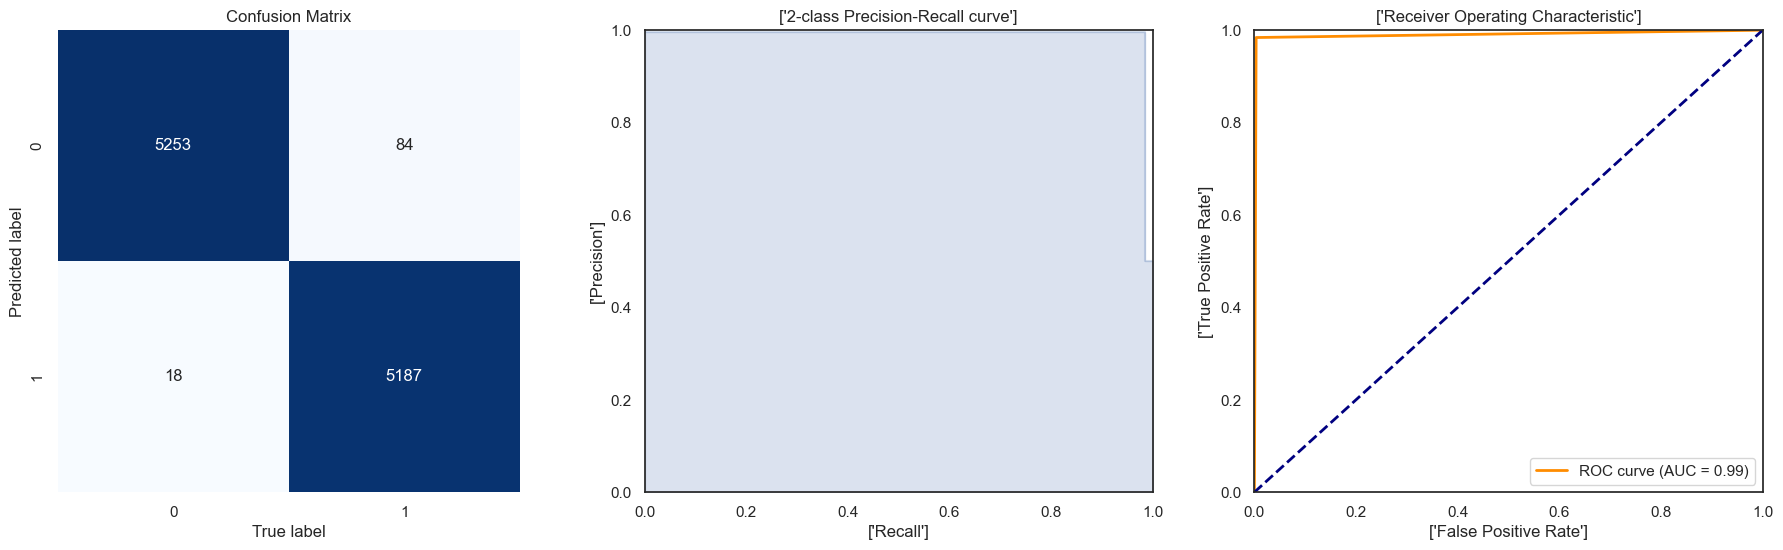

In [226]:
# check train and test to determine if overfitting occurs
y_train_pred_dt = dtmodel.predict(X_train)
y_train_prob_dt = dtmodel.predict_proba(X_train)
show_summary_report(y_train, y_train_pred_dt, y_train_prob_dt)

Accuracy : 0.9185 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.1909 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.4884 [TP / (TP + FN)] Find all the positive samples. Best:1, Worst: 0
Specificity: 0.9325 [TN / (TN + FP)] Find all the negative samples. Best:1, Worst: 0
ROC AUC : 0.7104      Best: 1, Worst: <0.5
-----------------------------------------------------------------------------------------------------------


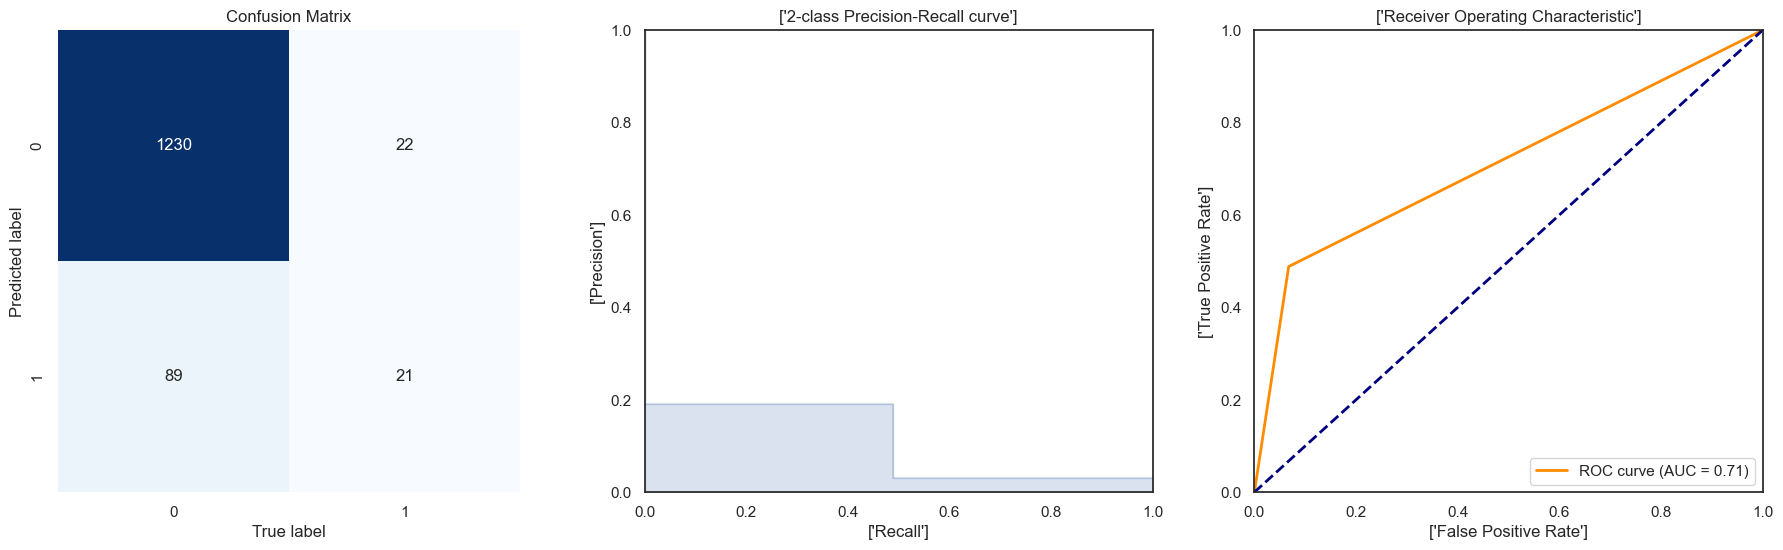

In [227]:
y_test_pred_dt = dtmodel.predict(X_test)
y_test_prob_dt = dtmodel.predict_proba(X_test)
show_summary_report(y_test, y_test_pred_dt, y_test_prob_dt)
dtac = accuracy_score(y_test, y_test_pred_dt)

In [228]:
from sklearn.tree import export_graphviz
from graphviz import Source

In [229]:
features = X.columns
features

Index(['ROA(B)_before_interest_and_depreciation_after_tax',
       'Net_Value_Per_Share_(B)', 'Debt_ratio_%',
       'Long-term_fund_suitability_ratio_(A)',
       'Contingent_liabilities/Net_worth',
       'Net_profit_before_tax/Paid-in_capital', 'Total_Asset_Turnover',
       'Net_Worth_Turnover_Rate_(times)', 'Operating_profit_per_person',
       'Quick_Assets/Total_Assets', 'Current_Assets/Total_Assets',
       'Cash/Total_Assets', 'Operating_Funds_to_Liability',
       'Total_income/Total_expense', 'Total_expense/Assets',
       'Cash_Flow_to_Liability', 'CFO_to_Assets',
       'Current_Liability_to_Current_Assets',
       'Degree_of_Financial_Leverage_(DFL)',
       'Interest_Coverage_Ratio_(Interest_expense_to_EBIT)', 'zscore'],
      dtype='object')

In [231]:
y= y.astype(str)

In [232]:
graph_data = export_graphviz(dtmodel,
                            max_depth=None, 
                            proportion=True,
                            feature_names=features,
                            class_names=y.unique(),
                            filled=True,
                            rounded=True,
                            out_file=None)

In [234]:
import os
os.environ['PATH'] += os.pathsep + r'C:/Program Files (x86)/Graphviz/bin/'

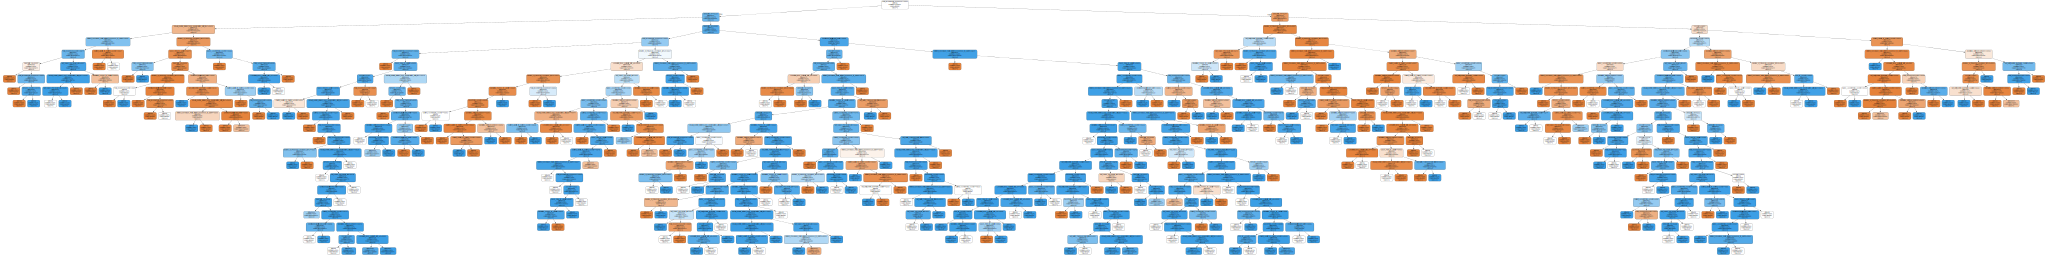

In [235]:
# Export the Decision Tree to a GraphViz data file
graph = Source(graph_data)
graph.format = 'png'
# create the visual object
graph.render(filename= r'C:/Users/katel/OneDrive/Desktop/Data Science IOD Course/output')

# show
graph

#### 4b(ii). Features of importance 

In [236]:
labels = y
features = X
features = list(features.columns)

In [237]:
feature_importances=pd.DataFrame({'features':features,'feature_importance':dtmodel.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)

features  feature_importance
13                         Total_income/Total_expense            0.433935
2                                        Debt_ratio_%            0.177496
20                                             zscore            0.053335
18                 Degree_of_Financial_Leverage_(DFL)            0.037619
8                         Operating_profit_per_person            0.032264
0   ROA(B)_before_interest_and_depreciation_after_tax            0.031185
19  Interest_Coverage_Ratio_(Interest_expense_to_E...            0.027765
9                           Quick_Assets/Total_Assets            0.025624
4                    Contingent_liabilities/Net_worth            0.024284
11                                  Cash/Total_Assets            0.021572
17                Current_Liability_to_Current_Assets            0.020985
14                               Total_expense/Assets            0.020462
10                        Current_Assets/Total_Assets            0.015292
15                             Cash_Flow_to_Liability            0.015115
3                Long-term_fund_suitability_ratio_(A)            0.014935
1                             Net_Value_Per_Share_(B)            0.014426
5               Net_profit_before_tax/Paid-in_capital            0.012082
12                       Operating_Funds_to_Liability            0.007581
16                                      CFO_to_Assets            0.006320
6                                Total_Asset_Turnover            0.004351
7                     Net_Worth_Turnover_Rate_(times)            0.003374

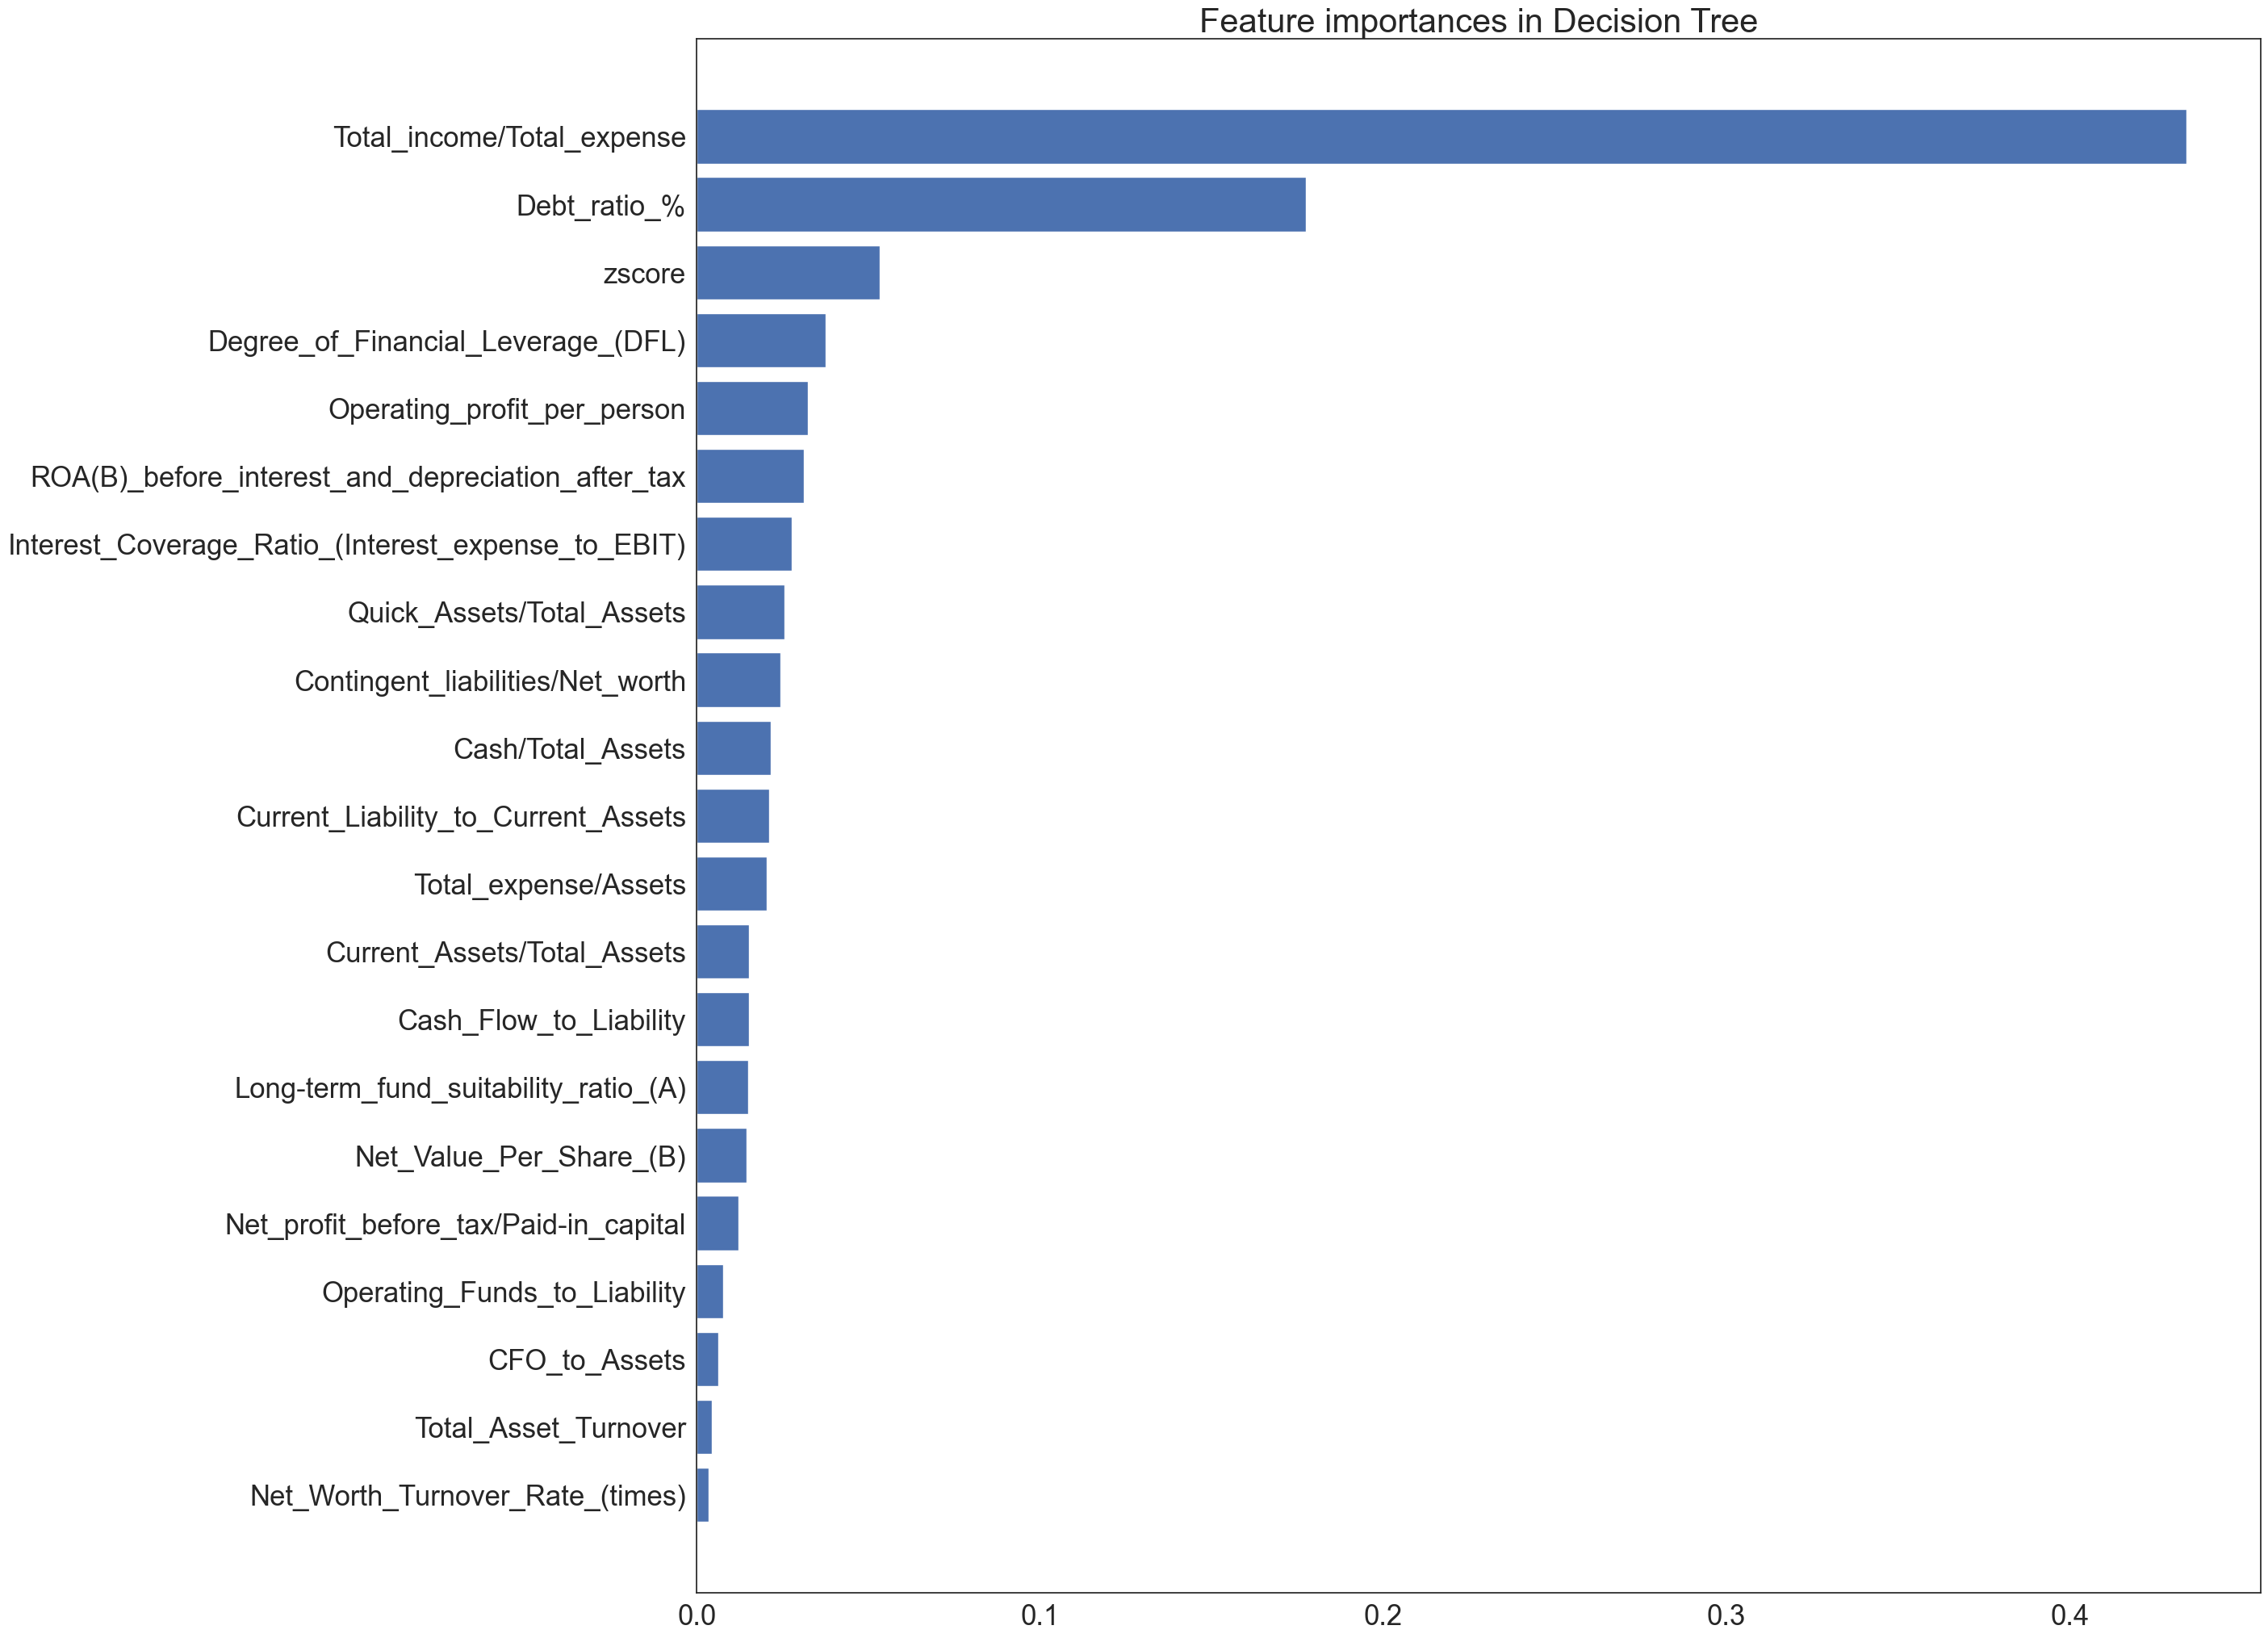

In [238]:
#  feature importance to select best of features
f_i = list(zip(features,dtmodel.feature_importances_))
plt.figure(figsize=(25,25))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.title('Feature importances in Decision Tree', fontsize=30)
plt.show()

### 4c. Random Forest 

In [239]:
from sklearn.ensemble import RandomForestClassifier

In [240]:
rfmodel = RandomForestClassifier(random_state=42)
rfmodel.fit(X_train, y_train)
y_test_pred_rf = rfmodel.predict(X_test)
rfac = accuracy_score(y_test, y_test_pred_rf)
print(classification_report(y_test, y_test_pred_rf))
print('Random Forest Accuracy: ', round(rfac, 4))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1319
           1       0.33      0.60      0.43        43

    accuracy                           0.95      1362
   macro avg       0.66      0.78      0.70      1362
weighted avg       0.97      0.95      0.96      1362

Random Forest Accuracy:  0.9486


#### 4c(i). Find Best Estimator for Random Forest 

In [249]:
rf_params = {
    'max_depth': [20, 30, 40], # 45, 50, 80, 100
    # 'min_samples_leaf': [3, 4, 5],
    'n_estimators': [130, 140, 150], #30, 60, 90, 100, 120, 150, 180
    'random_state': [42]
}

In [250]:
rf_gs = GridSearchCV(RandomForestClassifier(class_weight='balanced'), rf_params, cv = 5)
rf_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'max_depth': [20, 30, 40],
                         'n_estimators': [130, 140, 150],
                         'random_state': [42]})

In [251]:
# best params and best accuracy score for test prediction: 
print(rf_gs.best_estimator_)
print(rf_gs.best_params_)
print(rf_gs.best_score_)

RandomForestClassifier(class_weight='balanced', max_depth=30, n_estimators=140,
                       random_state=42)
{'max_depth': 30, 'n_estimators': 140, 'random_state': 42}
0.9785619685399972


In [252]:
# define rf model with best params found above 
rfmodel = RandomForestClassifier(n_estimators=140, 
                                  criterion='gini', 
                                  max_depth=30,
                                 class_weight='balanced',
                                 random_state=42
                                )
rfmodel.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=30, n_estimators=140,
                       random_state=42)

Accuracy : 1.0000 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 1.0000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 1.0000 [TP / (TP + FN)] Find all the positive samples. Best:1, Worst: 0
Specificity: 1.0000 [TN / (TN + FP)] Find all the negative samples. Best:1, Worst: 0
ROC AUC : 1.0000      Best: 1, Worst: <0.5
-----------------------------------------------------------------------------------------------------------


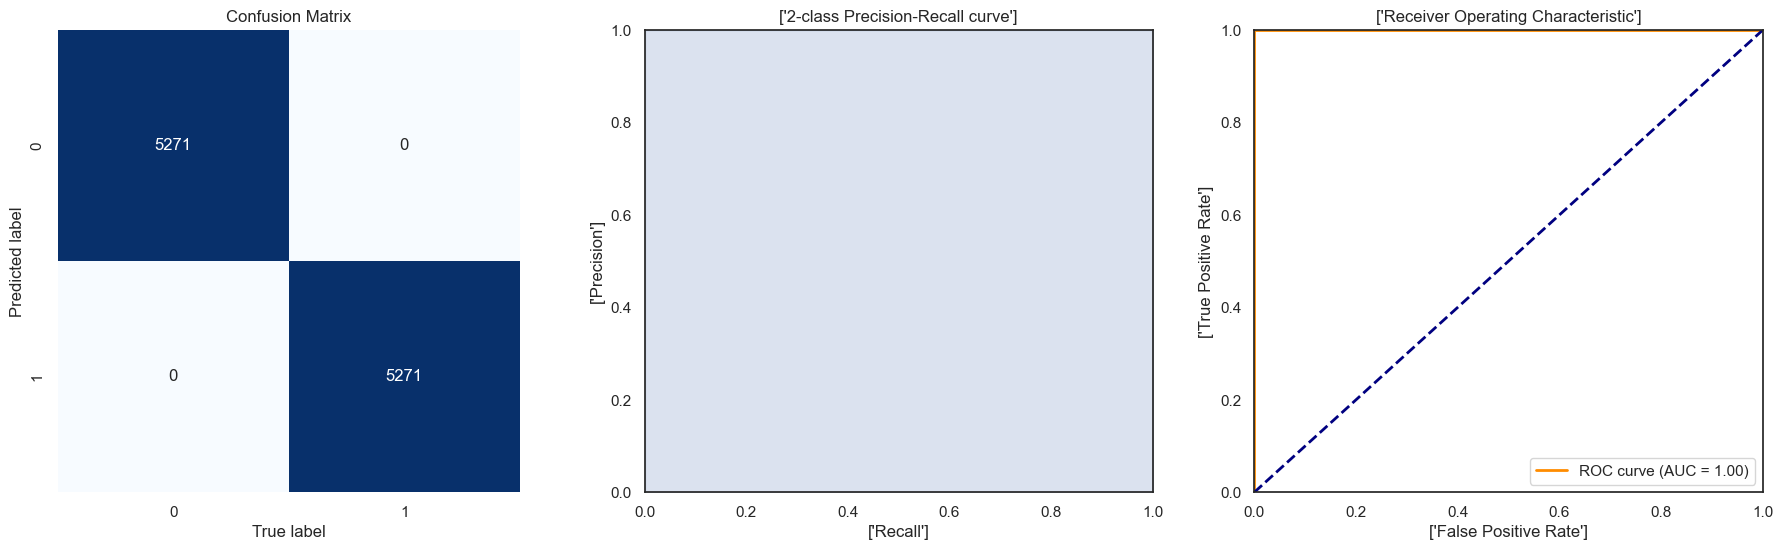

In [253]:
# check train and test to determine if overfitting occurs
y_train_pred_rf = rfmodel.predict(X_train)
y_train_prob_rf = rfmodel.predict_proba(X_train)
show_summary_report(y_train, y_train_pred_rf, y_train_prob_rf)

Accuracy : 0.9493 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.3289 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.5814 [TP / (TP + FN)] Find all the positive samples. Best:1, Worst: 0
Specificity: 0.9613 [TN / (TN + FP)] Find all the negative samples. Best:1, Worst: 0
ROC AUC : 0.7714      Best: 1, Worst: <0.5
-----------------------------------------------------------------------------------------------------------


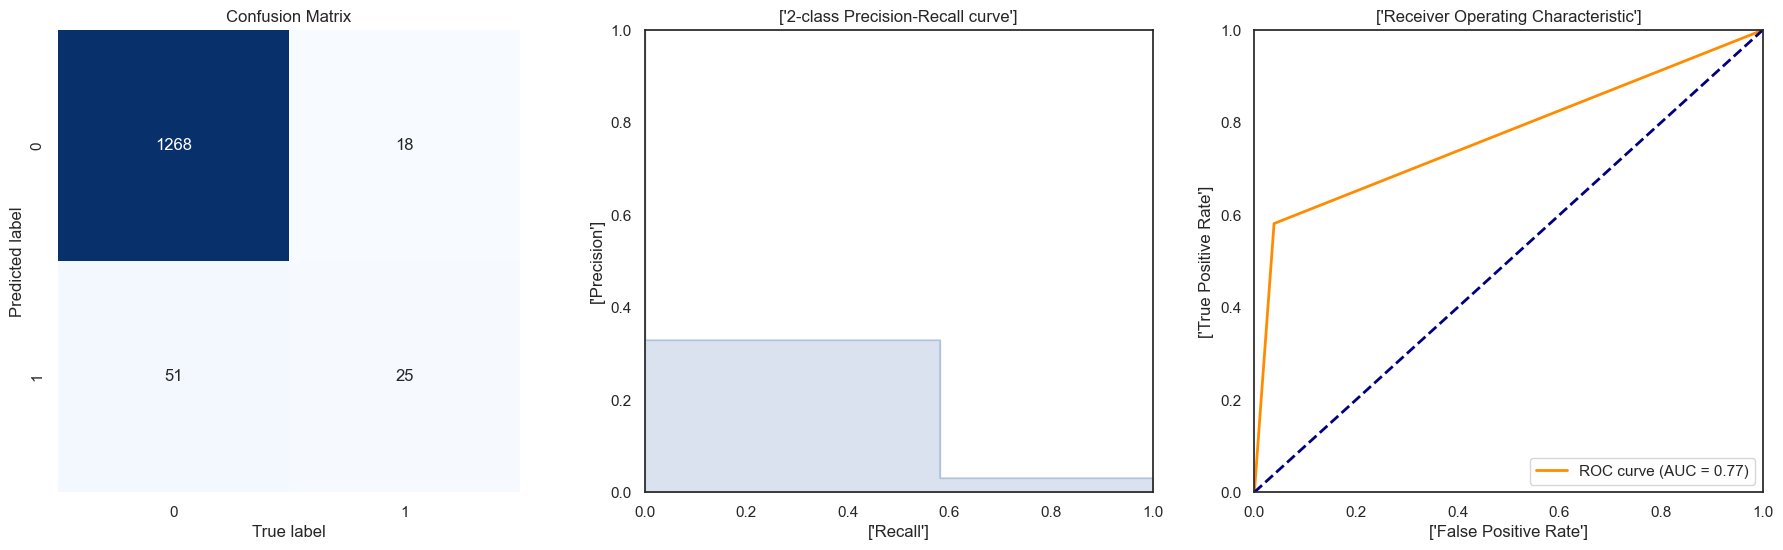

In [254]:
y_test_pred_rf = rfmodel.predict(X_test)
y_test_prob_rf = rfmodel.predict_proba(X_test)
show_summary_report(y_test, y_test_pred_rf, y_test_prob_rf)
rfac = accuracy_score(y_test, y_test_pred_rf)

#### 4c(iii). Features of importance 

In [255]:
labels = y
features = X
features = list(features.columns)

In [256]:
feature_importances=pd.DataFrame({'features':features,'feature_importance':rfmodel.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)

features  feature_importance
2                                        Debt_ratio_%            0.144943
5               Net_profit_before_tax/Paid-in_capital            0.106775
13                         Total_income/Total_expense            0.106735
0   ROA(B)_before_interest_and_depreciation_after_tax            0.089085
18                 Degree_of_Financial_Leverage_(DFL)            0.063192
19  Interest_Coverage_Ratio_(Interest_expense_to_E...            0.062984
17                Current_Liability_to_Current_Assets            0.054214
20                                             zscore            0.051472
8                         Operating_profit_per_person            0.041686
1                             Net_Value_Per_Share_(B)            0.037358
11                                  Cash/Total_Assets            0.030462
15                             Cash_Flow_to_Liability            0.029030
12                       Operating_Funds_to_Liability            0.024861
4                    Contingent_liabilities/Net_worth            0.023213
9                           Quick_Assets/Total_Assets            0.022057
10                        Current_Assets/Total_Assets            0.019807
14                               Total_expense/Assets            0.019605
3                Long-term_fund_suitability_ratio_(A)            0.019589
7                     Net_Worth_Turnover_Rate_(times)            0.018101
6                                Total_Asset_Turnover            0.017504
16                                      CFO_to_Assets            0.017327

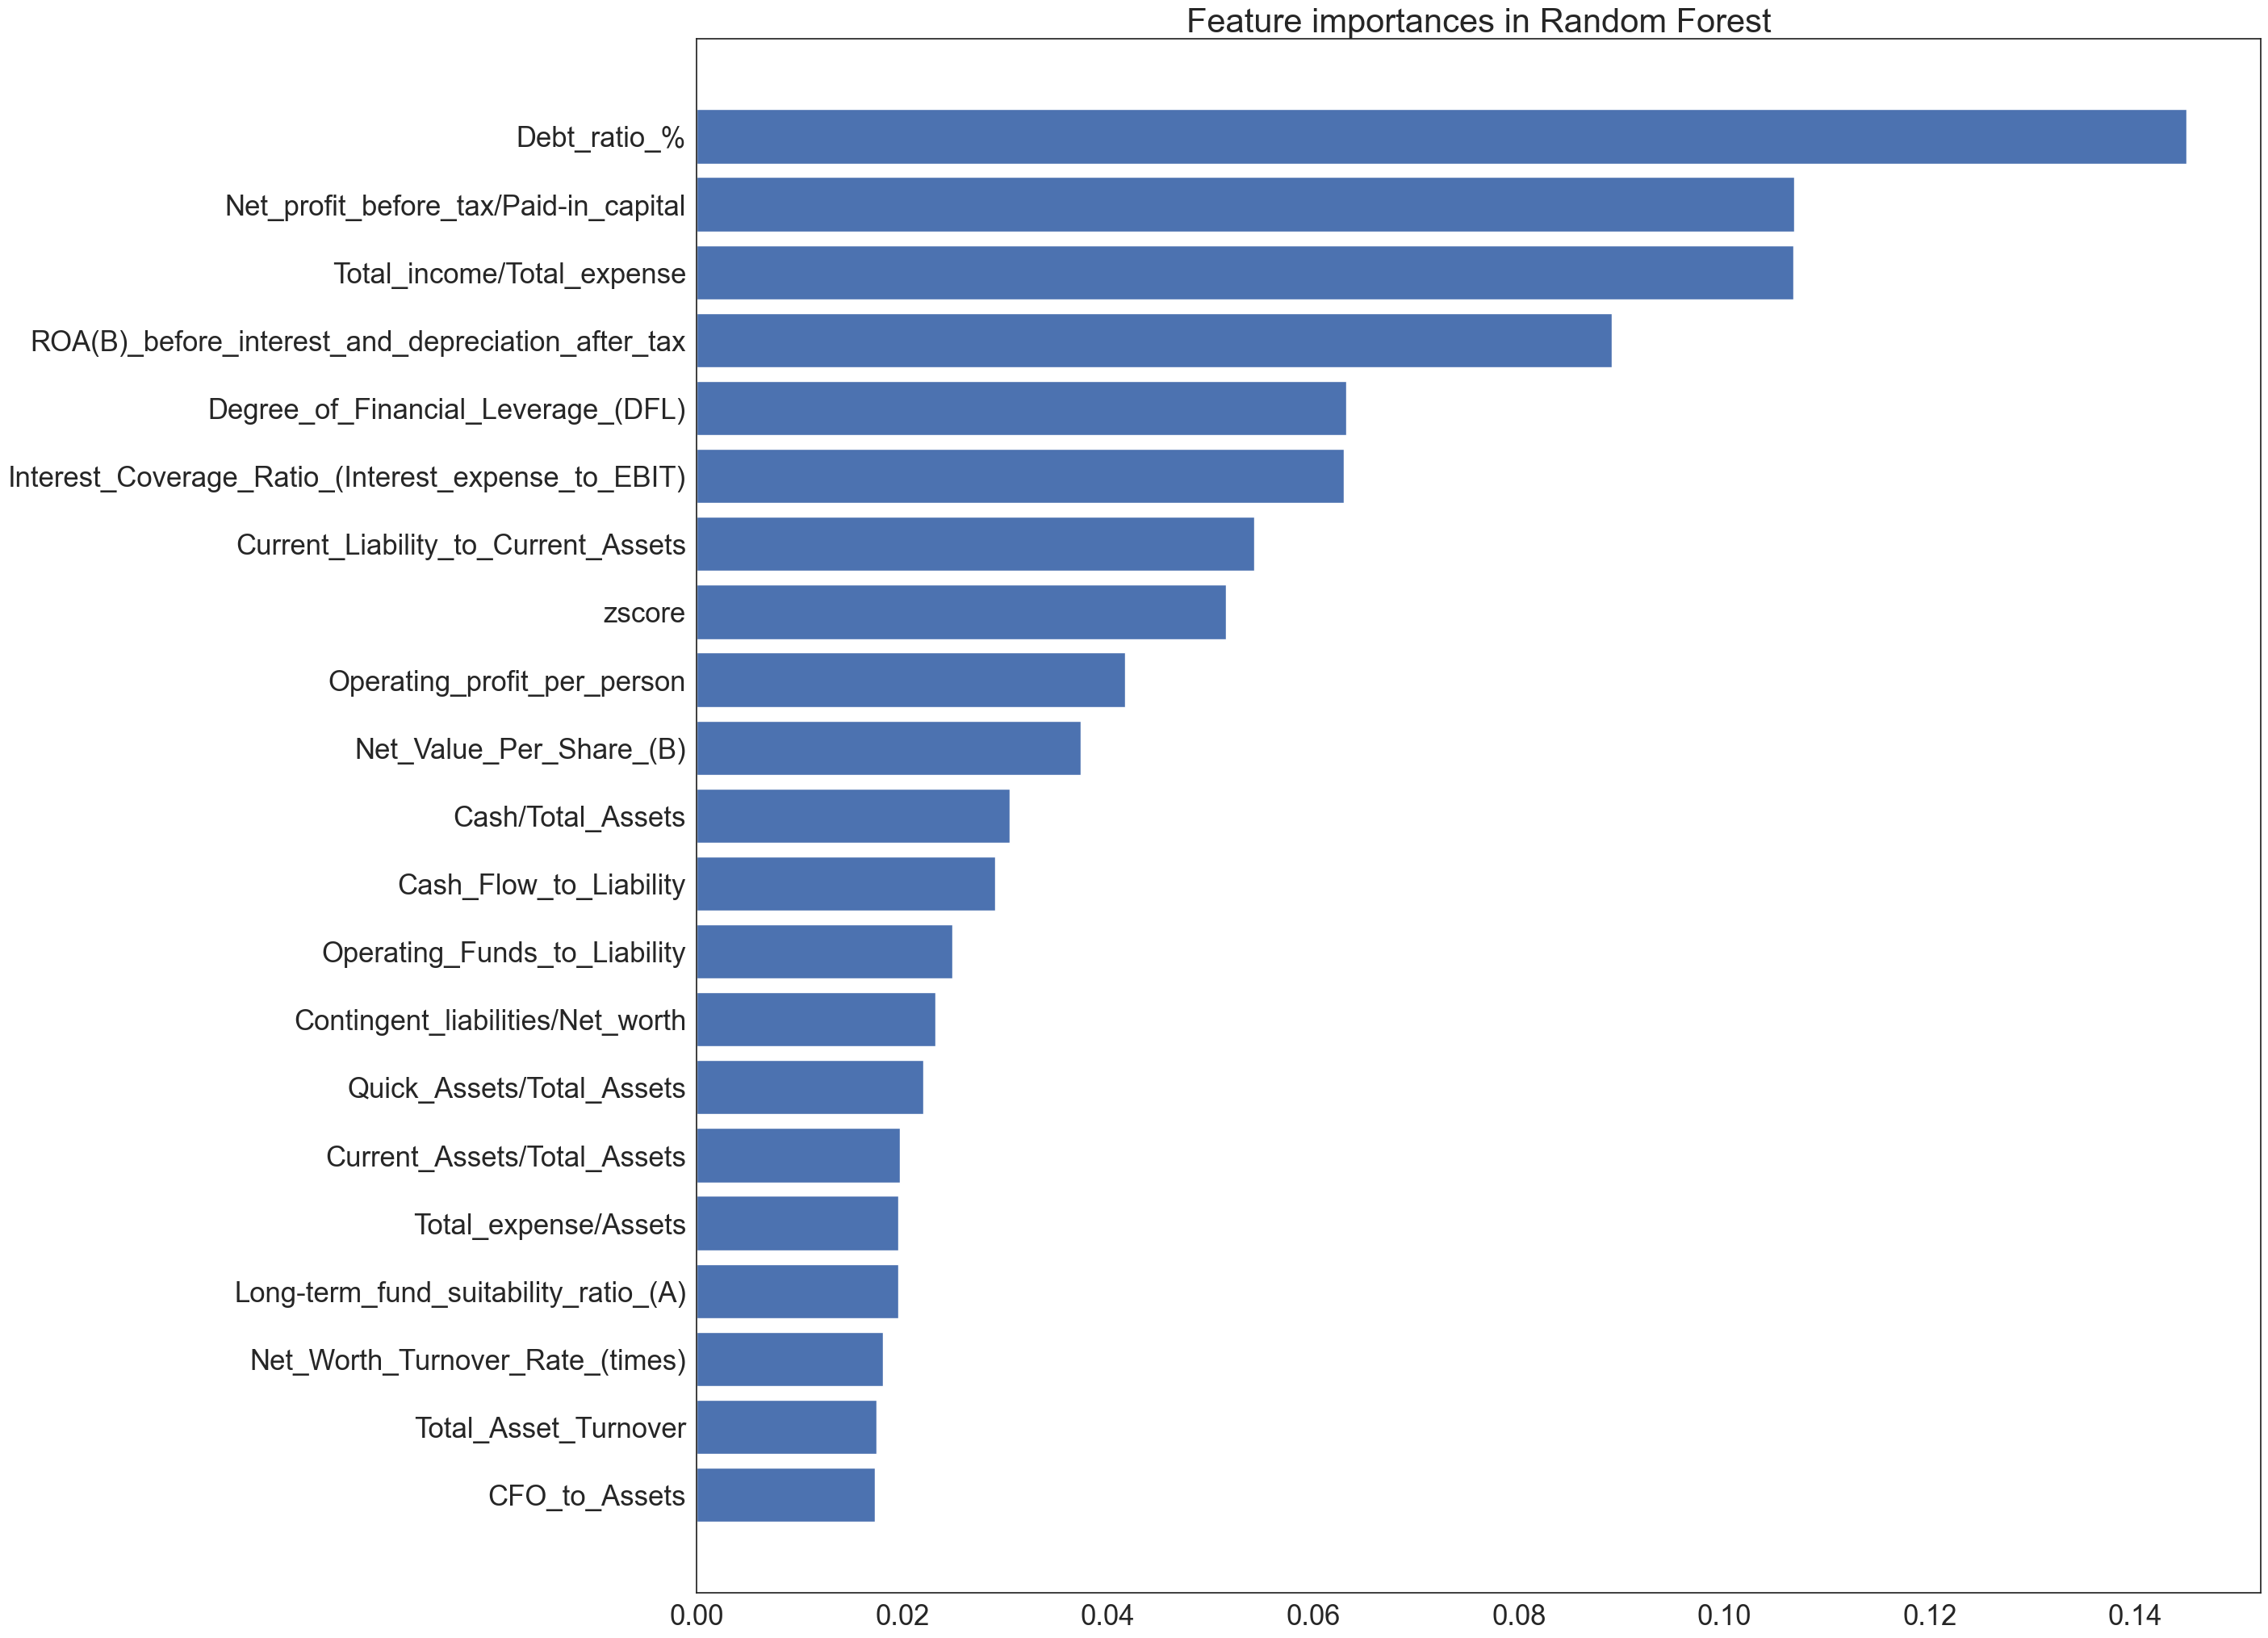

In [257]:
#  feature importance to select best of features
f_i = list(zip(features,rfmodel.feature_importances_))
plt.figure(figsize=(25,25))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.title('Feature importances in Random Forest', fontsize=30)
plt.show()

### 4d. Support Vector Classifier (SVC)

In [258]:
from sklearn.svm import SVC

In [263]:
svcmodel = SVC(probability=True, random_state=42)
svcmodel.fit(X_train, y_train)
y_test_pred_svc = svcmodel.predict(X_test)
svac = accuracy_score(y_test, y_test_pred_svc)
print(classification_report(y_test, y_test_pred_svc))
print('SVC  Accuracy: ', round(svac, 4))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91      1319
           1       0.16      0.93      0.27        43

    accuracy                           0.84      1362
   macro avg       0.58      0.88      0.59      1362
weighted avg       0.97      0.84      0.89      1362

SVC  Accuracy:  0.8407


#### 4d(i). Find Best Estimator for SVC 

In [259]:
from sklearn.model_selection import RandomizedSearchCV

In [260]:
svc_params = {
    'C': [1, 180, 250, 500, 700],  # regularization param 800, 1000
    'gamma': [1, 0.1, 0.01, 0.001], # kernel coeff  0.0001
    'random_state': [42]
    } 
# default rbf kernel which has shown to be better 
# trialled 10,50, 100, 150

SVM and NN
Brenes, Johannssen and Chukhrova 2022, 'An intelligent bankruptcy prediction model using a multilayer perceptron', Intelligent Systems with Applications, vol 16, 200136. doi: https://doi.org/10.1016/j.iswa.2022.200136.

https://www.sciencedirect.com/science/article/pii/S2667305322000734#bib0050

In [261]:
# more than 15 mins, use RandomizedSearchCV
random_search_svc = RandomizedSearchCV(SVC(kernel='rbf', probability=True), svc_params, 
                                      scoring='accuracy', cv=5)
random_search_svc.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(probability=True),
                   param_distributions={'C': [1, 180, 250, 500],
                                        'gamma': [1, 0.1, 0.01, 0.001],
                                        'random_state': [42]},
                   scoring='accuracy')

In [ ]:
random_search_svc.cv_results_

In [262]:
# best params and best accuracy score for test prediction 
print(random_search_svc.best_estimator_)
print(random_search_svc.best_params_)
print(random_search_svc.best_score_) 

SVC(C=500, gamma=1, probability=True, random_state=42)
{'random_state': 42, 'gamma': 1, 'C': 500}
0.9323666170914746


In [275]:
# define SVC model with best params found above 
svcmodel = SVC(C=700, gamma=1, kernel='rbf', probability=True, random_state=42)
svcmodel.fit(X_train, y_train)

SVC(C=700, gamma=1, probability=True, random_state=42)

Accuracy : 0.9429 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9133 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9788 [TP / (TP + FN)] Find all the positive samples. Best:1, Worst: 0
Specificity: 0.9070 [TN / (TN + FP)] Find all the negative samples. Best:1, Worst: 0
ROC AUC : 0.9429      Best: 1, Worst: <0.5
-----------------------------------------------------------------------------------------------------------


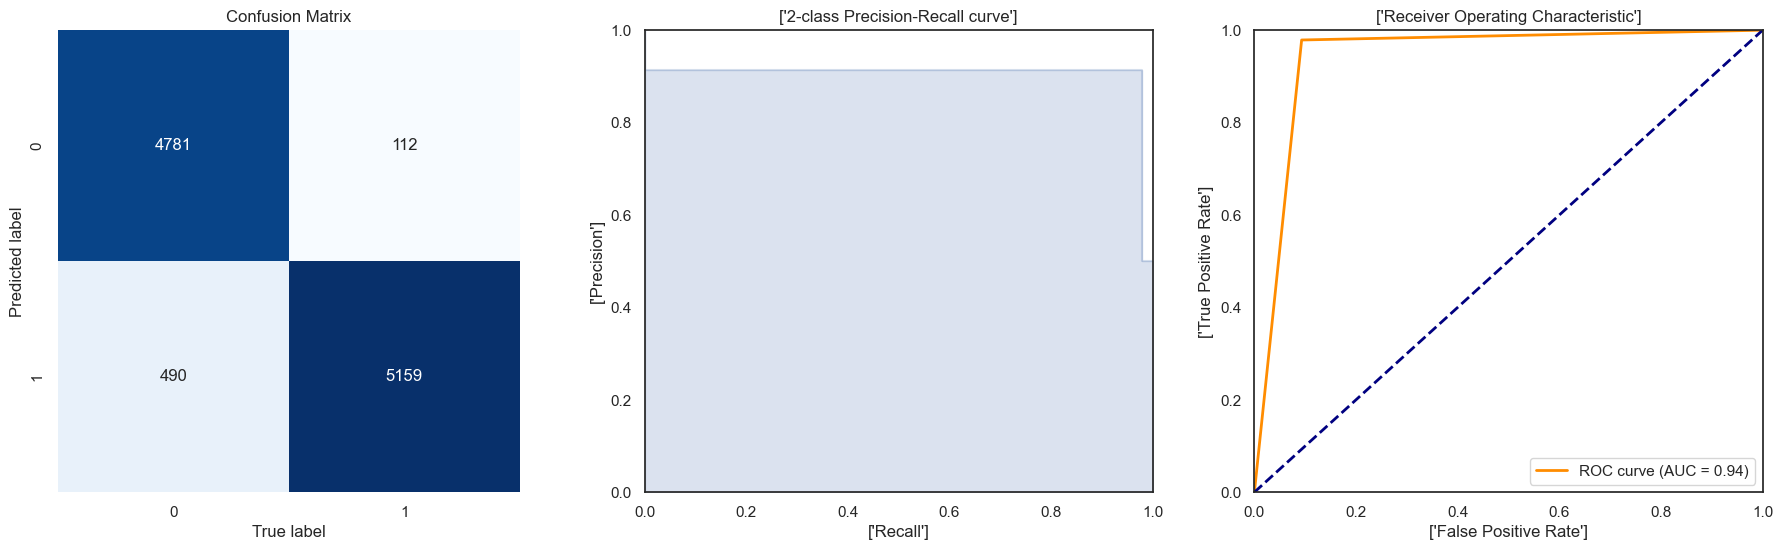

In [276]:
# check train and test to determine if overfitting occurs
y_train_pred_svc = svcmodel.predict(X_train)
y_train_prob_svc = svcmodel.predict_proba(X_train)
show_summary_report(y_train, y_train_pred_svc, y_train_prob_svc)

Accuracy : 0.8950 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.2024 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7907 [TP / (TP + FN)] Find all the positive samples. Best:1, Worst: 0
Specificity: 0.8984 [TN / (TN + FP)] Find all the negative samples. Best:1, Worst: 0
ROC AUC : 0.8446      Best: 1, Worst: <0.5
-----------------------------------------------------------------------------------------------------------


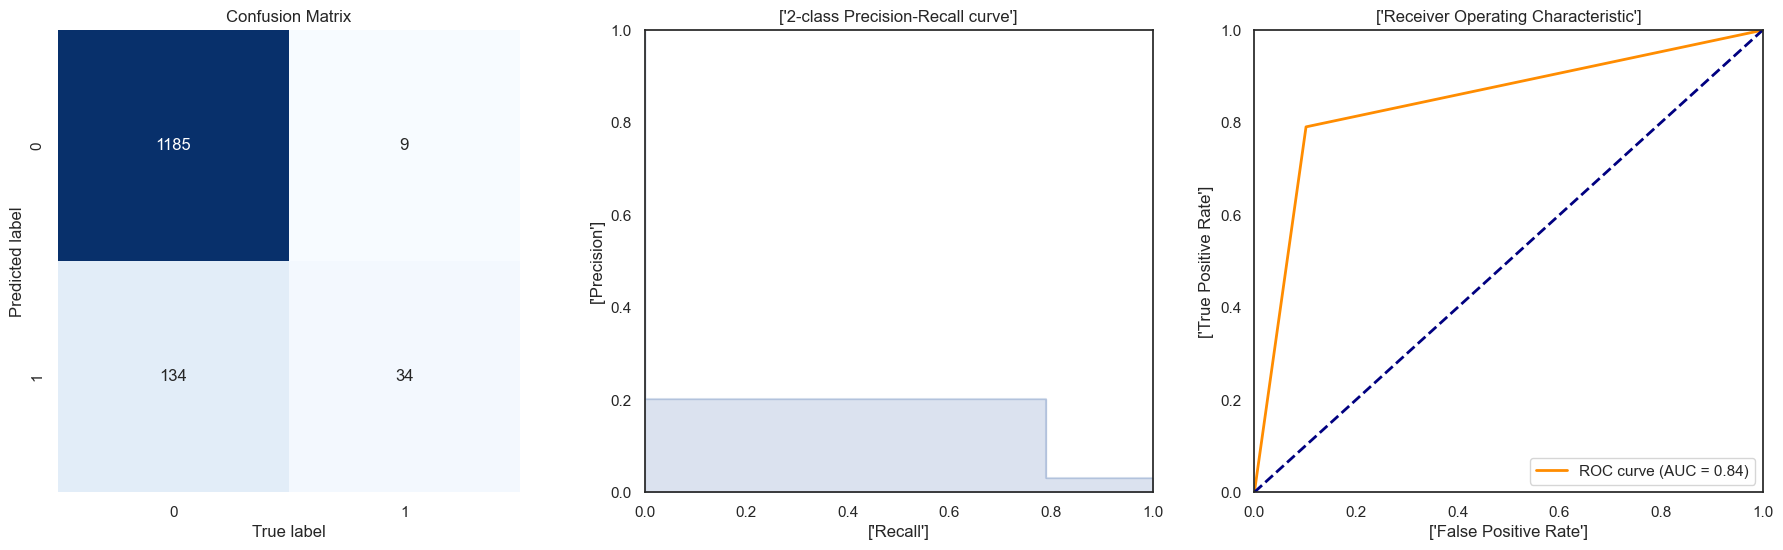

In [277]:
y_test_pred_svc = svcmodel.predict(X_test)
y_test_prob_svc = accuracy_score(y_test, y_test_pred_svc)
show_summary_report(y_test, y_test_pred_svc, y_test_prob_svc)
svcac = accuracy_score(y_test, y_test_pred_svc)

Refer to article that used linear for kernel 
Liang et al. (2016) 'Financial ratios and corporate governance indicators in bankruptcy prediction: A comprehensive study', European Journal of Operational Research, vol 252, pp. 561-572. 
https://isslab.csie.ncu.edu.tw/download/publications/1.pdf

### 4e. XG Boost (Gradient Boosted Trees)

In [278]:
from xgboost import XGBClassifier

In [279]:
xgbmodel = XGBClassifier(random_state=42)
xgbmodel.fit(X_train,y_train)
y_test_pred_xgb = xgbmodel.predict(X_test)
xgbac = accuracy_score(y_test, y_test_pred_xgb)
print(classification_report(y_test, y_test_pred_xgb))
print('Random Forest Accuracy: ', round(xgbac, 4))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1319
           1       0.39      0.56      0.46        43

    accuracy                           0.96      1362
   macro avg       0.69      0.76      0.72      1362
weighted avg       0.97      0.96      0.96      1362

Random Forest Accuracy:  0.9581


#### 4e(i). Find best parameters for XGBoost
Gbtree by defaultin parameters
- Set base parameters and tune max_depth and min_child_weight.
- Play with learning rate and tune. 
- Next, tune gamma.
- Next, tune subsample and colsample_bytree
- Next, tune regularization parameters
- Finally, adjust scale_post_weight for imbalanced dataset.
https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters
https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

In [285]:
xgb_params = {
    'learning_rate': [0.2], # step size shrinkage ;0.1, 0.3
    'n_estimators': [200, 600, 800], # 100, 250, 500, 700, 800
    # 'nthread': [2],
    'max_depth' : [6], #7, 8
    'min_child_weight': [0.5], #1, 2
    'gamma': [0.1], #  0, 0.1, 0.2, 0.5, 1,...  3, 5
    'subsample': [ 0.6, 0.7, 0.8, 0.9], # typically 0.5-0.9     0.5,
    'colsample_bytree': [ 0.6, 0.7, 0.8, 0.9], # subsample ratio, typically 0.5-0.9   0.5,
    'reg_alpha': [0.1], #0,1,50,100
    'scale_pos_weight': [1], # 2, 3, 10, 20
    'random_state': [42]
    } 


In [286]:
xgb_gs = GridSearchCV(XGBClassifier(objective='binary:logistic'),
                                    xgb_params, 
                                    scoring='accuracy', cv=5 
                                    )
xgb_gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytr

In [287]:
# best params: 
print(xgb_gs.best_estimator_)
print(xgb_gs.best_params_)
print(xgb_gs.best_score_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=0.5, missing=nan, monotone_constraints=None,
              n_estimators=800, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)
{'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 6, 'min_child_weight': 0.5, 'n_estimators': 800, 'random_state': 42, 'reg_alpha': 0.1, 'scale_pos_weight': 1, 'subsample': 0.6}
0.9831153734379541


In [380]:
xgbmodel = XGBClassifier(learning_rate=0.1,
                         n_estimators = 800,
                         #nthread = 2,
                         max_depth = 6,
                         gamma= 0.1,
                         subsample= 0.7,
                         colsample_bytree = 0.8,
                         min_child_weight = 0.5, #1 
                         objective = 'binary:logistic',
                         reg_alpha = 0.1,
                         scale_pos_weight = 1,            # balance pos/neg weights
                         seed = 42)

xgbmodel.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=0.5, missing=nan, monotone_constraints=None,
              n_estimators=800, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Accuracy : 1.0000 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 1.0000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 1.0000 [TP / (TP + FN)] Find all the positive samples. Best:1, Worst: 0
Specificity: 1.0000 [TN / (TN + FP)] Find all the negative samples. Best:1, Worst: 0
ROC AUC : 1.0000      Best: 1, Worst: <0.5
-----------------------------------------------------------------------------------------------------------


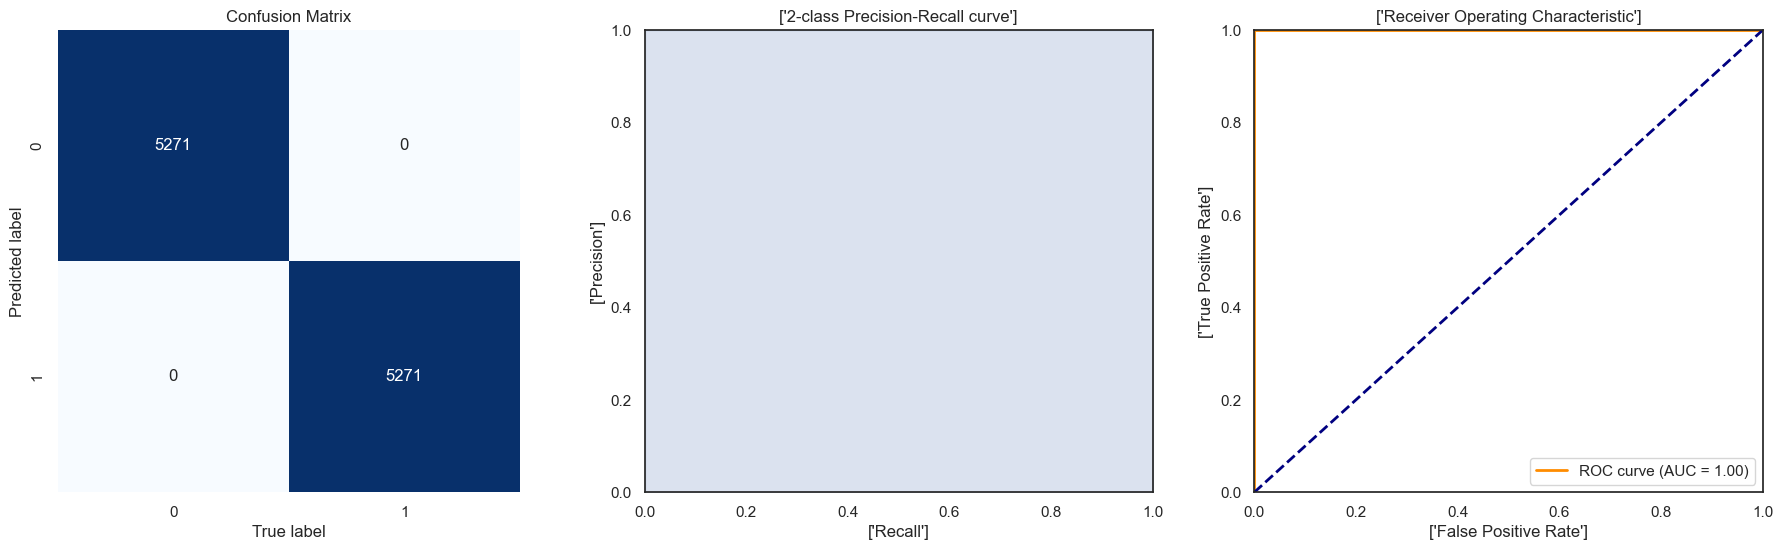

In [381]:
# check train and test to determine if overfitting occurs
y_train_pred_xgb = xgbmodel.predict(X_train)
y_train_prob_xgb = xgbmodel.predict_proba(X_train)
show_summary_report(y_train, y_train_pred_xgb, y_train_prob_xgb)

Accuracy : 0.9626 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.4355 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.6279 [TP / (TP + FN)] Find all the positive samples. Best:1, Worst: 0
Specificity: 0.9735 [TN / (TN + FP)] Find all the negative samples. Best:1, Worst: 0
ROC AUC : 0.8007      Best: 1, Worst: <0.5
-----------------------------------------------------------------------------------------------------------


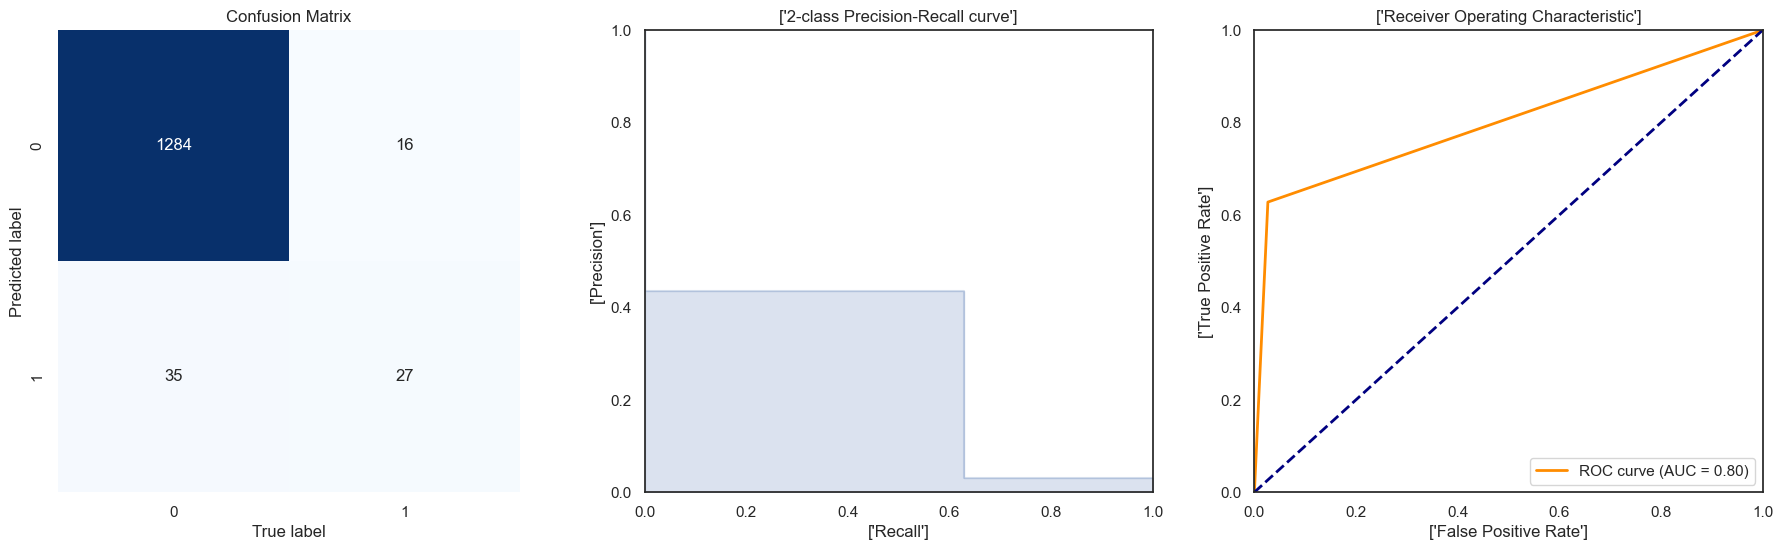

In [460]:
y_test_pred_xgb = xgbmodel.predict(X_test)
y_test_prob_xgb = xgbmodel.predict_proba(X_test)[:1]
show_summary_report(y_test, y_test_pred_xgb, y_test_prob_xgb)
xgbac = accuracy_score(y_test, y_test_pred_xgb)

#### 4e(ii). Features of importance 

In [383]:
feature_importances=pd.DataFrame({'features':features,'feature_importance':xgbmodel.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)

features  feature_importance
13                         Total_income/Total_expense            0.269540
2                                        Debt_ratio_%            0.169707
0   ROA(B)_before_interest_and_depreciation_after_tax            0.072145
5               Net_profit_before_tax/Paid-in_capital            0.064602
20                                             zscore            0.040635
19  Interest_Coverage_Ratio_(Interest_expense_to_E...            0.037860
18                 Degree_of_Financial_Leverage_(DFL)            0.035415
11                                  Cash/Total_Assets            0.034074
4                    Contingent_liabilities/Net_worth            0.034015
8                         Operating_profit_per_person            0.027883
17                Current_Liability_to_Current_Assets            0.026538
15                             Cash_Flow_to_Liability            0.024011
1                             Net_Value_Per_Share_(B)            0.023096
14                               Total_expense/Assets            0.022578
9                           Quick_Assets/Total_Assets            0.021010
3                Long-term_fund_suitability_ratio_(A)            0.019583
12                       Operating_Funds_to_Liability            0.017075
10                        Current_Assets/Total_Assets            0.017069
6                                Total_Asset_Turnover            0.015656
16                                      CFO_to_Assets            0.014570
7                     Net_Worth_Turnover_Rate_(times)            0.012938

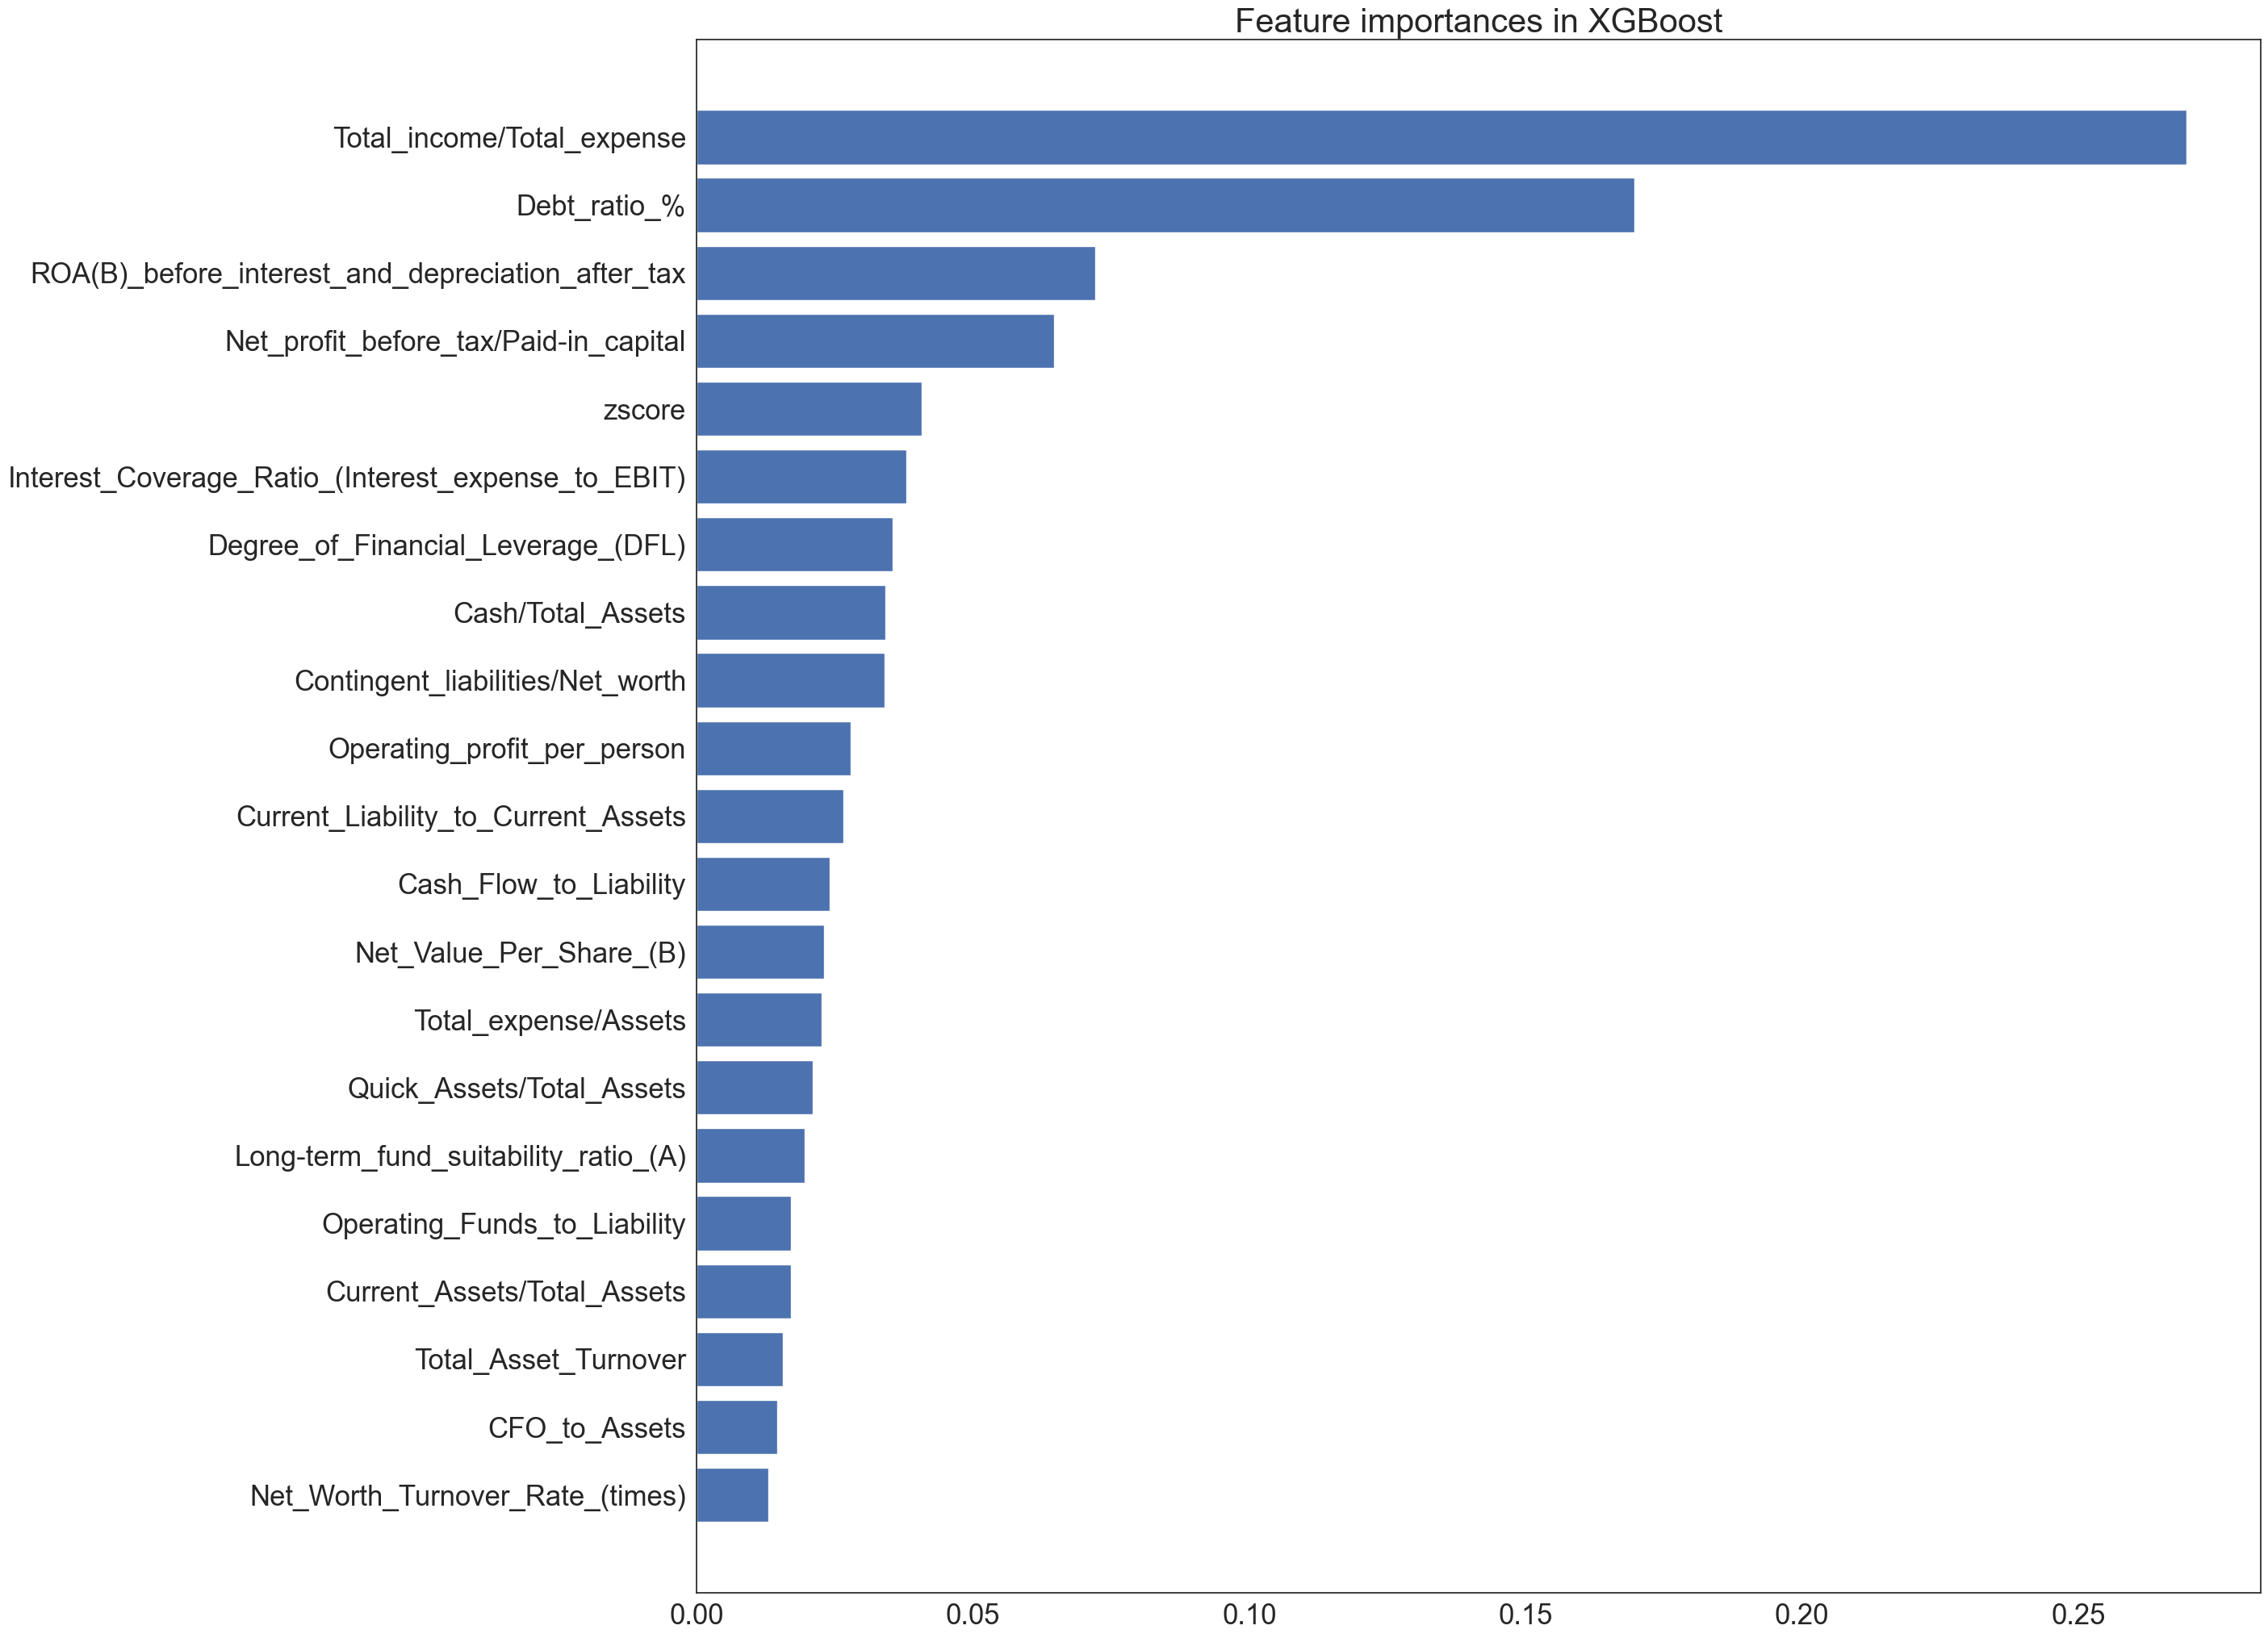

In [384]:
#  feature importance to select best of features
f_i = list(zip(features,xgbmodel.feature_importances_))
plt.figure(figsize=(25,25))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.title('Feature importances in XGBoost', fontsize=30)
plt.show()

## 5. Evaluate model metrics 
- Accuracy and recall is important
- from an investor point of view, want to detect positive/ bankrupt companies

In [504]:
# XGB has highest accuracy and has highest correct classification in precision and recall
results = pd.DataFrame([['Logistic Regression', np.nan,  0.8480, 0.1583, 0.8837, 0.8469, 0.8653],
                       ['Decision Tree',0.9126, 0.9185, 0.1909, 0.4884, 0.9325, 0.7104],
                       ['Random Forest',0.9486, 0.9493, 0.3289, 0.5814, 0.9613, 0.7714],
                       ['Support Vector Classifier', 0.8407, 0.8950, 0.2024, 0.7907, 0.8984, 0.8446],
                       ['XGBoost', 0.9581, 0.9626, 0.4355, 0.6279, 0.9735, 0.8007]],
                       columns = ['Model', 'Before Tune', 'Accuracy', 'Precision', 'Recall', 'Specificity', 'ROC_AUC']
                      )
results

Model  Before Tune  Accuracy  Precision  Recall  \
0        Logistic Regression          NaN    0.8480     0.1583  0.8837   
1              Decision Tree       0.9126    0.9185     0.1909  0.4884   
2              Random Forest       0.9486    0.9493     0.3289  0.5814   
3  Support Vector Classifier       0.8407    0.8950     0.2024  0.7907   
4                    XGBoost       0.9581    0.9626     0.4355  0.6279   

   Specificity  ROC_AUC  
0       0.8469   0.8653  
1       0.9325   0.7104  
2       0.9613   0.7714  
3       0.8984   0.8446  
4       0.9735   0.8007

In [513]:
# compare improvement after tuning
dt_tune = ((0.9185-0.9126)/0.9126)*100
rf_tune = ((0.9493-0.9486)/0.9486)*100
svc_tune = ((0.8950-0.8407)/0.8407)*100
xgb_tune = ((0.9626-0.9581)/0.9581)*100

print('DT % Increase after tuning', round(dt_tune, 3))
print('RF % Increase after tuning', round(rf_tune, 3))
print('SVC % Increase after tuning', round(svc_tune, 3))
print('XGB % Increase after tuning', round(xgb_tune, 3))

DT % Increase after tuning 0.647
RF % Increase after tuning 0.074
SVC % Increase after tuning 6.459
XGB % Increase after tuning 0.47


In [471]:
# compare against baseline model
accuracy_increase = ((0.9626-0.8480)/ 0.8480)*100
precision_increase = ((0.4355-0.1583)/ 0.1583)*100
recall_decrease = ((0.8837-0.6279)/ 0.8837)*100
specificity_increase = ((0.9735-0.8469)/ 0.8469)*100
auc_decrease = ((0.8653-0.8007)/ 0.8653)*100

print('% Increase in XGB accuracy over baseline: ', 
      round(accuracy_increase, 1))
print('% Increase in XGB precision over baseline: ', 
    round(precision_increase, 1))
print('% Decrease in XGB recall over baseline: ', 
    round(recall_decrease, 1))
print('% Decrease in XGB specificity over baseline: ', 
    round(specificity_increase, 1))
print('% Decrease in XGB auc over baseline: ', 
    round(auc_decrease, 1))

% Increase in XGB accuracy over baseline:  13.5
% Increase in XGB precision over baseline:  175.1
% Decrease in XGB recall over baseline:  28.9
% Decrease in XGB specificity over baseline:  14.9
% Decrease in XGB auc over baseline:  7.5


Text(0.5, 1.0, 'Plotting the Model Accuracies')

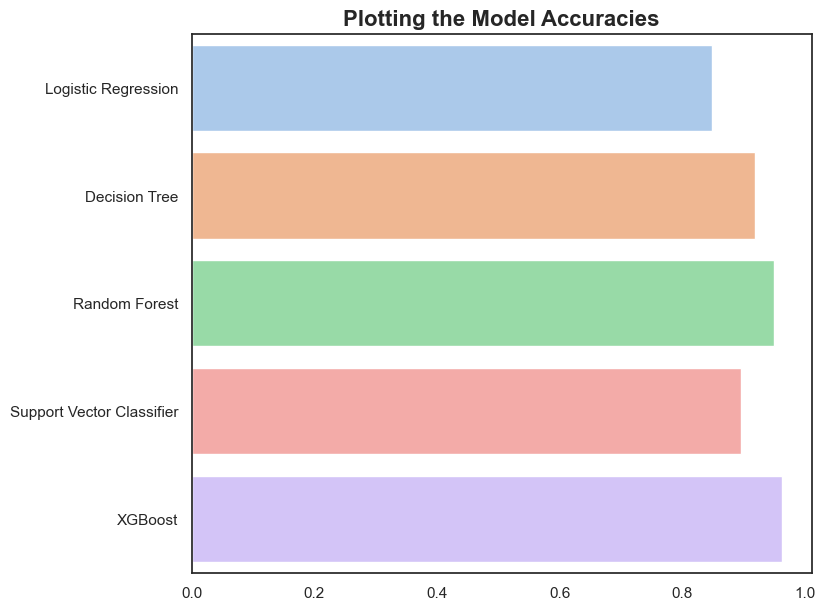

In [467]:
#comparing accuracies of models
plt.figure(figsize= (8,7))
ac = [ac,dtac,rfac,svcac, xgbac]
name = ['Logistic Regression','Decision Tree', 'Random Forest','Support Vector Classifier','XGBoost']
sns.barplot(x = ac, y = name,palette='pastel')
plt.title("Plotting the Model Accuracies", fontsize=16, fontweight="bold")

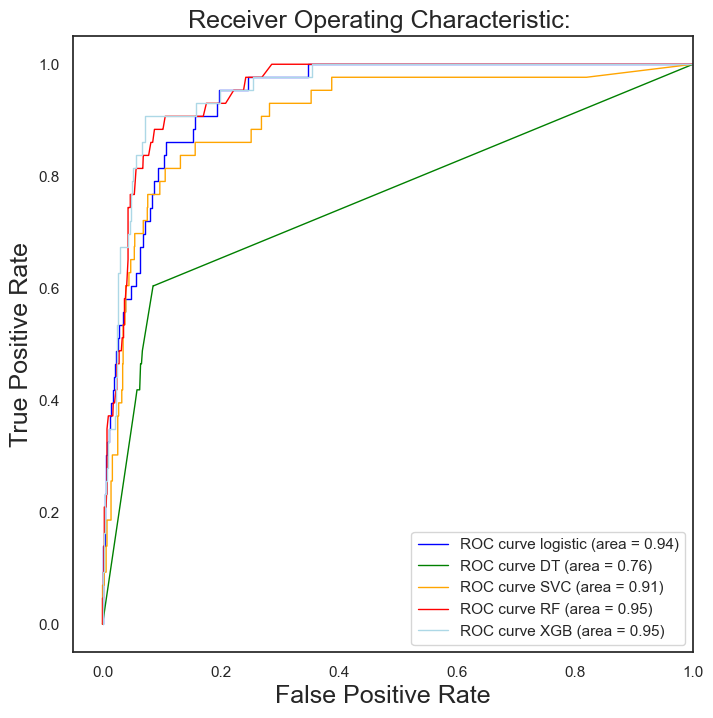

In [468]:
# compare with AUC due to imbalanced data
# Generate the prediction values 
y_test_prob = logreg.predict_proba(X_test)[:,1]
y_test_prob_dt = dtmodel.predict_proba(X_test)[:,1]
y_test_prob_svc = svcmodel.predict_proba(X_test)[:,1]
y_test_prob_rf = rfmodel.predict_proba(X_test)[:,1]
y_test_prob_xgb = xgbmodel.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_test_prob_dt)
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_test_prob_svc)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_test_prob_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_test_prob_xgb)

plt.figure(figsize=[8,8])

# plot color for each curve 
plt.plot(fpr, tpr, label='ROC curve logistic (area = %0.2f)' % auc(fpr, tpr), linewidth=1, color='blue')
plt.plot(fpr_dt, tpr_dt, label='ROC curve DT (area = %0.2f)' % auc(fpr_dt, tpr_dt), linewidth=1, color='green')
plt.plot(fpr_svc, tpr_svc, label='ROC curve SVC (area = %0.2f)' %auc(fpr_svc, tpr_svc), linewidth=1, color='orange')
plt.plot(fpr_rf, tpr_rf, label='ROC curve RF (area = %0.2f)' %auc(fpr_rf, tpr_rf), linewidth=1, color='red')
plt.plot(fpr_xgb, tpr_xgb, label='ROC curve XGB (area = %0.2f)' %auc(fpr_xgb, tpr_xgb), linewidth=1, color='lightblue')

plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver Operating Characteristic: ', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [472]:
from sklearn.metrics import brier_score_loss
from sklearn.calibration import calibration_curve

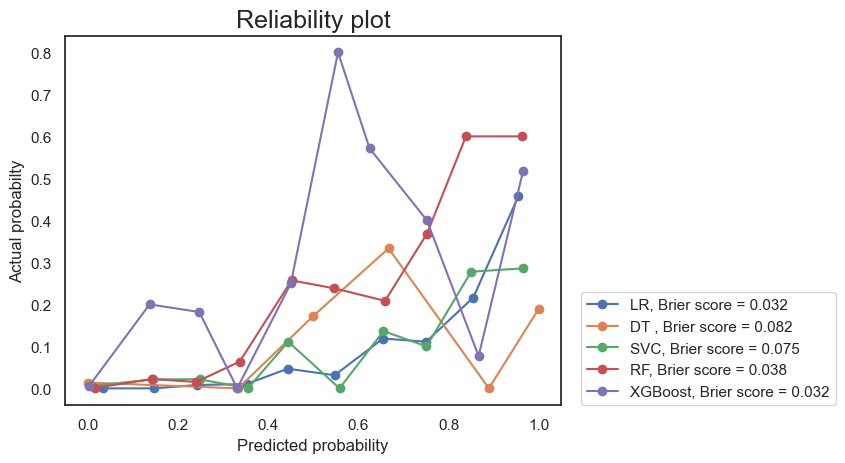

In [500]:
# plot reliability plots of probabilities
y_test_prob = logreg.predict_proba(X_test)
y_test_prob_dt = dtmodel.predict_proba(X_test)
y_test_prob_svc = svcmodel.predict_proba(X_test)
y_test_prob_rf = rfmodel.predict_proba(X_test)
y_test_prob_xgb = xgbmodel.predict_proba(X_test)

lr_y,  lr_x = calibration_curve(y_test, y_test_prob[:, 1], n_bins=10, normalize=True)
dt_y, dt_x = calibration_curve(y_test, y_test_prob_dt[:, 1], n_bins=10, normalize=True)
svc_y, svc_x = calibration_curve(y_test, y_test_prob_svc[:, 1], n_bins=10, normalize=True)
rf_y, rf_x = calibration_curve(y_test, y_test_prob_rf[:, 1], n_bins=10, normalize=True)
xgb_y, xgb_x = calibration_curve(y_test, y_test_prob_xgb[:, 1], n_bins=10, normalize=True)                  

loss_lr = brier_score_loss(y_test, y_test_prob_xgb[:, 1])
loss_dt = brier_score_loss(y_test, y_test_prob_dt[:, 1])
loss_svc = brier_score_loss(y_test, y_test_prob_svc[:, 1])
loss_rf = brier_score_loss(y_test, y_test_prob_rf[:, 1])
loss_xgb = brier_score_loss(y_test, y_test_prob_xgb[:, 1])

plt.plot(lr_x, lr_y, marker='o', label=f'LR, Brier score = {str(round(loss_lr,3))}')
plt.plot(dt_x, dt_y, marker='o',label=f'DT , Brier score = {str(round(loss_dt,3))}')
plt.plot(svc_x, svc_y, marker='o', label=f'SVC, Brier score = {str(round(loss_svc,3))}')
plt.plot(rf_x, rf_y, marker='o', label=f'RF, Brier score = {str(round(loss_rf,3))}')
plt.plot(xgb_x, xgb_y, marker='o', label=f'XGBoost, Brier score = {str(round(loss_xgb,3))}')


plt.ylabel("Actual probabilty")
plt.xlabel("Predicted probability")
plt.title("Reliability plot")
plt.rcParams['axes.titlesize'] = 18
plt.legend(loc=(1.04, 0))
plt.show()

Hence, looking at accuracy, roc curve and brier score, XGBoost model is the best.

(Medium 2020)
https://towardsdatascience.com/a-machine-learning-approach-to-credit-risk-assessment-ba8eda1cd11f

## 6. Deploy and make predictions with XGBoost

In [387]:
#  make new column ID using index row
datacopy['Company_ID'] = datacopy.index + 1 
first_column = datacopy.pop('Company_ID')
datacopy.insert(0, 'Company_ID', first_column)

In [388]:
datacopy

Company_ID  Bankrupt  ROA(B)_before_interest_and_depreciation_after_tax  \
0              1         1                                           0.405750   
1              2         1                                           0.516730   
2              3         1                                           0.472295   
3              4         1                                           0.457733   
4              5         1                                           0.522298   
...          ...       ...                                                ...   
6814        6815         0                                           0.543230   
6815        6816         0                                           0.524172   
6816        6817         0                                           0.520638   
6817        6818         0                                           0.554045   
6818        6819         0                                           0.549548   

      Net_Value_Per_Share_(B)  Debt_ratio_%  \
0                    0.147950      0.207576   
1                    0.182251      0.171176   
2                    0.177911      0.207516   
3                    0.154187      0.151465   
4                    0.167502      0.106509   
...                       ...           ...   
6814                 0.175045      0.124618   
6815                 0.181324      0.099253   
6816                 0.269521      0.038939   
6817                 0.213392      0.086979   
6818                 0.220766      0.014149   

      Long-term_fund_suitability_ratio_(A)  Contingent_liabilities/Net_worth  \
0                                 0.005024                          0.006479   
1                                 0.005059                          0.005835   
2                                 0.005100                          0.006562   
3                                 0.005047                          0.005366   
4                                 0.005303                          0.006624   
...                                    ...                               ...   
6814                              0.005150                          0.005366   
6815                              0.006772                          0.008619   
6816                              0.009149                          0.005366   
6817                              0.005529                          0.007068   
6818                              0.058476                          0.006368   

      Net_profit_before_tax/Paid-in_capital  Total_Asset_Turnover  \
0                                  0.137757              0.086957   
1                                  0.168962              0.064468   
2                                  0.148036              0.014993   
3                                  0.147561              0.089955   
4                                  0.167461              0.175412   
...                                     ...                   ...   
6814                               0.171111              0.103448   
6815                               0.171805              0.103448   
6816                               0.172287              0.106447   
6817                               0.182498              0.109445   
6818                               0.179911              0.002999   

      Net_Worth_Turnover_Rate_(times)  ...  Cash/Total_Assets  \
0                            0.032903  ...           0.004094   
1                            0.025484  ...           0.014948   
2                            0.013387  ...           0.000991   
3                            0.028065  ...           0.018851   
4                            0.040161  ...           0.014161   
...                               ...  ...                ...   
6814                         0.027903  ...           0.099481   
6815                         0.027419  ...           0.080337   
6816                         0.022419  ...           0.412885   
6817                        

In [389]:
datacopy['Bankrupt_Risk'] = xgbmodel.predict_proba(datacopy[X_train.columns])[:,1]
newdata = datacopy[['Company_ID', 'Bankrupt_Risk', 'Bankrupt', 'zscore']]

In [390]:
bankruptrisk= newdata.loc[(newdata['Bankrupt_Risk'] >= 0.5) & (newdata['Bankrupt'] == 0)]
bankruptrisk

Company_ID  Bankrupt_Risk  Bankrupt    zscore
31            32       0.795501         0  1.697497
305          306       0.883132         0  1.689177
321          322       0.868931         0  1.658031
535          536       0.999617         0  1.621646
685          686       0.822496         0  1.814957
800          801       0.794310         0  1.718530
1034        1035       0.992909         0  1.647924
1059        1060       0.659145         0  1.706686
1103        1104       0.924671         0  1.770337
1105        1106       0.586938         0  1.659188
1332        1333       0.871737         0  1.760980
1537        1538       0.980941         0  1.836289
1658        1659       0.703315         0  1.596666
1873        1874       0.972646         0  1.826229
2158        2159       0.983313         0  1.644054
2257        2258       0.998986         0  1.610117
2302        2303       0.956076         0  1.729803
2435        2436       0.871425         0  1.689793
2547        2548       0.929987         0  1.699327
2886        2887       0.790127         0  1.641523
3190        3191       0.870052         0  1.623245
3951        3952       0.851453         0  1.587710
4263        4264       0.924802         0  1.991791
4301        4302       0.604669         0  1.686867
4374        4375       0.769371         0  2.016147
4655        4656       0.846171         0  1.789172
4736        4737       0.614496         0  1.629552
4919        4920       0.890390         0  1.697427
5078        5079       0.933505         0  1.753225
5096        5097       0.706475         0  1.497400
5138        5139       0.899153         0  1.711511
5833        5834       0.863904         0  1.888607
6106        6107       0.931380         0  1.671208
6315        6316       0.940613         0  1.752588
6389        6390       0.832672         0  1.764866

In [391]:
# the amount of companies that is predicted to go bankrupt
bankruptrisk['Company_ID'].count()

35

Interesting to compare against zscore below for reference.

The interpretation of the Z Altman is:
- Z2 Altman > 2.9 − Safe zone
- 1.23 < Z2 Altman < 2.9 − Grey zone
- Z2 Altman < 1.23 − Distress zone